## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_Crown_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_Crown_t_ha                                                   \
                   count      mean       std   min     25%    50%     75%   
Species_ID                                                                  
0                  445.0  2.223910  0.767384 -0.69  1.9800  2.390  2.6600   
1                    7.0  3.614286  0.440298  2.92  3.3100  3.760  3.9750   
2                  120.0  2.078333  0.719042  0.48  1.5275  2.010  2.5750   
3                  115.0  1.973826  0.585041  0.64  1.7350  2.030  2.3400   
4                   66.0  2.563182  0.846048  0.31  1.9525  2.660  3.2275   
5                   90.0  3.263333  0.741770  0.59  2.8650  3.355  3.8600   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           3.54         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           4.05           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           3.73         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           3.37         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           4.06          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           4.24          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Crown_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
0             0        0.0   9.7    14.6         9.7      43.9           18.9   
1             0        0.0  20.6    20.6        32.2     254.0          113.1   
2             0        0.0  13.6    15.4        35.2     190.0           87.8   
3             0        0.0  23.3    22.2        29.6     277.7          106.5   
4             0        0.0  15.6    16.4        20.4     142.5           67.0   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [11]:
# Columns in "y" data collections
y.head()

,LN_Crown_t_ha
0,2.13
1,2.44
2,2.62
3,2.67
4,2.65


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.678233487903957, 0.5600222346816914, 0.6167246095182111]
    Mean: 0.618
    Std: 0.048

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.49408378 0.51677585 0.61036164]
    Mean: 0.540
    Std: 0.050

 --------------------
Mean absolute error (MAE): 

    Scores: [0.3619343033167815, 0.3558561957752153, 0.3504731088325222]
    Mean: 0.356
    Std: 0.005

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.719687164452369                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.10222336734225579                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.11773373525204708                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 196         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.6012141949508016                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.719687164452369
Gamma: 0.10222336734225579
Learning_rate: 0.11773373525204708
Max_depth: 4
N_estimators: 196
Subsample: 0.6012141949508016


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.79348	validation_1-rmse:1.75594
[1]	validation_0-rmse:1.60402	validation_1-rmse:1.57780
[2]	validation_0-rmse:1.44685	validation_1-rmse:1.43476
[3]	validation_0-rmse:1.30264	validation_1-rmse:1.29913
[4]	validation_0-rmse:1.17755	validation_1-rmse:1.18863
[5]	validation_0-rmse:1.07014	validation_1-rmse:1.09396
[6]	validation_0-rmse:0.97874	validation_1-rmse:1.01432


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90074	validation_1-rmse:0.94754
[8]	validation_0-rmse:0.83057	validation_1-rmse:0.88814
[9]	validation_0-rmse:0.76992	validation_1-rmse:0.83512
[10]	validation_0-rmse:0.72225	validation_1-rmse:0.80205
[11]	validation_0-rmse:0.68065	validation_1-rmse:0.77500
[12]	validation_0-rmse:0.64495	validation_1-rmse:0.75041
[13]	validation_0-rmse:0.61454	validation_1-rmse:0.72952
[14]	validation_0-rmse:0.58797	validation_1-rmse:0.71079
[15]	validation_0-rmse:0.56609	validation_1-rmse:0.69773
[16]	validation_0-rmse:0.54562	validation_1-rmse:0.68607
[17]	validation_0-rmse:0.53289	validation_1-rmse:0.67844
[18]	validation_0-rmse:0.51990	validation_1-rmse:0.66974
[19]	validation_0-rmse:0.50811	validation_1-rmse:0.66502
[20]	validation_0-rmse:0.49781	validation_1-rmse:0.66323
[21]	validation_0-rmse:0.48793	validation_1-rmse:0.65839
[22]	validation_0-rmse:0.48059	validation_1-rmse:0.65637
[23]	validation_0-rmse:0.47480	validation_1-rmse:0.65758
[24]	validation_0-rmse:0.47025	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79330	validation_1-rmse:1.76542


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60584	validation_1-rmse:1.58603
[2]	validation_0-rmse:1.44654	validation_1-rmse:1.42906
[3]	validation_0-rmse:1.30900	validation_1-rmse:1.29760
[4]	validation_0-rmse:1.19000	validation_1-rmse:1.18781
[5]	validation_0-rmse:1.08536	validation_1-rmse:1.08424
[6]	validation_0-rmse:0.99627	validation_1-rmse:0.99531
[7]	validation_0-rmse:0.91540	validation_1-rmse:0.91996
[8]	validation_0-rmse:0.84771	validation_1-rmse:0.86005
[9]	validation_0-rmse:0.79250	validation_1-rmse:0.80837
[10]	validation_0-rmse:0.74501	validation_1-rmse:0.76629
[11]	validation_0-rmse:0.70373	validation_1-rmse:0.73073
[12]	validation_0-rmse:0.66907	validation_1-rmse:0.69921
[13]	validation_0-rmse:0.63962	validation_1-rmse:0.67303
[14]	validation_0-rmse:0.61303	validation_1-rmse:0.64902
[15]	validation_0-rmse:0.58609	validation_1-rmse:0.62805
[16]	validation_0-rmse:0.56899	validation_1-rmse:0.61225
[17]	validation_0-rmse:0.55388	validation_1-rmse:0.60180
[18]	validation_0-rmse:0.53892	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77806	validation_1-rmse:1.82686
[1]	validation_0-rmse:1.59630	validation_1-rmse:1.64314
[2]	validation_0-rmse:1.44000	validation_1-rmse:1.49015
[3]	validation_0-rmse:1.30099	validation_1-rmse:1.34237
[4]	validation_0-rmse:1.17954	validation_1-rmse:1.22195
[5]	validation_0-rmse:1.07450	validation_1-rmse:1.11158
[6]	validation_0-rmse:0.98188	validation_1-rmse:1.01130
[7]	validation_0-rmse:0.90537	validation_1-rmse:0.93038


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.83825	validation_1-rmse:0.86052
[9]	validation_0-rmse:0.78004	validation_1-rmse:0.79949
[10]	validation_0-rmse:0.73245	validation_1-rmse:0.75254
[11]	validation_0-rmse:0.69308	validation_1-rmse:0.71948
[12]	validation_0-rmse:0.65805	validation_1-rmse:0.68085
[13]	validation_0-rmse:0.63069	validation_1-rmse:0.65460
[14]	validation_0-rmse:0.60675	validation_1-rmse:0.63271
[15]	validation_0-rmse:0.58611	validation_1-rmse:0.61527
[16]	validation_0-rmse:0.56841	validation_1-rmse:0.59579
[17]	validation_0-rmse:0.55416	validation_1-rmse:0.58529
[18]	validation_0-rmse:0.53903	validation_1-rmse:0.57189
[19]	validation_0-rmse:0.52734	validation_1-rmse:0.56138
[20]	validation_0-rmse:0.51848	validation_1-rmse:0.55413
[21]	validation_0-rmse:0.51166	validation_1-rmse:0.55090
[22]	validation_0-rmse:0.50311	validation_1-rmse:0.54636
[23]	validation_0-rmse:0.49623	validation_1-rmse:0.54093
[24]	validation_0-rmse:0.49026	validation_1-rmse:0.53384
[25]	validation_0-rmse:0.48108	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79043	validation_1-rmse:1.77515
[1]	validation_0-rmse:1.60821	validation_1-rmse:1.59882
[2]	validation_0-rmse:1.45308	validation_1-rmse:1.44575
[3]	validation_0-rmse:1.31404	validation_1-rmse:1.31328
[4]	validation_0-rmse:1.19669	validation_1-rmse:1.19781


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09385	validation_1-rmse:1.08916
[6]	validation_0-rmse:0.99856	validation_1-rmse:0.99018
[7]	validation_0-rmse:0.91512	validation_1-rmse:0.90905
[8]	validation_0-rmse:0.84863	validation_1-rmse:0.84171
[9]	validation_0-rmse:0.79351	validation_1-rmse:0.79111
[10]	validation_0-rmse:0.74253	validation_1-rmse:0.74395
[11]	validation_0-rmse:0.70302	validation_1-rmse:0.70641
[12]	validation_0-rmse:0.67134	validation_1-rmse:0.67140
[13]	validation_0-rmse:0.64154	validation_1-rmse:0.64090
[14]	validation_0-rmse:0.61428	validation_1-rmse:0.61536
[15]	validation_0-rmse:0.59488	validation_1-rmse:0.59439
[16]	validation_0-rmse:0.57571	validation_1-rmse:0.57186
[17]	validation_0-rmse:0.55841	validation_1-rmse:0.55380
[18]	validation_0-rmse:0.54159	validation_1-rmse:0.54114
[19]	validation_0-rmse:0.53081	validation_1-rmse:0.53009
[20]	validation_0-rmse:0.52259	validation_1-rmse:0.52284
[21]	validation_0-rmse:0.51244	validation_1-rmse:0.51756
[22]	validation_0-rmse:0.50556	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78507	validation_1-rmse:1.80791


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59984	validation_1-rmse:1.62152
[2]	validation_0-rmse:1.44598	validation_1-rmse:1.47686
[3]	validation_0-rmse:1.30782	validation_1-rmse:1.33621
[4]	validation_0-rmse:1.18429	validation_1-rmse:1.21793
[5]	validation_0-rmse:1.07703	validation_1-rmse:1.11256
[6]	validation_0-rmse:0.98915	validation_1-rmse:1.02522
[7]	validation_0-rmse:0.90912	validation_1-rmse:0.94662
[8]	validation_0-rmse:0.84224	validation_1-rmse:0.87964
[9]	validation_0-rmse:0.78355	validation_1-rmse:0.82090
[10]	validation_0-rmse:0.73429	validation_1-rmse:0.77248
[11]	validation_0-rmse:0.69245	validation_1-rmse:0.73117
[12]	validation_0-rmse:0.66099	validation_1-rmse:0.69695
[13]	validation_0-rmse:0.63008	validation_1-rmse:0.66996
[14]	validation_0-rmse:0.60400	validation_1-rmse:0.64314
[15]	validation_0-rmse:0.58443	validation_1-rmse:0.62108
[16]	validation_0-rmse:0.56683	validation_1-rmse:0.60404
[17]	validation_0-rmse:0.55238	validation_1-rmse:0.58635
[18]	validation_0-rmse:0.53792	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77847	validation_1-rmse:1.83478


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60185	validation_1-rmse:1.65630
[2]	validation_0-rmse:1.44789	validation_1-rmse:1.49770
[3]	validation_0-rmse:1.30946	validation_1-rmse:1.35487
[4]	validation_0-rmse:1.18873	validation_1-rmse:1.22924
[5]	validation_0-rmse:1.08467	validation_1-rmse:1.11978
[6]	validation_0-rmse:0.99277	validation_1-rmse:1.02457
[7]	validation_0-rmse:0.91621	validation_1-rmse:0.94077
[8]	validation_0-rmse:0.85050	validation_1-rmse:0.87202
[9]	validation_0-rmse:0.79685	validation_1-rmse:0.81469
[10]	validation_0-rmse:0.75205	validation_1-rmse:0.76353
[11]	validation_0-rmse:0.70894	validation_1-rmse:0.71840
[12]	validation_0-rmse:0.67434	validation_1-rmse:0.68037
[13]	validation_0-rmse:0.64801	validation_1-rmse:0.65243
[14]	validation_0-rmse:0.62326	validation_1-rmse:0.62565
[15]	validation_0-rmse:0.60103	validation_1-rmse:0.60109
[16]	validation_0-rmse:0.58347	validation_1-rmse:0.58041
[17]	validation_0-rmse:0.56850	validation_1-rmse:0.56392
[18]	validation_0-rmse:0.55565	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79243	validation_1-rmse:1.77197
[1]	validation_0-rmse:1.61117	validation_1-rmse:1.59456
[2]	validation_0-rmse:1.45336	validation_1-rmse:1.43674
[3]	validation_0-rmse:1.31142	validation_1-rmse:1.29640
[4]	validation_0-rmse:1.19365	validation_1-rmse:1.17886
[5]	validation_0-rmse:1.09231	validation_1-rmse:1.07232
[6]	validation_0-rmse:0.99819	validation_1-rmse:0.97338


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.91968	validation_1-rmse:0.89250
[8]	validation_0-rmse:0.85232	validation_1-rmse:0.82823
[9]	validation_0-rmse:0.79413	validation_1-rmse:0.76881
[10]	validation_0-rmse:0.74565	validation_1-rmse:0.72335
[11]	validation_0-rmse:0.70078	validation_1-rmse:0.68141
[12]	validation_0-rmse:0.66706	validation_1-rmse:0.64742
[13]	validation_0-rmse:0.63834	validation_1-rmse:0.62118
[14]	validation_0-rmse:0.61440	validation_1-rmse:0.59836
[15]	validation_0-rmse:0.59643	validation_1-rmse:0.58159
[16]	validation_0-rmse:0.57609	validation_1-rmse:0.56072
[17]	validation_0-rmse:0.55960	validation_1-rmse:0.54781
[18]	validation_0-rmse:0.54860	validation_1-rmse:0.53789
[19]	validation_0-rmse:0.53682	validation_1-rmse:0.52576
[20]	validation_0-rmse:0.52771	validation_1-rmse:0.51806
[21]	validation_0-rmse:0.52006	validation_1-rmse:0.51217
[22]	validation_0-rmse:0.51217	validation_1-rmse:0.50423
[23]	validation_0-rmse:0.50470	validation_1-rmse:0.49915
[24]	validation_0-rmse:0.49937	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79745	validation_1-rmse:1.75671


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61725	validation_1-rmse:1.57299
[2]	validation_0-rmse:1.46083	validation_1-rmse:1.42472
[3]	validation_0-rmse:1.31811	validation_1-rmse:1.28249
[4]	validation_0-rmse:1.19695	validation_1-rmse:1.16554
[5]	validation_0-rmse:1.08869	validation_1-rmse:1.06457
[6]	validation_0-rmse:0.99618	validation_1-rmse:0.97862
[7]	validation_0-rmse:0.91581	validation_1-rmse:0.90083
[8]	validation_0-rmse:0.84667	validation_1-rmse:0.83392
[9]	validation_0-rmse:0.78954	validation_1-rmse:0.78049
[10]	validation_0-rmse:0.73927	validation_1-rmse:0.73514
[11]	validation_0-rmse:0.69737	validation_1-rmse:0.69686
[12]	validation_0-rmse:0.66232	validation_1-rmse:0.66640
[13]	validation_0-rmse:0.63189	validation_1-rmse:0.63922
[14]	validation_0-rmse:0.60965	validation_1-rmse:0.62073
[15]	validation_0-rmse:0.59058	validation_1-rmse:0.60094
[16]	validation_0-rmse:0.57313	validation_1-rmse:0.58534
[17]	validation_0-rmse:0.55554	validation_1-rmse:0.56746
[18]	validation_0-rmse:0.54248	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79554	validation_1-rmse:1.75763
[1]	validation_0-rmse:1.61075	validation_1-rmse:1.58389
[2]	validation_0-rmse:1.45073	validation_1-rmse:1.43549
[3]	validation_0-rmse:1.30943	validation_1-rmse:1.30457
[4]	validation_0-rmse:1.18375	validation_1-rmse:1.18712
[5]	validation_0-rmse:1.07763	validation_1-rmse:1.08456
[6]	validation_0-rmse:0.98558	validation_1-rmse:1.00568
[7]	validation_0-rmse:0.90539	validation_1-rmse:0.93741
[8]	validation_0-rmse:0.83580	validation_1-rmse:0.87557
[9]	validation_0-rmse:0.77532	validation_1-rmse:0.82143
[10]	validation_0-rmse:0.72279	validation_1-rmse:0.77660
[11]	validation_0-rmse:0.68102	validation_1-rmse:0.74311
[12]	validation_0-rmse:0.64800	validation_1-rmse:0.71686
[13]	validation_0-rmse:0.61873	validation_1-rmse:0.69370
[14]	validation_0-rmse:0.58912	validation_1-rmse:0.67390
[15]	validation_0-rmse:0.57140	validation_1-rmse:0.65799
[16]	validation_0-rmse:0.55327	validation_1-rmse:0.64225
[17]	validation_0-rmse:0.53857	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78141	validation_1-rmse:1.79627
[1]	validation_0-rmse:1.60254	validation_1-rmse:1.61406
[2]	validation_0-rmse:1.44736	validation_1-rmse:1.46154
[3]	validation_0-rmse:1.30843	validation_1-rmse:1.32303
[4]	validation_0-rmse:1.18711	validation_1-rmse:1.20360
[5]	validation_0-rmse:1.08098	validation_1-rmse:1.09597
[6]	validation_0-rmse:0.98815	validation_1-rmse:1.00429
[7]	validation_0-rmse:0.90917	validation_1-rmse:0.93163
[8]	validation_0-rmse:0.83997	validation_1-rmse:0.86488
[9]	validation_0-rmse:0.78263	validation_1-rmse:0.80829
[10]	validation_0-rmse:0.73254	validation_1-rmse:0.76124
[11]	validation_0-rmse:0.69206	validation_1-rmse:0.73043


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.65796	validation_1-rmse:0.70008
[13]	validation_0-rmse:0.62726	validation_1-rmse:0.67541
[14]	validation_0-rmse:0.60127	validation_1-rmse:0.65180
[15]	validation_0-rmse:0.58103	validation_1-rmse:0.63611
[16]	validation_0-rmse:0.56161	validation_1-rmse:0.61891
[17]	validation_0-rmse:0.54613	validation_1-rmse:0.60854
[18]	validation_0-rmse:0.53238	validation_1-rmse:0.59902
[19]	validation_0-rmse:0.52168	validation_1-rmse:0.58889
[20]	validation_0-rmse:0.51261	validation_1-rmse:0.58431
[21]	validation_0-rmse:0.50562	validation_1-rmse:0.57840
[22]	validation_0-rmse:0.49789	validation_1-rmse:0.57171
[23]	validation_0-rmse:0.49199	validation_1-rmse:0.56442
[24]	validation_0-rmse:0.48670	validation_1-rmse:0.55896
[25]	validation_0-rmse:0.48429	validation_1-rmse:0.55772
[26]	validation_0-rmse:0.47998	validation_1-rmse:0.55560
[27]	validation_0-rmse:0.47624	validation_1-rmse:0.55015
[28]	validation_0-rmse:0.47030	validation_1-rmse:0.54694
[29]	validation_0-rmse:0.46545	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78584	validation_1-rmse:1.78633
[1]	validation_0-rmse:1.60301	validation_1-rmse:1.60385
[2]	validation_0-rmse:1.45005	validation_1-rmse:1.45072
[3]	validation_0-rmse:1.30996	validation_1-rmse:1.31288
[4]	validation_0-rmse:1.18804	validation_1-rmse:1.18859
[5]	validation_0-rmse:1.08220	validation_1-rmse:1.08473
[6]	validation_0-rmse:0.99166	validation_1-rmse:0.99404
[7]	validation_0-rmse:0.91373	validation_1-rmse:0.91528
[8]	validation_0-rmse:0.84694	validation_1-rmse:0.84882
[9]	validation_0-rmse:0.79008	validation_1-rmse:0.79169
[10]	validation_0-rmse:0.73827	validation_1-rmse:0.73993
[11]	validation_0-rmse:0.69537	validation_1-rmse:0.69738
[12]	validation_0-rmse:0.66193	validation_1-rmse:0.66363
[13]	validation_0-rmse:0.63390	validation_1-rmse:0.63563
[14]	validation_0-rmse:0.60820	validation_1-rmse:0.61039
[15]	validation_0-rmse:0.58644	validation_1-rmse:0.59380
[16]	validation_0-rmse:0.57032	validation_1-rmse:0.57849
[17]	validation_0-rmse:0.55578	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77817	validation_1-rmse:1.83361
[1]	validation_0-rmse:1.59297	validation_1-rmse:1.64055


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43515	validation_1-rmse:1.48494
[3]	validation_0-rmse:1.29329	validation_1-rmse:1.33885
[4]	validation_0-rmse:1.17135	validation_1-rmse:1.21363
[5]	validation_0-rmse:1.06697	validation_1-rmse:1.10546
[6]	validation_0-rmse:0.97340	validation_1-rmse:1.01299
[7]	validation_0-rmse:0.89363	validation_1-rmse:0.93339
[8]	validation_0-rmse:0.82955	validation_1-rmse:0.87115
[9]	validation_0-rmse:0.77249	validation_1-rmse:0.81542
[10]	validation_0-rmse:0.72855	validation_1-rmse:0.77083
[11]	validation_0-rmse:0.68640	validation_1-rmse:0.73750
[12]	validation_0-rmse:0.65352	validation_1-rmse:0.71075
[13]	validation_0-rmse:0.62345	validation_1-rmse:0.68889
[14]	validation_0-rmse:0.59859	validation_1-rmse:0.66680
[15]	validation_0-rmse:0.57778	validation_1-rmse:0.65114
[16]	validation_0-rmse:0.55947	validation_1-rmse:0.63776
[17]	validation_0-rmse:0.54399	validation_1-rmse:0.62331
[18]	validation_0-rmse:0.53092	validation_1-rmse:0.61326
[19]	validation_0-rmse:0.52121	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77662	validation_1-rmse:1.84485
[1]	validation_0-rmse:1.59110	validation_1-rmse:1.65917
[2]	validation_0-rmse:1.43358	validation_1-rmse:1.50456
[3]	validation_0-rmse:1.29679	validation_1-rmse:1.36551
[4]	validation_0-rmse:1.18039	validation_1-rmse:1.24670
[5]	validation_0-rmse:1.07961	validation_1-rmse:1.15309
[6]	validation_0-rmse:0.98978	validation_1-rmse:1.05964
[7]	validation_0-rmse:0.90844	validation_1-rmse:0.97446
[8]	validation_0-rmse:0.84056	validation_1-rmse:0.90190
[9]	validation_0-rmse:0.78374	validation_1-rmse:0.84424
[10]	validation_0-rmse:0.73432	validation_1-rmse:0.79644
[11]	validation_0-rmse:0.69100	validation_1-rmse:0.75670
[12]	validation_0-rmse:0.65631	validation_1-rmse:0.72202
[13]	validation_0-rmse:0.62819	validation_1-rmse:0.69279
[14]	validation_0-rmse:0.60232	validation_1-rmse:0.66364
[15]	validation_0-rmse:0.57978	validation_1-rmse:0.64523
[16]	validation_0-rmse:0.56109	validation_1-rmse:0.62735
[17]	validation_0-rmse:0.54691	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78235	validation_1-rmse:1.82108
[1]	validation_0-rmse:1.60047	validation_1-rmse:1.62920
[2]	validation_0-rmse:1.44639	validation_1-rmse:1.46620
[3]	validation_0-rmse:1.30748	validation_1-rmse:1.31677
[4]	validation_0-rmse:1.19111	validation_1-rmse:1.18657


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08750	validation_1-rmse:1.07184
[6]	validation_0-rmse:0.99992	validation_1-rmse:0.97552
[7]	validation_0-rmse:0.92571	validation_1-rmse:0.88932
[8]	validation_0-rmse:0.86115	validation_1-rmse:0.81380
[9]	validation_0-rmse:0.80394	validation_1-rmse:0.74829
[10]	validation_0-rmse:0.75783	validation_1-rmse:0.69163
[11]	validation_0-rmse:0.71552	validation_1-rmse:0.64310
[12]	validation_0-rmse:0.67931	validation_1-rmse:0.59969
[13]	validation_0-rmse:0.64859	validation_1-rmse:0.56466
[14]	validation_0-rmse:0.62526	validation_1-rmse:0.53440
[15]	validation_0-rmse:0.60519	validation_1-rmse:0.51080
[16]	validation_0-rmse:0.58768	validation_1-rmse:0.48905
[17]	validation_0-rmse:0.57190	validation_1-rmse:0.47128
[18]	validation_0-rmse:0.55840	validation_1-rmse:0.45363
[19]	validation_0-rmse:0.54802	validation_1-rmse:0.44121
[20]	validation_0-rmse:0.53950	validation_1-rmse:0.42980
[21]	validation_0-rmse:0.53287	validation_1-rmse:0.42015
[22]	validation_0-rmse:0.52508	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79055	validation_1-rmse:1.77780
[1]	validation_0-rmse:1.60439	validation_1-rmse:1.59635
[2]	validation_0-rmse:1.44395	validation_1-rmse:1.44108


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30423	validation_1-rmse:1.30741
[4]	validation_0-rmse:1.18311	validation_1-rmse:1.19126
[5]	validation_0-rmse:1.07579	validation_1-rmse:1.08993
[6]	validation_0-rmse:0.98419	validation_1-rmse:1.00240
[7]	validation_0-rmse:0.90297	validation_1-rmse:0.92655
[8]	validation_0-rmse:0.83620	validation_1-rmse:0.86409
[9]	validation_0-rmse:0.77759	validation_1-rmse:0.81325
[10]	validation_0-rmse:0.72885	validation_1-rmse:0.77083
[11]	validation_0-rmse:0.68850	validation_1-rmse:0.73481
[12]	validation_0-rmse:0.65470	validation_1-rmse:0.70350
[13]	validation_0-rmse:0.62372	validation_1-rmse:0.67718
[14]	validation_0-rmse:0.59944	validation_1-rmse:0.65652
[15]	validation_0-rmse:0.57815	validation_1-rmse:0.63964
[16]	validation_0-rmse:0.56086	validation_1-rmse:0.62827
[17]	validation_0-rmse:0.54716	validation_1-rmse:0.61813
[18]	validation_0-rmse:0.53406	validation_1-rmse:0.60928
[19]	validation_0-rmse:0.52161	validation_1-rmse:0.60369
[20]	validation_0-rmse:0.51335	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77393	validation_1-rmse:1.85342


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59007	validation_1-rmse:1.66213
[2]	validation_0-rmse:1.43546	validation_1-rmse:1.50276
[3]	validation_0-rmse:1.30167	validation_1-rmse:1.35812
[4]	validation_0-rmse:1.18601	validation_1-rmse:1.23855
[5]	validation_0-rmse:1.08119	validation_1-rmse:1.12632
[6]	validation_0-rmse:0.99167	validation_1-rmse:1.02759
[7]	validation_0-rmse:0.91257	validation_1-rmse:0.94380
[8]	validation_0-rmse:0.84686	validation_1-rmse:0.87136
[9]	validation_0-rmse:0.78849	validation_1-rmse:0.80632
[10]	validation_0-rmse:0.73987	validation_1-rmse:0.75604
[11]	validation_0-rmse:0.70003	validation_1-rmse:0.71470
[12]	validation_0-rmse:0.66352	validation_1-rmse:0.67703
[13]	validation_0-rmse:0.63612	validation_1-rmse:0.64684
[14]	validation_0-rmse:0.60885	validation_1-rmse:0.62139
[15]	validation_0-rmse:0.58968	validation_1-rmse:0.60030
[16]	validation_0-rmse:0.57252	validation_1-rmse:0.58085
[17]	validation_0-rmse:0.55864	validation_1-rmse:0.56596
[18]	validation_0-rmse:0.54688	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79733	validation_1-rmse:1.75260
[1]	validation_0-rmse:1.61146	validation_1-rmse:1.57587
[2]	validation_0-rmse:1.44921	validation_1-rmse:1.42315
[3]	validation_0-rmse:1.30800	validation_1-rmse:1.29283
[4]	validation_0-rmse:1.18463	validation_1-rmse:1.17664
[5]	validation_0-rmse:1.07920	validation_1-rmse:1.07691
[6]	validation_0-rmse:0.98890	validation_1-rmse:0.99314


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90856	validation_1-rmse:0.92152
[8]	validation_0-rmse:0.84033	validation_1-rmse:0.85928
[9]	validation_0-rmse:0.78197	validation_1-rmse:0.80852
[10]	validation_0-rmse:0.73282	validation_1-rmse:0.76848
[11]	validation_0-rmse:0.69309	validation_1-rmse:0.73351
[12]	validation_0-rmse:0.65747	validation_1-rmse:0.70375
[13]	validation_0-rmse:0.62844	validation_1-rmse:0.68008
[14]	validation_0-rmse:0.60430	validation_1-rmse:0.65887
[15]	validation_0-rmse:0.58445	validation_1-rmse:0.64341
[16]	validation_0-rmse:0.56623	validation_1-rmse:0.62980
[17]	validation_0-rmse:0.55080	validation_1-rmse:0.61861
[18]	validation_0-rmse:0.53790	validation_1-rmse:0.60883
[19]	validation_0-rmse:0.52492	validation_1-rmse:0.60221
[20]	validation_0-rmse:0.51491	validation_1-rmse:0.59650
[21]	validation_0-rmse:0.50721	validation_1-rmse:0.59141
[22]	validation_0-rmse:0.50041	validation_1-rmse:0.58647
[23]	validation_0-rmse:0.49492	validation_1-rmse:0.58122
[24]	validation_0-rmse:0.48750	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76845	validation_1-rmse:1.87406
[1]	validation_0-rmse:1.58777	validation_1-rmse:1.69040


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43178	validation_1-rmse:1.53355
[3]	validation_0-rmse:1.29226	validation_1-rmse:1.39628
[4]	validation_0-rmse:1.17248	validation_1-rmse:1.27559
[5]	validation_0-rmse:1.06582	validation_1-rmse:1.17025
[6]	validation_0-rmse:0.98217	validation_1-rmse:1.08392
[7]	validation_0-rmse:0.90274	validation_1-rmse:1.00657
[8]	validation_0-rmse:0.83283	validation_1-rmse:0.93791
[9]	validation_0-rmse:0.77379	validation_1-rmse:0.87913
[10]	validation_0-rmse:0.72444	validation_1-rmse:0.83412
[11]	validation_0-rmse:0.68292	validation_1-rmse:0.79518
[12]	validation_0-rmse:0.64913	validation_1-rmse:0.76171
[13]	validation_0-rmse:0.61942	validation_1-rmse:0.73451
[14]	validation_0-rmse:0.59265	validation_1-rmse:0.70652
[15]	validation_0-rmse:0.57299	validation_1-rmse:0.69333
[16]	validation_0-rmse:0.55503	validation_1-rmse:0.67608
[17]	validation_0-rmse:0.54015	validation_1-rmse:0.66450
[18]	validation_0-rmse:0.52633	validation_1-rmse:0.65194
[19]	validation_0-rmse:0.51621	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79404	validation_1-rmse:1.77276
[1]	validation_0-rmse:1.61000	validation_1-rmse:1.58840


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45339	validation_1-rmse:1.43353
[3]	validation_0-rmse:1.31100	validation_1-rmse:1.29603
[4]	validation_0-rmse:1.19090	validation_1-rmse:1.17671
[5]	validation_0-rmse:1.08707	validation_1-rmse:1.07459
[6]	validation_0-rmse:0.99383	validation_1-rmse:0.98347
[7]	validation_0-rmse:0.91452	validation_1-rmse:0.90700
[8]	validation_0-rmse:0.84439	validation_1-rmse:0.83932
[9]	validation_0-rmse:0.78780	validation_1-rmse:0.78728
[10]	validation_0-rmse:0.73823	validation_1-rmse:0.73925
[11]	validation_0-rmse:0.69777	validation_1-rmse:0.69988
[12]	validation_0-rmse:0.66210	validation_1-rmse:0.66639
[13]	validation_0-rmse:0.63322	validation_1-rmse:0.63879
[14]	validation_0-rmse:0.60488	validation_1-rmse:0.61589
[15]	validation_0-rmse:0.58539	validation_1-rmse:0.60186
[16]	validation_0-rmse:0.56865	validation_1-rmse:0.58880
[17]	validation_0-rmse:0.55553	validation_1-rmse:0.57938
[18]	validation_0-rmse:0.54180	validation_1-rmse:0.57061
[19]	validation_0-rmse:0.52851	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78600	validation_1-rmse:1.80317
[1]	validation_0-rmse:1.60348	validation_1-rmse:1.62249
[2]	validation_0-rmse:1.44624	validation_1-rmse:1.46834


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30488	validation_1-rmse:1.32858
[4]	validation_0-rmse:1.18237	validation_1-rmse:1.20803
[5]	validation_0-rmse:1.07857	validation_1-rmse:1.10604
[6]	validation_0-rmse:0.98960	validation_1-rmse:1.01988
[7]	validation_0-rmse:0.90843	validation_1-rmse:0.94172
[8]	validation_0-rmse:0.84010	validation_1-rmse:0.87215
[9]	validation_0-rmse:0.78258	validation_1-rmse:0.81767
[10]	validation_0-rmse:0.73262	validation_1-rmse:0.77657
[11]	validation_0-rmse:0.68704	validation_1-rmse:0.74029
[12]	validation_0-rmse:0.65380	validation_1-rmse:0.70663
[13]	validation_0-rmse:0.62235	validation_1-rmse:0.68447
[14]	validation_0-rmse:0.59624	validation_1-rmse:0.65941
[15]	validation_0-rmse:0.57446	validation_1-rmse:0.64245
[16]	validation_0-rmse:0.55484	validation_1-rmse:0.62449
[17]	validation_0-rmse:0.54022	validation_1-rmse:0.61054
[18]	validation_0-rmse:0.52750	validation_1-rmse:0.59765
[19]	validation_0-rmse:0.51802	validation_1-rmse:0.58963
[20]	validation_0-rmse:0.50740	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79260	validation_1-rmse:1.77928
[1]	validation_0-rmse:1.61329	validation_1-rmse:1.60854
[2]	validation_0-rmse:1.45502	validation_1-rmse:1.45467
[3]	validation_0-rmse:1.31069	validation_1-rmse:1.31357
[4]	validation_0-rmse:1.19088	validation_1-rmse:1.20074
[5]	validation_0-rmse:1.08757	validation_1-rmse:1.10276
[6]	validation_0-rmse:0.99583	validation_1-rmse:1.01410
[7]	validation_0-rmse:0.91339	validation_1-rmse:0.93996
[8]	validation_0-rmse:0.84025	validation_1-rmse:0.87377
[9]	validation_0-rmse:0.78216	validation_1-rmse:0.81959
[10]	validation_0-rmse:0.73207	validation_1-rmse:0.77796
[11]	validation_0-rmse:0.68823	validation_1-rmse:0.74016
[12]	validation_0-rmse:0.65207	validation_1-rmse:0.71022
[13]	validation_0-rmse:0.62058	validation_1-rmse:0.68687
[14]	validation_0-rmse:0.59366	validation_1-rmse:0.66173
[15]	validation_0-rmse:0.57150	validation_1-rmse:0.64393
[16]	validation_0-rmse:0.55090	validation_1-rmse:0.62918
[17]	validation_0-rmse:0.53346	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78513	validation_1-rmse:1.80169
[1]	validation_0-rmse:1.60211	validation_1-rmse:1.62003
[2]	validation_0-rmse:1.43756	validation_1-rmse:1.46246
[3]	validation_0-rmse:1.29600	validation_1-rmse:1.32147
[4]	validation_0-rmse:1.17510	validation_1-rmse:1.20204
[5]	validation_0-rmse:1.06757	validation_1-rmse:1.09956
[6]	validation_0-rmse:0.97743	validation_1-rmse:1.01805
[7]	validation_0-rmse:0.89620	validation_1-rmse:0.94450


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.83207	validation_1-rmse:0.88475
[9]	validation_0-rmse:0.77360	validation_1-rmse:0.83410
[10]	validation_0-rmse:0.72167	validation_1-rmse:0.79603
[11]	validation_0-rmse:0.67952	validation_1-rmse:0.76255
[12]	validation_0-rmse:0.64395	validation_1-rmse:0.73350
[13]	validation_0-rmse:0.61418	validation_1-rmse:0.71086
[14]	validation_0-rmse:0.59025	validation_1-rmse:0.69188
[15]	validation_0-rmse:0.57004	validation_1-rmse:0.68041
[16]	validation_0-rmse:0.55191	validation_1-rmse:0.66775
[17]	validation_0-rmse:0.53550	validation_1-rmse:0.65567
[18]	validation_0-rmse:0.52017	validation_1-rmse:0.64725
[19]	validation_0-rmse:0.51011	validation_1-rmse:0.64018
[20]	validation_0-rmse:0.50187	validation_1-rmse:0.63640
[21]	validation_0-rmse:0.49497	validation_1-rmse:0.63366
[22]	validation_0-rmse:0.48716	validation_1-rmse:0.62952
[23]	validation_0-rmse:0.48096	validation_1-rmse:0.62450
[24]	validation_0-rmse:0.47626	validation_1-rmse:0.62215
[25]	validation_0-rmse:0.46987	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79712	validation_1-rmse:1.78250
[1]	validation_0-rmse:1.61279	validation_1-rmse:1.60261
[2]	validation_0-rmse:1.44982	validation_1-rmse:1.44122
[3]	validation_0-rmse:1.30851	validation_1-rmse:1.30966


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19029	validation_1-rmse:1.19887
[5]	validation_0-rmse:1.08479	validation_1-rmse:1.09788
[6]	validation_0-rmse:0.99288	validation_1-rmse:1.01338
[7]	validation_0-rmse:0.91321	validation_1-rmse:0.94226
[8]	validation_0-rmse:0.84400	validation_1-rmse:0.87666
[9]	validation_0-rmse:0.78597	validation_1-rmse:0.82390
[10]	validation_0-rmse:0.73545	validation_1-rmse:0.78060
[11]	validation_0-rmse:0.69195	validation_1-rmse:0.74378
[12]	validation_0-rmse:0.65548	validation_1-rmse:0.70805
[13]	validation_0-rmse:0.62600	validation_1-rmse:0.68574
[14]	validation_0-rmse:0.59734	validation_1-rmse:0.65962
[15]	validation_0-rmse:0.57699	validation_1-rmse:0.64285
[16]	validation_0-rmse:0.55818	validation_1-rmse:0.62651
[17]	validation_0-rmse:0.54027	validation_1-rmse:0.61373
[18]	validation_0-rmse:0.52648	validation_1-rmse:0.60339
[19]	validation_0-rmse:0.51473	validation_1-rmse:0.59434
[20]	validation_0-rmse:0.50479	validation_1-rmse:0.58803
[21]	validation_0-rmse:0.49515	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80156	validation_1-rmse:1.73628
[1]	validation_0-rmse:1.61941	validation_1-rmse:1.56506


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45642	validation_1-rmse:1.41716
[3]	validation_0-rmse:1.31502	validation_1-rmse:1.28757
[4]	validation_0-rmse:1.19199	validation_1-rmse:1.17847
[5]	validation_0-rmse:1.08315	validation_1-rmse:1.08082
[6]	validation_0-rmse:0.98970	validation_1-rmse:0.99886
[7]	validation_0-rmse:0.91167	validation_1-rmse:0.93018
[8]	validation_0-rmse:0.84287	validation_1-rmse:0.86725
[9]	validation_0-rmse:0.78204	validation_1-rmse:0.81415
[10]	validation_0-rmse:0.73112	validation_1-rmse:0.77324
[11]	validation_0-rmse:0.68816	validation_1-rmse:0.74139
[12]	validation_0-rmse:0.65255	validation_1-rmse:0.71398
[13]	validation_0-rmse:0.62272	validation_1-rmse:0.69369
[14]	validation_0-rmse:0.59105	validation_1-rmse:0.66867
[15]	validation_0-rmse:0.56723	validation_1-rmse:0.65788
[16]	validation_0-rmse:0.54922	validation_1-rmse:0.64321
[17]	validation_0-rmse:0.53474	validation_1-rmse:0.63311
[18]	validation_0-rmse:0.52203	validation_1-rmse:0.62732
[19]	validation_0-rmse:0.51063	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78723	validation_1-rmse:1.79090
[1]	validation_0-rmse:1.60162	validation_1-rmse:1.61313
[2]	validation_0-rmse:1.44598	validation_1-rmse:1.45947
[3]	validation_0-rmse:1.30542	validation_1-rmse:1.32306
[4]	validation_0-rmse:1.18663	validation_1-rmse:1.20741


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07424	validation_1-rmse:1.09577
[6]	validation_0-rmse:0.98467	validation_1-rmse:1.01360
[7]	validation_0-rmse:0.90535	validation_1-rmse:0.94522
[8]	validation_0-rmse:0.83526	validation_1-rmse:0.88311
[9]	validation_0-rmse:0.77494	validation_1-rmse:0.82991
[10]	validation_0-rmse:0.72407	validation_1-rmse:0.78705
[11]	validation_0-rmse:0.68041	validation_1-rmse:0.75478
[12]	validation_0-rmse:0.64679	validation_1-rmse:0.72654
[13]	validation_0-rmse:0.61485	validation_1-rmse:0.69971
[14]	validation_0-rmse:0.59102	validation_1-rmse:0.68145
[15]	validation_0-rmse:0.57032	validation_1-rmse:0.66552
[16]	validation_0-rmse:0.55137	validation_1-rmse:0.65052
[17]	validation_0-rmse:0.53421	validation_1-rmse:0.63953
[18]	validation_0-rmse:0.52106	validation_1-rmse:0.63105
[19]	validation_0-rmse:0.50848	validation_1-rmse:0.62442
[20]	validation_0-rmse:0.49898	validation_1-rmse:0.61915
[21]	validation_0-rmse:0.49286	validation_1-rmse:0.61538
[22]	validation_0-rmse:0.48382	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78519	validation_1-rmse:1.82265
[1]	validation_0-rmse:1.60308	validation_1-rmse:1.64287
[2]	validation_0-rmse:1.44456	validation_1-rmse:1.48061
[3]	validation_0-rmse:1.30334	validation_1-rmse:1.34119
[4]	validation_0-rmse:1.18543	validation_1-rmse:1.22200
[5]	validation_0-rmse:1.08058	validation_1-rmse:1.11499
[6]	validation_0-rmse:0.99173	validation_1-rmse:1.02714
[7]	validation_0-rmse:0.91318	validation_1-rmse:0.94724
[8]	validation_0-rmse:0.84777	validation_1-rmse:0.88274
[9]	validation_0-rmse:0.78996	validation_1-rmse:0.82285
[10]	validation_0-rmse:0.74021	validation_1-rmse:0.77335
[11]	validation_0-rmse:0.69839	validation_1-rmse:0.73058
[12]	validation_0-rmse:0.66205	validation_1-rmse:0.69503
[13]	validation_0-rmse:0.63309	validation_1-rmse:0.66799
[14]	validation_0-rmse:0.60949	validation_1-rmse:0.64207
[15]	validation_0-rmse:0.58781	validation_1-rmse:0.61993
[16]	validation_0-rmse:0.56924	validation_1-rmse:0.60128
[17]	validation_0-rmse:0.55596	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77093	validation_1-rmse:1.84443
[1]	validation_0-rmse:1.58794	validation_1-rmse:1.66189
[2]	validation_0-rmse:1.43274	validation_1-rmse:1.50925
[3]	validation_0-rmse:1.29195	validation_1-rmse:1.36603
[4]	validation_0-rmse:1.17319	validation_1-rmse:1.24806
[5]	validation_0-rmse:1.06902	validation_1-rmse:1.13989
[6]	validation_0-rmse:0.97546	validation_1-rmse:1.04443
[7]	validation_0-rmse:0.89694	validation_1-rmse:0.96738
[8]	validation_0-rmse:0.83030	validation_1-rmse:0.90218
[9]	validation_0-rmse:0.77038	validation_1-rmse:0.84348
[10]	validation_0-rmse:0.72602	validation_1-rmse:0.80277
[11]	validation_0-rmse:0.68254	validation_1-rmse:0.76780
[12]	validation_0-rmse:0.64824	validation_1-rmse:0.73623
[13]	validation_0-rmse:0.61828	validation_1-rmse:0.71010
[14]	validation_0-rmse:0.59363	validation_1-rmse:0.68415
[15]	validation_0-rmse:0.57298	validation_1-rmse:0.66702
[16]	validation_0-rmse:0.55575	validation_1-rmse:0.64977
[17]	validation_0-rmse:0.53854	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79095	validation_1-rmse:1.73687
[1]	validation_0-rmse:1.60179	validation_1-rmse:1.54795
[2]	validation_0-rmse:1.44626	validation_1-rmse:1.39912
[3]	validation_0-rmse:1.30245	validation_1-rmse:1.25518
[4]	validation_0-rmse:1.18094	validation_1-rmse:1.13660
[5]	validation_0-rmse:1.07649	validation_1-rmse:1.03755
[6]	validation_0-rmse:0.98606	validation_1-rmse:0.95533
[7]	validation_0-rmse:0.90653	validation_1-rmse:0.87962
[8]	validation_0-rmse:0.84062	validation_1-rmse:0.81380
[9]	validation_0-rmse:0.78193	validation_1-rmse:0.75796
[10]	validation_0-rmse:0.73555	validation_1-rmse:0.71539
[11]	validation_0-rmse:0.69421	validation_1-rmse:0.68091
[12]	validation_0-rmse:0.65980	validation_1-rmse:0.64930
[13]	validation_0-rmse:0.63223	validation_1-rmse:0.62576
[14]	validation_0-rmse:0.60761	validation_1-rmse:0.60644
[15]	validation_0-rmse:0.58898	validation_1-rmse:0.59094
[16]	validation_0-rmse:0.57011	validation_1-rmse:0.57803
[17]	validation_0-rmse:0.55598	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78510	validation_1-rmse:1.79468
[1]	validation_0-rmse:1.60170	validation_1-rmse:1.60935
[2]	validation_0-rmse:1.44289	validation_1-rmse:1.45710
[3]	validation_0-rmse:1.30177	validation_1-rmse:1.31816
[4]	validation_0-rmse:1.17892	validation_1-rmse:1.20093
[5]	validation_0-rmse:1.07474	validation_1-rmse:1.10110
[6]	validation_0-rmse:0.98368	validation_1-rmse:1.01784
[7]	validation_0-rmse:0.90518	validation_1-rmse:0.94067
[8]	validation_0-rmse:0.83566	validation_1-rmse:0.87413
[9]	validation_0-rmse:0.77729	validation_1-rmse:0.81686
[10]	validation_0-rmse:0.72823	validation_1-rmse:0.77287
[11]	validation_0-rmse:0.68552	validation_1-rmse:0.73594
[12]	validation_0-rmse:0.64866	validation_1-rmse:0.69993
[13]	validation_0-rmse:0.61725	validation_1-rmse:0.67415
[14]	validation_0-rmse:0.59295	validation_1-rmse:0.65119
[15]	validation_0-rmse:0.57129	validation_1-rmse:0.63683
[16]	validation_0-rmse:0.55165	validation_1-rmse:0.62356
[17]	validation_0-rmse:0.53728	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79332	validation_1-rmse:1.76236
[1]	validation_0-rmse:1.60750	validation_1-rmse:1.58039
[2]	validation_0-rmse:1.44946	validation_1-rmse:1.42060
[3]	validation_0-rmse:1.30568	validation_1-rmse:1.27767
[4]	validation_0-rmse:1.18339	validation_1-rmse:1.15470
[5]	validation_0-rmse:1.08249	validation_1-rmse:1.05133
[6]	validation_0-rmse:0.99015	validation_1-rmse:0.95777
[7]	validation_0-rmse:0.91077	validation_1-rmse:0.87918
[8]	validation_0-rmse:0.84627	validation_1-rmse:0.81606
[9]	validation_0-rmse:0.78946	validation_1-rmse:0.76224
[10]	validation_0-rmse:0.74484	validation_1-rmse:0.71700
[11]	validation_0-rmse:0.70282	validation_1-rmse:0.67628
[12]	validation_0-rmse:0.66640	validation_1-rmse:0.64333
[13]	validation_0-rmse:0.63735	validation_1-rmse:0.61642
[14]	validation_0-rmse:0.61155	validation_1-rmse:0.59346
[15]	validation_0-rmse:0.59129	validation_1-rmse:0.57486
[16]	validation_0-rmse:0.57419	validation_1-rmse:0.56099
[17]	validation_0-rmse:0.55836	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77952	validation_1-rmse:1.83176


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59581	validation_1-rmse:1.63658
[2]	validation_0-rmse:1.43712	validation_1-rmse:1.47280
[3]	validation_0-rmse:1.30019	validation_1-rmse:1.33196
[4]	validation_0-rmse:1.17867	validation_1-rmse:1.20502
[5]	validation_0-rmse:1.07499	validation_1-rmse:1.09860
[6]	validation_0-rmse:0.98654	validation_1-rmse:1.00351
[7]	validation_0-rmse:0.91120	validation_1-rmse:0.92326
[8]	validation_0-rmse:0.84460	validation_1-rmse:0.85157
[9]	validation_0-rmse:0.78734	validation_1-rmse:0.79226
[10]	validation_0-rmse:0.73805	validation_1-rmse:0.74560
[11]	validation_0-rmse:0.69579	validation_1-rmse:0.70089
[12]	validation_0-rmse:0.66005	validation_1-rmse:0.65996
[13]	validation_0-rmse:0.62962	validation_1-rmse:0.62861
[14]	validation_0-rmse:0.60476	validation_1-rmse:0.60352
[15]	validation_0-rmse:0.58605	validation_1-rmse:0.58661
[16]	validation_0-rmse:0.56738	validation_1-rmse:0.56732
[17]	validation_0-rmse:0.55332	validation_1-rmse:0.55370
[18]	validation_0-rmse:0.54026	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78478	validation_1-rmse:1.78211
[1]	validation_0-rmse:1.59928	validation_1-rmse:1.59062
[2]	validation_0-rmse:1.44908	validation_1-rmse:1.43497
[3]	validation_0-rmse:1.31122	validation_1-rmse:1.29409
[4]	validation_0-rmse:1.19036	validation_1-rmse:1.16804
[5]	validation_0-rmse:1.08244	validation_1-rmse:1.05526
[6]	validation_0-rmse:0.99471	validation_1-rmse:0.96361


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.91930	validation_1-rmse:0.88362
[8]	validation_0-rmse:0.85379	validation_1-rmse:0.81515
[9]	validation_0-rmse:0.79522	validation_1-rmse:0.75540
[10]	validation_0-rmse:0.74588	validation_1-rmse:0.70477
[11]	validation_0-rmse:0.70442	validation_1-rmse:0.66382
[12]	validation_0-rmse:0.67038	validation_1-rmse:0.62662
[13]	validation_0-rmse:0.64108	validation_1-rmse:0.59918
[14]	validation_0-rmse:0.61646	validation_1-rmse:0.57414
[15]	validation_0-rmse:0.59657	validation_1-rmse:0.55534
[16]	validation_0-rmse:0.57702	validation_1-rmse:0.53843
[17]	validation_0-rmse:0.55949	validation_1-rmse:0.52505
[18]	validation_0-rmse:0.54530	validation_1-rmse:0.51279
[19]	validation_0-rmse:0.53474	validation_1-rmse:0.50203
[20]	validation_0-rmse:0.52346	validation_1-rmse:0.49580
[21]	validation_0-rmse:0.51593	validation_1-rmse:0.49017
[22]	validation_0-rmse:0.50990	validation_1-rmse:0.48715
[23]	validation_0-rmse:0.50395	validation_1-rmse:0.48262
[24]	validation_0-rmse:0.49839	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80159	validation_1-rmse:1.72156
[1]	validation_0-rmse:1.61250	validation_1-rmse:1.54863


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44957	validation_1-rmse:1.40594
[3]	validation_0-rmse:1.30503	validation_1-rmse:1.27782
[4]	validation_0-rmse:1.18517	validation_1-rmse:1.17443
[5]	validation_0-rmse:1.07458	validation_1-rmse:1.08649
[6]	validation_0-rmse:0.98184	validation_1-rmse:1.01341
[7]	validation_0-rmse:0.89932	validation_1-rmse:0.94596
[8]	validation_0-rmse:0.82739	validation_1-rmse:0.89159
[9]	validation_0-rmse:0.76866	validation_1-rmse:0.85032
[10]	validation_0-rmse:0.71638	validation_1-rmse:0.81564
[11]	validation_0-rmse:0.67366	validation_1-rmse:0.79186
[12]	validation_0-rmse:0.63799	validation_1-rmse:0.77031
[13]	validation_0-rmse:0.60708	validation_1-rmse:0.75107
[14]	validation_0-rmse:0.57843	validation_1-rmse:0.73313
[15]	validation_0-rmse:0.55409	validation_1-rmse:0.72741
[16]	validation_0-rmse:0.53478	validation_1-rmse:0.72108
[17]	validation_0-rmse:0.51844	validation_1-rmse:0.71384
[18]	validation_0-rmse:0.50355	validation_1-rmse:0.70792
[19]	validation_0-rmse:0.49212	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78658	validation_1-rmse:1.81537
[1]	validation_0-rmse:1.60537	validation_1-rmse:1.63329
[2]	validation_0-rmse:1.44815	validation_1-rmse:1.47832
[3]	validation_0-rmse:1.31016	validation_1-rmse:1.34721


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19072	validation_1-rmse:1.22701
[5]	validation_0-rmse:1.08499	validation_1-rmse:1.12247
[6]	validation_0-rmse:0.99453	validation_1-rmse:1.03314
[7]	validation_0-rmse:0.91346	validation_1-rmse:0.95169
[8]	validation_0-rmse:0.84743	validation_1-rmse:0.88281
[9]	validation_0-rmse:0.78867	validation_1-rmse:0.81697
[10]	validation_0-rmse:0.74320	validation_1-rmse:0.76878
[11]	validation_0-rmse:0.70189	validation_1-rmse:0.72808
[12]	validation_0-rmse:0.66651	validation_1-rmse:0.69274
[13]	validation_0-rmse:0.63755	validation_1-rmse:0.65923
[14]	validation_0-rmse:0.61429	validation_1-rmse:0.63223
[15]	validation_0-rmse:0.59316	validation_1-rmse:0.61334
[16]	validation_0-rmse:0.57351	validation_1-rmse:0.59441
[17]	validation_0-rmse:0.55635	validation_1-rmse:0.57908
[18]	validation_0-rmse:0.54290	validation_1-rmse:0.56703
[19]	validation_0-rmse:0.53189	validation_1-rmse:0.55667
[20]	validation_0-rmse:0.52235	validation_1-rmse:0.54521
[21]	validation_0-rmse:0.51449	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79343	validation_1-rmse:1.75642
[1]	validation_0-rmse:1.60956	validation_1-rmse:1.57197
[2]	validation_0-rmse:1.45601	validation_1-rmse:1.41133
[3]	validation_0-rmse:1.31715	validation_1-rmse:1.27388
[4]	validation_0-rmse:1.19487	validation_1-rmse:1.15112
[5]	validation_0-rmse:1.09222	validation_1-rmse:1.04479
[6]	validation_0-rmse:1.00292	validation_1-rmse:0.95454
[7]	validation_0-rmse:0.92384	validation_1-rmse:0.87472
[8]	validation_0-rmse:0.85691	validation_1-rmse:0.80634
[9]	validation_0-rmse:0.79998	validation_1-rmse:0.75196
[10]	validation_0-rmse:0.75130	validation_1-rmse:0.70819
[11]	validation_0-rmse:0.70962	validation_1-rmse:0.66957
[12]	validation_0-rmse:0.67538	validation_1-rmse:0.63290
[13]	validation_0-rmse:0.64486	validation_1-rmse:0.60254
[14]	validation_0-rmse:0.61885	validation_1-rmse:0.57679
[15]	validation_0-rmse:0.60055	validation_1-rmse:0.56161
[16]	validation_0-rmse:0.58143	validation_1-rmse:0.54574
[17]	validation_0-rmse:0.56458	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79987	validation_1-rmse:1.74278
[1]	validation_0-rmse:1.61504	validation_1-rmse:1.56228
[2]	validation_0-rmse:1.45212	validation_1-rmse:1.41241
[3]	validation_0-rmse:1.31025	validation_1-rmse:1.27191
[4]	validation_0-rmse:1.18953	validation_1-rmse:1.15776
[5]	validation_0-rmse:1.08093	validation_1-rmse:1.05642


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98654	validation_1-rmse:0.96940
[7]	validation_0-rmse:0.90526	validation_1-rmse:0.89577
[8]	validation_0-rmse:0.83967	validation_1-rmse:0.83572
[9]	validation_0-rmse:0.78000	validation_1-rmse:0.78594
[10]	validation_0-rmse:0.73066	validation_1-rmse:0.74297
[11]	validation_0-rmse:0.68804	validation_1-rmse:0.70807
[12]	validation_0-rmse:0.64983	validation_1-rmse:0.67767
[13]	validation_0-rmse:0.62046	validation_1-rmse:0.65664
[14]	validation_0-rmse:0.59446	validation_1-rmse:0.63659
[15]	validation_0-rmse:0.57362	validation_1-rmse:0.62077
[16]	validation_0-rmse:0.55651	validation_1-rmse:0.61026
[17]	validation_0-rmse:0.54313	validation_1-rmse:0.60117
[18]	validation_0-rmse:0.53193	validation_1-rmse:0.59397
[19]	validation_0-rmse:0.52110	validation_1-rmse:0.58721
[20]	validation_0-rmse:0.50992	validation_1-rmse:0.58254
[21]	validation_0-rmse:0.50000	validation_1-rmse:0.58075
[22]	validation_0-rmse:0.49266	validation_1-rmse:0.57541
[23]	validation_0-rmse:0.48714	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79138	validation_1-rmse:1.78238
[1]	validation_0-rmse:1.60915	validation_1-rmse:1.60542
[2]	validation_0-rmse:1.45187	validation_1-rmse:1.45252
[3]	validation_0-rmse:1.31257	validation_1-rmse:1.31499
[4]	validation_0-rmse:1.18816	validation_1-rmse:1.19377
[5]	validation_0-rmse:1.08042	validation_1-rmse:1.08616


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99022	validation_1-rmse:0.99716
[7]	validation_0-rmse:0.90928	validation_1-rmse:0.91917
[8]	validation_0-rmse:0.84087	validation_1-rmse:0.85711
[9]	validation_0-rmse:0.78393	validation_1-rmse:0.80414
[10]	validation_0-rmse:0.73466	validation_1-rmse:0.76071
[11]	validation_0-rmse:0.69239	validation_1-rmse:0.72223
[12]	validation_0-rmse:0.65803	validation_1-rmse:0.69238
[13]	validation_0-rmse:0.63014	validation_1-rmse:0.66880
[14]	validation_0-rmse:0.60585	validation_1-rmse:0.64645
[15]	validation_0-rmse:0.58561	validation_1-rmse:0.63027
[16]	validation_0-rmse:0.56638	validation_1-rmse:0.61499
[17]	validation_0-rmse:0.55149	validation_1-rmse:0.60116
[18]	validation_0-rmse:0.54014	validation_1-rmse:0.59365
[19]	validation_0-rmse:0.52775	validation_1-rmse:0.58675
[20]	validation_0-rmse:0.51824	validation_1-rmse:0.57595
[21]	validation_0-rmse:0.51005	validation_1-rmse:0.56969
[22]	validation_0-rmse:0.50149	validation_1-rmse:0.56465
[23]	validation_0-rmse:0.49526	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78783	validation_1-rmse:1.79629
[1]	validation_0-rmse:1.60445	validation_1-rmse:1.60880
[2]	validation_0-rmse:1.44500	validation_1-rmse:1.45904
[3]	validation_0-rmse:1.30405	validation_1-rmse:1.31817
[4]	validation_0-rmse:1.18277	validation_1-rmse:1.19937
[5]	validation_0-rmse:1.07591	validation_1-rmse:1.09591


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98695	validation_1-rmse:1.00965
[7]	validation_0-rmse:0.90461	validation_1-rmse:0.92983
[8]	validation_0-rmse:0.83610	validation_1-rmse:0.86629
[9]	validation_0-rmse:0.77648	validation_1-rmse:0.80908
[10]	validation_0-rmse:0.72914	validation_1-rmse:0.76984
[11]	validation_0-rmse:0.68493	validation_1-rmse:0.73271
[12]	validation_0-rmse:0.64970	validation_1-rmse:0.70444
[13]	validation_0-rmse:0.62091	validation_1-rmse:0.68195
[14]	validation_0-rmse:0.59372	validation_1-rmse:0.65900
[15]	validation_0-rmse:0.57192	validation_1-rmse:0.64720
[16]	validation_0-rmse:0.55376	validation_1-rmse:0.63405
[17]	validation_0-rmse:0.53828	validation_1-rmse:0.62421
[18]	validation_0-rmse:0.52437	validation_1-rmse:0.61701
[19]	validation_0-rmse:0.51381	validation_1-rmse:0.61008
[20]	validation_0-rmse:0.50593	validation_1-rmse:0.60413
[21]	validation_0-rmse:0.49841	validation_1-rmse:0.60038
[22]	validation_0-rmse:0.49119	validation_1-rmse:0.59630
[23]	validation_0-rmse:0.48598	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80507	validation_1-rmse:1.71375
[1]	validation_0-rmse:1.62090	validation_1-rmse:1.53719
[2]	validation_0-rmse:1.46148	validation_1-rmse:1.38997
[3]	validation_0-rmse:1.31723	validation_1-rmse:1.25947
[4]	validation_0-rmse:1.19443	validation_1-rmse:1.14881
[5]	validation_0-rmse:1.08480	validation_1-rmse:1.04821
[6]	validation_0-rmse:0.99134	validation_1-rmse:0.97055
[7]	validation_0-rmse:0.90929	validation_1-rmse:0.89806
[8]	validation_0-rmse:0.83901	validation_1-rmse:0.83650
[9]	validation_0-rmse:0.78019	validation_1-rmse:0.78910
[10]	validation_0-rmse:0.72746	validation_1-rmse:0.74863
[11]	validation_0-rmse:0.68432	validation_1-rmse:0.71587
[12]	validation_0-rmse:0.64932	validation_1-rmse:0.69022
[13]	validation_0-rmse:0.62165	validation_1-rmse:0.66954
[14]	validation_0-rmse:0.59435	validation_1-rmse:0.65075
[15]	validation_0-rmse:0.57458	validation_1-rmse:0.63857
[16]	validation_0-rmse:0.55650	validation_1-rmse:0.62604
[17]	validation_0-rmse:0.53964	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78742	validation_1-rmse:1.78787
[1]	validation_0-rmse:1.60366	validation_1-rmse:1.60734
[2]	validation_0-rmse:1.44768	validation_1-rmse:1.45293
[3]	validation_0-rmse:1.30543	validation_1-rmse:1.31217
[4]	validation_0-rmse:1.18427	validation_1-rmse:1.19613
[5]	validation_0-rmse:1.08051	validation_1-rmse:1.10023
[6]	validation_0-rmse:0.98646	validation_1-rmse:1.00755
[7]	validation_0-rmse:0.90587	validation_1-rmse:0.92909
[8]	validation_0-rmse:0.83909	validation_1-rmse:0.86282
[9]	validation_0-rmse:0.78351	validation_1-rmse:0.80561
[10]	validation_0-rmse:0.73136	validation_1-rmse:0.75380
[11]	validation_0-rmse:0.69199	validation_1-rmse:0.71587
[12]	validation_0-rmse:0.65617	validation_1-rmse:0.68712
[13]	validation_0-rmse:0.62791	validation_1-rmse:0.66015
[14]	validation_0-rmse:0.60237	validation_1-rmse:0.63246
[15]	validation_0-rmse:0.58248	validation_1-rmse:0.61477
[16]	validation_0-rmse:0.56348	validation_1-rmse:0.59789
[17]	validation_0-rmse:0.54775	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76939	validation_1-rmse:1.85959


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58768	validation_1-rmse:1.67701
[2]	validation_0-rmse:1.42958	validation_1-rmse:1.52466
[3]	validation_0-rmse:1.29021	validation_1-rmse:1.38899
[4]	validation_0-rmse:1.16709	validation_1-rmse:1.26857
[5]	validation_0-rmse:1.06162	validation_1-rmse:1.16518
[6]	validation_0-rmse:0.96972	validation_1-rmse:1.07887
[7]	validation_0-rmse:0.88692	validation_1-rmse:1.00270
[8]	validation_0-rmse:0.81853	validation_1-rmse:0.93771
[9]	validation_0-rmse:0.75957	validation_1-rmse:0.88395
[10]	validation_0-rmse:0.71182	validation_1-rmse:0.84118
[11]	validation_0-rmse:0.67134	validation_1-rmse:0.80529
[12]	validation_0-rmse:0.63541	validation_1-rmse:0.77829
[13]	validation_0-rmse:0.60433	validation_1-rmse:0.75121
[14]	validation_0-rmse:0.57849	validation_1-rmse:0.72867
[15]	validation_0-rmse:0.55942	validation_1-rmse:0.71256
[16]	validation_0-rmse:0.54012	validation_1-rmse:0.69878
[17]	validation_0-rmse:0.52490	validation_1-rmse:0.68317
[18]	validation_0-rmse:0.51068	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79736	validation_1-rmse:1.76084
[1]	validation_0-rmse:1.61542	validation_1-rmse:1.58409
[2]	validation_0-rmse:1.45522	validation_1-rmse:1.43288
[3]	validation_0-rmse:1.31776	validation_1-rmse:1.29637
[4]	validation_0-rmse:1.19747	validation_1-rmse:1.18132
[5]	validation_0-rmse:1.08864	validation_1-rmse:1.07597


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99605	validation_1-rmse:0.98552
[7]	validation_0-rmse:0.91813	validation_1-rmse:0.91004
[8]	validation_0-rmse:0.85007	validation_1-rmse:0.84434
[9]	validation_0-rmse:0.79065	validation_1-rmse:0.78639
[10]	validation_0-rmse:0.74249	validation_1-rmse:0.74171
[11]	validation_0-rmse:0.70090	validation_1-rmse:0.70208
[12]	validation_0-rmse:0.66712	validation_1-rmse:0.67165
[13]	validation_0-rmse:0.63663	validation_1-rmse:0.64164
[14]	validation_0-rmse:0.61123	validation_1-rmse:0.61772
[15]	validation_0-rmse:0.59196	validation_1-rmse:0.60118
[16]	validation_0-rmse:0.57311	validation_1-rmse:0.58432
[17]	validation_0-rmse:0.56047	validation_1-rmse:0.57212
[18]	validation_0-rmse:0.54436	validation_1-rmse:0.56031
[19]	validation_0-rmse:0.53123	validation_1-rmse:0.54822
[20]	validation_0-rmse:0.52443	validation_1-rmse:0.54225
[21]	validation_0-rmse:0.51459	validation_1-rmse:0.53707
[22]	validation_0-rmse:0.50713	validation_1-rmse:0.53515
[23]	validation_0-rmse:0.50050	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78596	validation_1-rmse:1.80723
[1]	validation_0-rmse:1.60402	validation_1-rmse:1.61978
[2]	validation_0-rmse:1.44949	validation_1-rmse:1.46717
[3]	validation_0-rmse:1.30746	validation_1-rmse:1.33039
[4]	validation_0-rmse:1.18349	validation_1-rmse:1.21201
[5]	validation_0-rmse:1.07541	validation_1-rmse:1.10990
[6]	validation_0-rmse:0.98516	validation_1-rmse:1.02874
[7]	validation_0-rmse:0.91005	validation_1-rmse:0.95554
[8]	validation_0-rmse:0.84108	validation_1-rmse:0.89078
[9]	validation_0-rmse:0.78144	validation_1-rmse:0.83818
[10]	validation_0-rmse:0.73342	validation_1-rmse:0.79593
[11]	validation_0-rmse:0.69147	validation_1-rmse:0.75787
[12]	validation_0-rmse:0.65670	validation_1-rmse:0.73062
[13]	validation_0-rmse:0.62900	validation_1-rmse:0.70633
[14]	validation_0-rmse:0.60125	validation_1-rmse:0.68456
[15]	validation_0-rmse:0.57792	validation_1-rmse:0.66773
[16]	validation_0-rmse:0.56084	validation_1-rmse:0.65656
[17]	validation_0-rmse:0.54569	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78160	validation_1-rmse:1.80794
[1]	validation_0-rmse:1.59546	validation_1-rmse:1.61649
[2]	validation_0-rmse:1.43743	validation_1-rmse:1.45536
[3]	validation_0-rmse:1.30155	validation_1-rmse:1.31149
[4]	validation_0-rmse:1.18263	validation_1-rmse:1.19249
[5]	validation_0-rmse:1.07879	validation_1-rmse:1.08186


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99012	validation_1-rmse:0.99096
[7]	validation_0-rmse:0.90855	validation_1-rmse:0.90608
[8]	validation_0-rmse:0.84167	validation_1-rmse:0.83473
[9]	validation_0-rmse:0.78303	validation_1-rmse:0.77768
[10]	validation_0-rmse:0.73666	validation_1-rmse:0.73076
[11]	validation_0-rmse:0.69766	validation_1-rmse:0.69404
[12]	validation_0-rmse:0.66336	validation_1-rmse:0.65774
[13]	validation_0-rmse:0.63643	validation_1-rmse:0.63023
[14]	validation_0-rmse:0.61139	validation_1-rmse:0.60746
[15]	validation_0-rmse:0.59145	validation_1-rmse:0.58577
[16]	validation_0-rmse:0.57530	validation_1-rmse:0.56856
[17]	validation_0-rmse:0.56018	validation_1-rmse:0.55687
[18]	validation_0-rmse:0.54453	validation_1-rmse:0.54353
[19]	validation_0-rmse:0.53457	validation_1-rmse:0.53582
[20]	validation_0-rmse:0.52662	validation_1-rmse:0.53022
[21]	validation_0-rmse:0.51918	validation_1-rmse:0.52656
[22]	validation_0-rmse:0.51326	validation_1-rmse:0.52356
[23]	validation_0-rmse:0.50756	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78364	validation_1-rmse:1.80303


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59930	validation_1-rmse:1.61642
[2]	validation_0-rmse:1.44401	validation_1-rmse:1.46031
[3]	validation_0-rmse:1.30836	validation_1-rmse:1.32730
[4]	validation_0-rmse:1.19275	validation_1-rmse:1.20731
[5]	validation_0-rmse:1.08990	validation_1-rmse:1.10312
[6]	validation_0-rmse:1.00102	validation_1-rmse:1.01288
[7]	validation_0-rmse:0.91769	validation_1-rmse:0.92926
[8]	validation_0-rmse:0.85069	validation_1-rmse:0.86067
[9]	validation_0-rmse:0.79208	validation_1-rmse:0.79874
[10]	validation_0-rmse:0.74352	validation_1-rmse:0.74837
[11]	validation_0-rmse:0.70534	validation_1-rmse:0.70899
[12]	validation_0-rmse:0.67071	validation_1-rmse:0.67134
[13]	validation_0-rmse:0.64025	validation_1-rmse:0.63974
[14]	validation_0-rmse:0.61495	validation_1-rmse:0.61410
[15]	validation_0-rmse:0.59431	validation_1-rmse:0.59844
[16]	validation_0-rmse:0.57709	validation_1-rmse:0.58146
[17]	validation_0-rmse:0.56002	validation_1-rmse:0.56623
[18]	validation_0-rmse:0.54630	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77923	validation_1-rmse:1.79915
[1]	validation_0-rmse:1.59964	validation_1-rmse:1.61115
[2]	validation_0-rmse:1.44613	validation_1-rmse:1.46063
[3]	validation_0-rmse:1.30679	validation_1-rmse:1.31597
[4]	validation_0-rmse:1.18781	validation_1-rmse:1.19827
[5]	validation_0-rmse:1.08188	validation_1-rmse:1.09492
[6]	validation_0-rmse:0.98885	validation_1-rmse:1.00472
[7]	validation_0-rmse:0.90979	validation_1-rmse:0.92217
[8]	validation_0-rmse:0.84085	validation_1-rmse:0.85253
[9]	validation_0-rmse:0.78139	validation_1-rmse:0.79700
[10]	validation_0-rmse:0.72934	validation_1-rmse:0.74615
[11]	validation_0-rmse:0.69026	validation_1-rmse:0.70870
[12]	validation_0-rmse:0.65658	validation_1-rmse:0.67469
[13]	validation_0-rmse:0.62780	validation_1-rmse:0.64725
[14]	validation_0-rmse:0.60345	validation_1-rmse:0.62304
[15]	validation_0-rmse:0.58170	validation_1-rmse:0.60527
[16]	validation_0-rmse:0.56350	validation_1-rmse:0.59024
[17]	validation_0-rmse:0.54860	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79425	validation_1-rmse:1.78664
[1]	validation_0-rmse:1.61362	validation_1-rmse:1.60618
[2]	validation_0-rmse:1.45466	validation_1-rmse:1.45331
[3]	validation_0-rmse:1.31108	validation_1-rmse:1.31424
[4]	validation_0-rmse:1.19416	validation_1-rmse:1.19880


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08558	validation_1-rmse:1.09494
[6]	validation_0-rmse:0.99200	validation_1-rmse:1.00619
[7]	validation_0-rmse:0.91186	validation_1-rmse:0.92768
[8]	validation_0-rmse:0.84553	validation_1-rmse:0.86406
[9]	validation_0-rmse:0.78645	validation_1-rmse:0.80542
[10]	validation_0-rmse:0.73765	validation_1-rmse:0.75670
[11]	validation_0-rmse:0.69882	validation_1-rmse:0.71788
[12]	validation_0-rmse:0.66428	validation_1-rmse:0.68590
[13]	validation_0-rmse:0.63561	validation_1-rmse:0.66033
[14]	validation_0-rmse:0.61047	validation_1-rmse:0.63538
[15]	validation_0-rmse:0.58791	validation_1-rmse:0.61764
[16]	validation_0-rmse:0.56944	validation_1-rmse:0.60171
[17]	validation_0-rmse:0.55245	validation_1-rmse:0.58904
[18]	validation_0-rmse:0.53735	validation_1-rmse:0.57827
[19]	validation_0-rmse:0.52710	validation_1-rmse:0.56912
[20]	validation_0-rmse:0.51602	validation_1-rmse:0.55617
[21]	validation_0-rmse:0.50919	validation_1-rmse:0.55034
[22]	validation_0-rmse:0.50179	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77858	validation_1-rmse:1.83143
[1]	validation_0-rmse:1.59214	validation_1-rmse:1.63610
[2]	validation_0-rmse:1.43677	validation_1-rmse:1.47460
[3]	validation_0-rmse:1.29915	validation_1-rmse:1.32921
[4]	validation_0-rmse:1.18016	validation_1-rmse:1.20900
[5]	validation_0-rmse:1.07587	validation_1-rmse:1.09526
[6]	validation_0-rmse:0.98484	validation_1-rmse:1.00114
[7]	validation_0-rmse:0.90667	validation_1-rmse:0.91557
[8]	validation_0-rmse:0.83967	validation_1-rmse:0.84289
[9]	validation_0-rmse:0.78242	validation_1-rmse:0.78173
[10]	validation_0-rmse:0.73485	validation_1-rmse:0.73137
[11]	validation_0-rmse:0.69352	validation_1-rmse:0.68800
[12]	validation_0-rmse:0.66254	validation_1-rmse:0.65394
[13]	validation_0-rmse:0.63450	validation_1-rmse:0.62397
[14]	validation_0-rmse:0.60930	validation_1-rmse:0.59442
[15]	validation_0-rmse:0.58932	validation_1-rmse:0.57667
[16]	validation_0-rmse:0.57313	validation_1-rmse:0.56101
[17]	validation_0-rmse:0.55877	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79171	validation_1-rmse:1.76349
[1]	validation_0-rmse:1.60412	validation_1-rmse:1.58073
[2]	validation_0-rmse:1.44212	validation_1-rmse:1.42613
[3]	validation_0-rmse:1.29912	validation_1-rmse:1.29401
[4]	validation_0-rmse:1.17837	validation_1-rmse:1.18222
[5]	validation_0-rmse:1.06680	validation_1-rmse:1.08657


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97003	validation_1-rmse:1.00348
[7]	validation_0-rmse:0.88649	validation_1-rmse:0.93469
[8]	validation_0-rmse:0.81707	validation_1-rmse:0.87859
[9]	validation_0-rmse:0.75780	validation_1-rmse:0.83371
[10]	validation_0-rmse:0.70777	validation_1-rmse:0.80021
[11]	validation_0-rmse:0.66262	validation_1-rmse:0.76704
[12]	validation_0-rmse:0.62704	validation_1-rmse:0.74329
[13]	validation_0-rmse:0.59618	validation_1-rmse:0.72492
[14]	validation_0-rmse:0.57176	validation_1-rmse:0.71056
[15]	validation_0-rmse:0.55004	validation_1-rmse:0.69775
[16]	validation_0-rmse:0.53199	validation_1-rmse:0.69120
[17]	validation_0-rmse:0.51767	validation_1-rmse:0.68465
[18]	validation_0-rmse:0.50580	validation_1-rmse:0.67895
[19]	validation_0-rmse:0.49439	validation_1-rmse:0.67457
[20]	validation_0-rmse:0.48414	validation_1-rmse:0.67227
[21]	validation_0-rmse:0.47603	validation_1-rmse:0.66849
[22]	validation_0-rmse:0.46961	validation_1-rmse:0.66598
[23]	validation_0-rmse:0.46376	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79456	validation_1-rmse:1.76795
[1]	validation_0-rmse:1.60901	validation_1-rmse:1.59038
[2]	validation_0-rmse:1.45358	validation_1-rmse:1.44048
[3]	validation_0-rmse:1.31086	validation_1-rmse:1.30761
[4]	validation_0-rmse:1.18911	validation_1-rmse:1.19478
[5]	validation_0-rmse:1.07856	validation_1-rmse:1.09415
[6]	validation_0-rmse:0.98614	validation_1-rmse:1.01490
[7]	validation_0-rmse:0.90485	validation_1-rmse:0.94601
[8]	validation_0-rmse:0.83609	validation_1-rmse:0.88697
[9]	validation_0-rmse:0.77524	validation_1-rmse:0.83651
[10]	validation_0-rmse:0.72523	validation_1-rmse:0.79606
[11]	validation_0-rmse:0.68299	validation_1-rmse:0.76287
[12]	validation_0-rmse:0.64418	validation_1-rmse:0.73592
[13]	validation_0-rmse:0.61322	validation_1-rmse:0.71249
[14]	validation_0-rmse:0.58676	validation_1-rmse:0.69463
[15]	validation_0-rmse:0.56606	validation_1-rmse:0.67897
[16]	validation_0-rmse:0.54877	validation_1-rmse:0.67108
[17]	validation_0-rmse:0.53026	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78657	validation_1-rmse:1.79491
[1]	validation_0-rmse:1.60170	validation_1-rmse:1.61371
[2]	validation_0-rmse:1.43958	validation_1-rmse:1.45607
[3]	validation_0-rmse:1.29967	validation_1-rmse:1.31778
[4]	validation_0-rmse:1.17596	validation_1-rmse:1.19871
[5]	validation_0-rmse:1.07066	validation_1-rmse:1.10116
[6]	validation_0-rmse:0.97837	validation_1-rmse:1.01594
[7]	validation_0-rmse:0.89870	validation_1-rmse:0.94098


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.83029	validation_1-rmse:0.87702
[9]	validation_0-rmse:0.77325	validation_1-rmse:0.82458
[10]	validation_0-rmse:0.72516	validation_1-rmse:0.78635
[11]	validation_0-rmse:0.68627	validation_1-rmse:0.75415
[12]	validation_0-rmse:0.64932	validation_1-rmse:0.72269
[13]	validation_0-rmse:0.62038	validation_1-rmse:0.70262
[14]	validation_0-rmse:0.59458	validation_1-rmse:0.68102
[15]	validation_0-rmse:0.57700	validation_1-rmse:0.67132
[16]	validation_0-rmse:0.56126	validation_1-rmse:0.65850
[17]	validation_0-rmse:0.54423	validation_1-rmse:0.64356
[18]	validation_0-rmse:0.53436	validation_1-rmse:0.63973
[19]	validation_0-rmse:0.52297	validation_1-rmse:0.63057
[20]	validation_0-rmse:0.51359	validation_1-rmse:0.62179
[21]	validation_0-rmse:0.50705	validation_1-rmse:0.62405
[22]	validation_0-rmse:0.50099	validation_1-rmse:0.61997
[23]	validation_0-rmse:0.49554	validation_1-rmse:0.61495
[24]	validation_0-rmse:0.49066	validation_1-rmse:0.61218
[25]	validation_0-rmse:0.48559	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79565	validation_1-rmse:1.79057
[1]	validation_0-rmse:1.60768	validation_1-rmse:1.60931
[2]	validation_0-rmse:1.45053	validation_1-rmse:1.45751
[3]	validation_0-rmse:1.30944	validation_1-rmse:1.32104


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18850	validation_1-rmse:1.20248
[5]	validation_0-rmse:1.08166	validation_1-rmse:1.10122
[6]	validation_0-rmse:0.98923	validation_1-rmse:1.01444
[7]	validation_0-rmse:0.90809	validation_1-rmse:0.93822
[8]	validation_0-rmse:0.84029	validation_1-rmse:0.87398
[9]	validation_0-rmse:0.78372	validation_1-rmse:0.82046
[10]	validation_0-rmse:0.73682	validation_1-rmse:0.77668
[11]	validation_0-rmse:0.69626	validation_1-rmse:0.73685
[12]	validation_0-rmse:0.66203	validation_1-rmse:0.70624
[13]	validation_0-rmse:0.63159	validation_1-rmse:0.67645
[14]	validation_0-rmse:0.60600	validation_1-rmse:0.65643
[15]	validation_0-rmse:0.58508	validation_1-rmse:0.63821
[16]	validation_0-rmse:0.56674	validation_1-rmse:0.62346
[17]	validation_0-rmse:0.54924	validation_1-rmse:0.60687
[18]	validation_0-rmse:0.53609	validation_1-rmse:0.59659
[19]	validation_0-rmse:0.52540	validation_1-rmse:0.58825
[20]	validation_0-rmse:0.51620	validation_1-rmse:0.58231
[21]	validation_0-rmse:0.50784	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79073	validation_1-rmse:1.77939
[1]	validation_0-rmse:1.60559	validation_1-rmse:1.60059
[2]	validation_0-rmse:1.44921	validation_1-rmse:1.44337
[3]	validation_0-rmse:1.30740	validation_1-rmse:1.30961
[4]	validation_0-rmse:1.18244	validation_1-rmse:1.18450
[5]	validation_0-rmse:1.07756	validation_1-rmse:1.08637
[6]	validation_0-rmse:0.98632	validation_1-rmse:1.00430


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90717	validation_1-rmse:0.92981
[8]	validation_0-rmse:0.83970	validation_1-rmse:0.86951
[9]	validation_0-rmse:0.78048	validation_1-rmse:0.81606
[10]	validation_0-rmse:0.73255	validation_1-rmse:0.77016
[11]	validation_0-rmse:0.69279	validation_1-rmse:0.73052
[12]	validation_0-rmse:0.65682	validation_1-rmse:0.70164
[13]	validation_0-rmse:0.62421	validation_1-rmse:0.67535
[14]	validation_0-rmse:0.59710	validation_1-rmse:0.65195
[15]	validation_0-rmse:0.57610	validation_1-rmse:0.63454
[16]	validation_0-rmse:0.55878	validation_1-rmse:0.61893
[17]	validation_0-rmse:0.54142	validation_1-rmse:0.60250
[18]	validation_0-rmse:0.52784	validation_1-rmse:0.59417
[19]	validation_0-rmse:0.51643	validation_1-rmse:0.58622
[20]	validation_0-rmse:0.50900	validation_1-rmse:0.57966
[21]	validation_0-rmse:0.50153	validation_1-rmse:0.57360
[22]	validation_0-rmse:0.49357	validation_1-rmse:0.56741
[23]	validation_0-rmse:0.48578	validation_1-rmse:0.56686
[24]	validation_0-rmse:0.48148	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78176	validation_1-rmse:1.81682
[1]	validation_0-rmse:1.59771	validation_1-rmse:1.63505
[2]	validation_0-rmse:1.44053	validation_1-rmse:1.47743


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30212	validation_1-rmse:1.33722
[4]	validation_0-rmse:1.18065	validation_1-rmse:1.21851
[5]	validation_0-rmse:1.07643	validation_1-rmse:1.11442
[6]	validation_0-rmse:0.98577	validation_1-rmse:1.02551
[7]	validation_0-rmse:0.90726	validation_1-rmse:0.94498
[8]	validation_0-rmse:0.84039	validation_1-rmse:0.87490
[9]	validation_0-rmse:0.78504	validation_1-rmse:0.82013
[10]	validation_0-rmse:0.73915	validation_1-rmse:0.77646
[11]	validation_0-rmse:0.69852	validation_1-rmse:0.73562
[12]	validation_0-rmse:0.66185	validation_1-rmse:0.69687
[13]	validation_0-rmse:0.63393	validation_1-rmse:0.67069
[14]	validation_0-rmse:0.60790	validation_1-rmse:0.64883
[15]	validation_0-rmse:0.58803	validation_1-rmse:0.62962
[16]	validation_0-rmse:0.57001	validation_1-rmse:0.61135
[17]	validation_0-rmse:0.55389	validation_1-rmse:0.59666
[18]	validation_0-rmse:0.54124	validation_1-rmse:0.58625
[19]	validation_0-rmse:0.53030	validation_1-rmse:0.57873
[20]	validation_0-rmse:0.52183	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78378	validation_1-rmse:1.80269
[1]	validation_0-rmse:1.60228	validation_1-rmse:1.62292
[2]	validation_0-rmse:1.44385	validation_1-rmse:1.46397
[3]	validation_0-rmse:1.30185	validation_1-rmse:1.32392
[4]	validation_0-rmse:1.18517	validation_1-rmse:1.19899


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08410	validation_1-rmse:1.09728
[6]	validation_0-rmse:0.99401	validation_1-rmse:1.00692
[7]	validation_0-rmse:0.91507	validation_1-rmse:0.92743
[8]	validation_0-rmse:0.84685	validation_1-rmse:0.85980
[9]	validation_0-rmse:0.78973	validation_1-rmse:0.80198
[10]	validation_0-rmse:0.74301	validation_1-rmse:0.75389
[11]	validation_0-rmse:0.70297	validation_1-rmse:0.71078
[12]	validation_0-rmse:0.66713	validation_1-rmse:0.67723
[13]	validation_0-rmse:0.63943	validation_1-rmse:0.65016
[14]	validation_0-rmse:0.61464	validation_1-rmse:0.62797
[15]	validation_0-rmse:0.59373	validation_1-rmse:0.60875
[16]	validation_0-rmse:0.57543	validation_1-rmse:0.59077
[17]	validation_0-rmse:0.56138	validation_1-rmse:0.57642
[18]	validation_0-rmse:0.54711	validation_1-rmse:0.56363
[19]	validation_0-rmse:0.53506	validation_1-rmse:0.55505
[20]	validation_0-rmse:0.52170	validation_1-rmse:0.54837
[21]	validation_0-rmse:0.51405	validation_1-rmse:0.54281
[22]	validation_0-rmse:0.50407	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77443	validation_1-rmse:1.85399
[1]	validation_0-rmse:1.59363	validation_1-rmse:1.66841
[2]	validation_0-rmse:1.43898	validation_1-rmse:1.50819
[3]	validation_0-rmse:1.29673	validation_1-rmse:1.35988
[4]	validation_0-rmse:1.17973	validation_1-rmse:1.23610
[5]	validation_0-rmse:1.07542	validation_1-rmse:1.12644
[6]	validation_0-rmse:0.98434	validation_1-rmse:1.03351


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90452	validation_1-rmse:0.94780
[8]	validation_0-rmse:0.83736	validation_1-rmse:0.87538
[9]	validation_0-rmse:0.77966	validation_1-rmse:0.81496
[10]	validation_0-rmse:0.73444	validation_1-rmse:0.77192
[11]	validation_0-rmse:0.69404	validation_1-rmse:0.73434
[12]	validation_0-rmse:0.65808	validation_1-rmse:0.69546
[13]	validation_0-rmse:0.62865	validation_1-rmse:0.66708
[14]	validation_0-rmse:0.60252	validation_1-rmse:0.64218
[15]	validation_0-rmse:0.58195	validation_1-rmse:0.62301
[16]	validation_0-rmse:0.56519	validation_1-rmse:0.60570
[17]	validation_0-rmse:0.55022	validation_1-rmse:0.58976
[18]	validation_0-rmse:0.53751	validation_1-rmse:0.57807
[19]	validation_0-rmse:0.52651	validation_1-rmse:0.56748
[20]	validation_0-rmse:0.51546	validation_1-rmse:0.55645
[21]	validation_0-rmse:0.50810	validation_1-rmse:0.54898
[22]	validation_0-rmse:0.50176	validation_1-rmse:0.54342
[23]	validation_0-rmse:0.49141	validation_1-rmse:0.53985
[24]	validation_0-rmse:0.48549	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80244	validation_1-rmse:1.73578
[1]	validation_0-rmse:1.62078	validation_1-rmse:1.56466
[2]	validation_0-rmse:1.46114	validation_1-rmse:1.41086
[3]	validation_0-rmse:1.32302	validation_1-rmse:1.28673
[4]	validation_0-rmse:1.20041	validation_1-rmse:1.16599
[5]	validation_0-rmse:1.09312	validation_1-rmse:1.07117


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99862	validation_1-rmse:0.98738
[7]	validation_0-rmse:0.91552	validation_1-rmse:0.91860
[8]	validation_0-rmse:0.84613	validation_1-rmse:0.86073
[9]	validation_0-rmse:0.78841	validation_1-rmse:0.81086
[10]	validation_0-rmse:0.73674	validation_1-rmse:0.76780
[11]	validation_0-rmse:0.69692	validation_1-rmse:0.73296
[12]	validation_0-rmse:0.65858	validation_1-rmse:0.70419
[13]	validation_0-rmse:0.62566	validation_1-rmse:0.67956
[14]	validation_0-rmse:0.60162	validation_1-rmse:0.66067
[15]	validation_0-rmse:0.58157	validation_1-rmse:0.64910
[16]	validation_0-rmse:0.56134	validation_1-rmse:0.63372
[17]	validation_0-rmse:0.54497	validation_1-rmse:0.62335
[18]	validation_0-rmse:0.53035	validation_1-rmse:0.61697
[19]	validation_0-rmse:0.51857	validation_1-rmse:0.60668
[20]	validation_0-rmse:0.50740	validation_1-rmse:0.59950
[21]	validation_0-rmse:0.49997	validation_1-rmse:0.59629
[22]	validation_0-rmse:0.49034	validation_1-rmse:0.59234
[23]	validation_0-rmse:0.48228	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78854	validation_1-rmse:1.75862


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59727	validation_1-rmse:1.57494
[2]	validation_0-rmse:1.43392	validation_1-rmse:1.42326
[3]	validation_0-rmse:1.29276	validation_1-rmse:1.29310
[4]	validation_0-rmse:1.17542	validation_1-rmse:1.18621
[5]	validation_0-rmse:1.06966	validation_1-rmse:1.09722
[6]	validation_0-rmse:0.97822	validation_1-rmse:1.01873
[7]	validation_0-rmse:0.89625	validation_1-rmse:0.94711
[8]	validation_0-rmse:0.82731	validation_1-rmse:0.89407
[9]	validation_0-rmse:0.76934	validation_1-rmse:0.84866
[10]	validation_0-rmse:0.71905	validation_1-rmse:0.81098
[11]	validation_0-rmse:0.67550	validation_1-rmse:0.78056
[12]	validation_0-rmse:0.64172	validation_1-rmse:0.75794
[13]	validation_0-rmse:0.60917	validation_1-rmse:0.73701
[14]	validation_0-rmse:0.58188	validation_1-rmse:0.72018
[15]	validation_0-rmse:0.55947	validation_1-rmse:0.70701
[16]	validation_0-rmse:0.53809	validation_1-rmse:0.69653
[17]	validation_0-rmse:0.52407	validation_1-rmse:0.68969
[18]	validation_0-rmse:0.50894	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80160	validation_1-rmse:1.72384
[1]	validation_0-rmse:1.61730	validation_1-rmse:1.54476
[2]	validation_0-rmse:1.45644	validation_1-rmse:1.39585
[3]	validation_0-rmse:1.31523	validation_1-rmse:1.26379
[4]	validation_0-rmse:1.19295	validation_1-rmse:1.14698


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08789	validation_1-rmse:1.04882
[6]	validation_0-rmse:0.99141	validation_1-rmse:0.96042
[7]	validation_0-rmse:0.91326	validation_1-rmse:0.89271
[8]	validation_0-rmse:0.84661	validation_1-rmse:0.83309
[9]	validation_0-rmse:0.78665	validation_1-rmse:0.78102
[10]	validation_0-rmse:0.73788	validation_1-rmse:0.74489
[11]	validation_0-rmse:0.69491	validation_1-rmse:0.71332
[12]	validation_0-rmse:0.66139	validation_1-rmse:0.68754
[13]	validation_0-rmse:0.63072	validation_1-rmse:0.66563
[14]	validation_0-rmse:0.60484	validation_1-rmse:0.64579
[15]	validation_0-rmse:0.58334	validation_1-rmse:0.63434
[16]	validation_0-rmse:0.56469	validation_1-rmse:0.62192
[17]	validation_0-rmse:0.55142	validation_1-rmse:0.61352
[18]	validation_0-rmse:0.53778	validation_1-rmse:0.60794
[19]	validation_0-rmse:0.52360	validation_1-rmse:0.60307
[20]	validation_0-rmse:0.51485	validation_1-rmse:0.59653
[21]	validation_0-rmse:0.50804	validation_1-rmse:0.59235
[22]	validation_0-rmse:0.49822	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78360	validation_1-rmse:1.83276
[1]	validation_0-rmse:1.59614	validation_1-rmse:1.64469
[2]	validation_0-rmse:1.43986	validation_1-rmse:1.48554
[3]	validation_0-rmse:1.30193	validation_1-rmse:1.34872


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18408	validation_1-rmse:1.22894
[5]	validation_0-rmse:1.07787	validation_1-rmse:1.12380
[6]	validation_0-rmse:0.98577	validation_1-rmse:1.03221
[7]	validation_0-rmse:0.90600	validation_1-rmse:0.95269
[8]	validation_0-rmse:0.83514	validation_1-rmse:0.88305
[9]	validation_0-rmse:0.77815	validation_1-rmse:0.82636
[10]	validation_0-rmse:0.73318	validation_1-rmse:0.78644
[11]	validation_0-rmse:0.68936	validation_1-rmse:0.74648
[12]	validation_0-rmse:0.65490	validation_1-rmse:0.71234
[13]	validation_0-rmse:0.62693	validation_1-rmse:0.68739
[14]	validation_0-rmse:0.60053	validation_1-rmse:0.66663
[15]	validation_0-rmse:0.58301	validation_1-rmse:0.65074
[16]	validation_0-rmse:0.56422	validation_1-rmse:0.63571
[17]	validation_0-rmse:0.54797	validation_1-rmse:0.62282
[18]	validation_0-rmse:0.53392	validation_1-rmse:0.61106
[19]	validation_0-rmse:0.52193	validation_1-rmse:0.60187
[20]	validation_0-rmse:0.51080	validation_1-rmse:0.59442
[21]	validation_0-rmse:0.50321	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78795	validation_1-rmse:1.79379
[1]	validation_0-rmse:1.60267	validation_1-rmse:1.61090
[2]	validation_0-rmse:1.44698	validation_1-rmse:1.45346
[3]	validation_0-rmse:1.30800	validation_1-rmse:1.31294
[4]	validation_0-rmse:1.18716	validation_1-rmse:1.18620


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08242	validation_1-rmse:1.08209
[6]	validation_0-rmse:0.99105	validation_1-rmse:0.99360
[7]	validation_0-rmse:0.91453	validation_1-rmse:0.91722
[8]	validation_0-rmse:0.84883	validation_1-rmse:0.85248
[9]	validation_0-rmse:0.79172	validation_1-rmse:0.80142
[10]	validation_0-rmse:0.74389	validation_1-rmse:0.75756
[11]	validation_0-rmse:0.70153	validation_1-rmse:0.72324
[12]	validation_0-rmse:0.66483	validation_1-rmse:0.68836
[13]	validation_0-rmse:0.63584	validation_1-rmse:0.65826
[14]	validation_0-rmse:0.60896	validation_1-rmse:0.63293
[15]	validation_0-rmse:0.58647	validation_1-rmse:0.61203
[16]	validation_0-rmse:0.56776	validation_1-rmse:0.59316
[17]	validation_0-rmse:0.55275	validation_1-rmse:0.57789
[18]	validation_0-rmse:0.54075	validation_1-rmse:0.56511
[19]	validation_0-rmse:0.53154	validation_1-rmse:0.55587
[20]	validation_0-rmse:0.52049	validation_1-rmse:0.54798
[21]	validation_0-rmse:0.50963	validation_1-rmse:0.54292
[22]	validation_0-rmse:0.50209	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79067	validation_1-rmse:1.75988
[1]	validation_0-rmse:1.60607	validation_1-rmse:1.57455


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44982	validation_1-rmse:1.42301
[3]	validation_0-rmse:1.30783	validation_1-rmse:1.28532
[4]	validation_0-rmse:1.18766	validation_1-rmse:1.17294
[5]	validation_0-rmse:1.07998	validation_1-rmse:1.07130
[6]	validation_0-rmse:0.98667	validation_1-rmse:0.98773
[7]	validation_0-rmse:0.90384	validation_1-rmse:0.91000
[8]	validation_0-rmse:0.83439	validation_1-rmse:0.84445
[9]	validation_0-rmse:0.77208	validation_1-rmse:0.78740
[10]	validation_0-rmse:0.72046	validation_1-rmse:0.74374
[11]	validation_0-rmse:0.67710	validation_1-rmse:0.70741
[12]	validation_0-rmse:0.64184	validation_1-rmse:0.67714
[13]	validation_0-rmse:0.61249	validation_1-rmse:0.65237
[14]	validation_0-rmse:0.58772	validation_1-rmse:0.63238
[15]	validation_0-rmse:0.56791	validation_1-rmse:0.62003
[16]	validation_0-rmse:0.54997	validation_1-rmse:0.60518
[17]	validation_0-rmse:0.53561	validation_1-rmse:0.59444
[18]	validation_0-rmse:0.52187	validation_1-rmse:0.58518
[19]	validation_0-rmse:0.51281	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80483	validation_1-rmse:1.73478


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62188	validation_1-rmse:1.55922
[2]	validation_0-rmse:1.46321	validation_1-rmse:1.40257
[3]	validation_0-rmse:1.31789	validation_1-rmse:1.26589
[4]	validation_0-rmse:1.19499	validation_1-rmse:1.15101
[5]	validation_0-rmse:1.08745	validation_1-rmse:1.05033
[6]	validation_0-rmse:0.99398	validation_1-rmse:0.96444
[7]	validation_0-rmse:0.91231	validation_1-rmse:0.89228
[8]	validation_0-rmse:0.84347	validation_1-rmse:0.83124
[9]	validation_0-rmse:0.78101	validation_1-rmse:0.77760
[10]	validation_0-rmse:0.73388	validation_1-rmse:0.73693
[11]	validation_0-rmse:0.69092	validation_1-rmse:0.69839
[12]	validation_0-rmse:0.65883	validation_1-rmse:0.67243
[13]	validation_0-rmse:0.63083	validation_1-rmse:0.64973
[14]	validation_0-rmse:0.60465	validation_1-rmse:0.63060
[15]	validation_0-rmse:0.58425	validation_1-rmse:0.61671
[16]	validation_0-rmse:0.56576	validation_1-rmse:0.60293
[17]	validation_0-rmse:0.55310	validation_1-rmse:0.59538
[18]	validation_0-rmse:0.54086	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79727	validation_1-rmse:1.74534


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61081	validation_1-rmse:1.56642
[2]	validation_0-rmse:1.45485	validation_1-rmse:1.41973
[3]	validation_0-rmse:1.31047	validation_1-rmse:1.28237
[4]	validation_0-rmse:1.18805	validation_1-rmse:1.16151
[5]	validation_0-rmse:1.08262	validation_1-rmse:1.06596
[6]	validation_0-rmse:0.99039	validation_1-rmse:0.98424
[7]	validation_0-rmse:0.90675	validation_1-rmse:0.91269
[8]	validation_0-rmse:0.83897	validation_1-rmse:0.85393
[9]	validation_0-rmse:0.77683	validation_1-rmse:0.80312
[10]	validation_0-rmse:0.72710	validation_1-rmse:0.76071
[11]	validation_0-rmse:0.68457	validation_1-rmse:0.72768
[12]	validation_0-rmse:0.64741	validation_1-rmse:0.70295
[13]	validation_0-rmse:0.61808	validation_1-rmse:0.67814
[14]	validation_0-rmse:0.59173	validation_1-rmse:0.65667
[15]	validation_0-rmse:0.57321	validation_1-rmse:0.64669
[16]	validation_0-rmse:0.55403	validation_1-rmse:0.63390
[17]	validation_0-rmse:0.53813	validation_1-rmse:0.62141
[18]	validation_0-rmse:0.52491	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79062	validation_1-rmse:1.79619
[1]	validation_0-rmse:1.60504	validation_1-rmse:1.61067
[2]	validation_0-rmse:1.44969	validation_1-rmse:1.45398
[3]	validation_0-rmse:1.30396	validation_1-rmse:1.30980


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18233	validation_1-rmse:1.19092
[5]	validation_0-rmse:1.07540	validation_1-rmse:1.08432
[6]	validation_0-rmse:0.98195	validation_1-rmse:0.98860
[7]	validation_0-rmse:0.90338	validation_1-rmse:0.91199
[8]	validation_0-rmse:0.83462	validation_1-rmse:0.84545
[9]	validation_0-rmse:0.77741	validation_1-rmse:0.79037
[10]	validation_0-rmse:0.72686	validation_1-rmse:0.74275
[11]	validation_0-rmse:0.68583	validation_1-rmse:0.70335
[12]	validation_0-rmse:0.65163	validation_1-rmse:0.67075
[13]	validation_0-rmse:0.62194	validation_1-rmse:0.64484
[14]	validation_0-rmse:0.59733	validation_1-rmse:0.62249
[15]	validation_0-rmse:0.58092	validation_1-rmse:0.61163
[16]	validation_0-rmse:0.56389	validation_1-rmse:0.59780
[17]	validation_0-rmse:0.54964	validation_1-rmse:0.58728
[18]	validation_0-rmse:0.53683	validation_1-rmse:0.57710
[19]	validation_0-rmse:0.52428	validation_1-rmse:0.57047
[20]	validation_0-rmse:0.51503	validation_1-rmse:0.56347
[21]	validation_0-rmse:0.50640	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77193	validation_1-rmse:1.85932
[1]	validation_0-rmse:1.59014	validation_1-rmse:1.66833
[2]	validation_0-rmse:1.43563	validation_1-rmse:1.51013
[3]	validation_0-rmse:1.29877	validation_1-rmse:1.36945
[4]	validation_0-rmse:1.17865	validation_1-rmse:1.24320


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07630	validation_1-rmse:1.13580
[6]	validation_0-rmse:0.98960	validation_1-rmse:1.04475
[7]	validation_0-rmse:0.91102	validation_1-rmse:0.96120
[8]	validation_0-rmse:0.84345	validation_1-rmse:0.88864
[9]	validation_0-rmse:0.78634	validation_1-rmse:0.82881
[10]	validation_0-rmse:0.73608	validation_1-rmse:0.78388
[11]	validation_0-rmse:0.69454	validation_1-rmse:0.74190
[12]	validation_0-rmse:0.65980	validation_1-rmse:0.70686
[13]	validation_0-rmse:0.62941	validation_1-rmse:0.67847
[14]	validation_0-rmse:0.60439	validation_1-rmse:0.65308
[15]	validation_0-rmse:0.58488	validation_1-rmse:0.63170
[16]	validation_0-rmse:0.56618	validation_1-rmse:0.61273
[17]	validation_0-rmse:0.55042	validation_1-rmse:0.59767
[18]	validation_0-rmse:0.53513	validation_1-rmse:0.57924
[19]	validation_0-rmse:0.52296	validation_1-rmse:0.56685
[20]	validation_0-rmse:0.51553	validation_1-rmse:0.55776
[21]	validation_0-rmse:0.50972	validation_1-rmse:0.55165
[22]	validation_0-rmse:0.50322	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75817	validation_1-rmse:1.89972
[1]	validation_0-rmse:1.58075	validation_1-rmse:1.71317
[2]	validation_0-rmse:1.42885	validation_1-rmse:1.55541


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29056	validation_1-rmse:1.40978
[4]	validation_0-rmse:1.17102	validation_1-rmse:1.28072
[5]	validation_0-rmse:1.06695	validation_1-rmse:1.16991
[6]	validation_0-rmse:0.97446	validation_1-rmse:1.06930
[7]	validation_0-rmse:0.89838	validation_1-rmse:0.98669
[8]	validation_0-rmse:0.83377	validation_1-rmse:0.91994
[9]	validation_0-rmse:0.77673	validation_1-rmse:0.85916
[10]	validation_0-rmse:0.72635	validation_1-rmse:0.80614
[11]	validation_0-rmse:0.68904	validation_1-rmse:0.76458
[12]	validation_0-rmse:0.65377	validation_1-rmse:0.72446
[13]	validation_0-rmse:0.62596	validation_1-rmse:0.69199
[14]	validation_0-rmse:0.59993	validation_1-rmse:0.66650
[15]	validation_0-rmse:0.58134	validation_1-rmse:0.64895
[16]	validation_0-rmse:0.56397	validation_1-rmse:0.63128
[17]	validation_0-rmse:0.54877	validation_1-rmse:0.61891
[18]	validation_0-rmse:0.53478	validation_1-rmse:0.60677
[19]	validation_0-rmse:0.52464	validation_1-rmse:0.59780
[20]	validation_0-rmse:0.51633	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77232	validation_1-rmse:1.84657
[1]	validation_0-rmse:1.59118	validation_1-rmse:1.65643
[2]	validation_0-rmse:1.43784	validation_1-rmse:1.50196
[3]	validation_0-rmse:1.29835	validation_1-rmse:1.35499
[4]	validation_0-rmse:1.18152	validation_1-rmse:1.23060
[5]	validation_0-rmse:1.07680	validation_1-rmse:1.11994
[6]	validation_0-rmse:0.98706	validation_1-rmse:1.02225
[7]	validation_0-rmse:0.90698	validation_1-rmse:0.93567
[8]	validation_0-rmse:0.83978	validation_1-rmse:0.86062
[9]	validation_0-rmse:0.78397	validation_1-rmse:0.79694
[10]	validation_0-rmse:0.73748	validation_1-rmse:0.74851
[11]	validation_0-rmse:0.69774	validation_1-rmse:0.70814
[12]	validation_0-rmse:0.66054	validation_1-rmse:0.67050
[13]	validation_0-rmse:0.63264	validation_1-rmse:0.63973
[14]	validation_0-rmse:0.60895	validation_1-rmse:0.61616
[15]	validation_0-rmse:0.58587	validation_1-rmse:0.59773
[16]	validation_0-rmse:0.56926	validation_1-rmse:0.57933
[17]	validation_0-rmse:0.55387	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78011	validation_1-rmse:1.83038
[1]	validation_0-rmse:1.59992	validation_1-rmse:1.65223
[2]	validation_0-rmse:1.44474	validation_1-rmse:1.50129
[3]	validation_0-rmse:1.30418	validation_1-rmse:1.36014
[4]	validation_0-rmse:1.18411	validation_1-rmse:1.24352
[5]	validation_0-rmse:1.07757	validation_1-rmse:1.13944
[6]	validation_0-rmse:0.98710	validation_1-rmse:1.04787
[7]	validation_0-rmse:0.90618	validation_1-rmse:0.96911
[8]	validation_0-rmse:0.83790	validation_1-rmse:0.90150
[9]	validation_0-rmse:0.77795	validation_1-rmse:0.84571
[10]	validation_0-rmse:0.72986	validation_1-rmse:0.79849
[11]	validation_0-rmse:0.68832	validation_1-rmse:0.76123
[12]	validation_0-rmse:0.64993	validation_1-rmse:0.73092
[13]	validation_0-rmse:0.62101	validation_1-rmse:0.70640
[14]	validation_0-rmse:0.59351	validation_1-rmse:0.68355
[15]	validation_0-rmse:0.57064	validation_1-rmse:0.66712
[16]	validation_0-rmse:0.55384	validation_1-rmse:0.65115
[17]	validation_0-rmse:0.53878	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76720	validation_1-rmse:1.86769
[1]	validation_0-rmse:1.58494	validation_1-rmse:1.67571
[2]	validation_0-rmse:1.43045	validation_1-rmse:1.51874
[3]	validation_0-rmse:1.29128	validation_1-rmse:1.37119
[4]	validation_0-rmse:1.16961	validation_1-rmse:1.24867
[5]	validation_0-rmse:1.07074	validation_1-rmse:1.14429


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97947	validation_1-rmse:1.04790
[7]	validation_0-rmse:0.89599	validation_1-rmse:0.96039
[8]	validation_0-rmse:0.82850	validation_1-rmse:0.88686
[9]	validation_0-rmse:0.77100	validation_1-rmse:0.82528
[10]	validation_0-rmse:0.72338	validation_1-rmse:0.77353
[11]	validation_0-rmse:0.68288	validation_1-rmse:0.73507
[12]	validation_0-rmse:0.65027	validation_1-rmse:0.70236
[13]	validation_0-rmse:0.62034	validation_1-rmse:0.67304
[14]	validation_0-rmse:0.59643	validation_1-rmse:0.64881
[15]	validation_0-rmse:0.57900	validation_1-rmse:0.62885
[16]	validation_0-rmse:0.56153	validation_1-rmse:0.61331
[17]	validation_0-rmse:0.54615	validation_1-rmse:0.59781
[18]	validation_0-rmse:0.53242	validation_1-rmse:0.58752
[19]	validation_0-rmse:0.52068	validation_1-rmse:0.57991
[20]	validation_0-rmse:0.51142	validation_1-rmse:0.57252
[21]	validation_0-rmse:0.50437	validation_1-rmse:0.56904
[22]	validation_0-rmse:0.49466	validation_1-rmse:0.56313
[23]	validation_0-rmse:0.48809	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77774	validation_1-rmse:1.82379
[1]	validation_0-rmse:1.59207	validation_1-rmse:1.63598
[2]	validation_0-rmse:1.43402	validation_1-rmse:1.47799
[3]	validation_0-rmse:1.29631	validation_1-rmse:1.33991
[4]	validation_0-rmse:1.17907	validation_1-rmse:1.21845
[5]	validation_0-rmse:1.07505	validation_1-rmse:1.11247
[6]	validation_0-rmse:0.98741	validation_1-rmse:1.02056
[7]	validation_0-rmse:0.90984	validation_1-rmse:0.93822
[8]	validation_0-rmse:0.84497	validation_1-rmse:0.86831
[9]	validation_0-rmse:0.78769	validation_1-rmse:0.80897
[10]	validation_0-rmse:0.74122	validation_1-rmse:0.76479
[11]	validation_0-rmse:0.70024	validation_1-rmse:0.72482
[12]	validation_0-rmse:0.66504	validation_1-rmse:0.68933
[13]	validation_0-rmse:0.63229	validation_1-rmse:0.65622
[14]	validation_0-rmse:0.60759	validation_1-rmse:0.62748
[15]	validation_0-rmse:0.58870	validation_1-rmse:0.61382
[16]	validation_0-rmse:0.57055	validation_1-rmse:0.59559
[17]	validation_0-rmse:0.55601	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78350	validation_1-rmse:1.79754
[1]	validation_0-rmse:1.59986	validation_1-rmse:1.60422
[2]	validation_0-rmse:1.44552	validation_1-rmse:1.44647
[3]	validation_0-rmse:1.30941	validation_1-rmse:1.30270
[4]	validation_0-rmse:1.18452	validation_1-rmse:1.17694
[5]	validation_0-rmse:1.08116	validation_1-rmse:1.06720
[6]	validation_0-rmse:0.98828	validation_1-rmse:0.97043
[7]	validation_0-rmse:0.91160	validation_1-rmse:0.89190
[8]	validation_0-rmse:0.84296	validation_1-rmse:0.82123
[9]	validation_0-rmse:0.78333	validation_1-rmse:0.75916
[10]	validation_0-rmse:0.73601	validation_1-rmse:0.71172
[11]	validation_0-rmse:0.69442	validation_1-rmse:0.67436
[12]	validation_0-rmse:0.65976	validation_1-rmse:0.64162
[13]	validation_0-rmse:0.62938	validation_1-rmse:0.61384
[14]	validation_0-rmse:0.60478	validation_1-rmse:0.59161
[15]	validation_0-rmse:0.58328	validation_1-rmse:0.57520
[16]	validation_0-rmse:0.56574	validation_1-rmse:0.55922
[17]	validation_0-rmse:0.54842	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79220	validation_1-rmse:1.77495
[1]	validation_0-rmse:1.60263	validation_1-rmse:1.59533
[2]	validation_0-rmse:1.44179	validation_1-rmse:1.44916
[3]	validation_0-rmse:1.29918	validation_1-rmse:1.31833


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17327	validation_1-rmse:1.20779
[5]	validation_0-rmse:1.06982	validation_1-rmse:1.11831
[6]	validation_0-rmse:0.97685	validation_1-rmse:1.03763
[7]	validation_0-rmse:0.89463	validation_1-rmse:0.96668
[8]	validation_0-rmse:0.82524	validation_1-rmse:0.90959
[9]	validation_0-rmse:0.76405	validation_1-rmse:0.86091
[10]	validation_0-rmse:0.71468	validation_1-rmse:0.81974
[11]	validation_0-rmse:0.67186	validation_1-rmse:0.78769
[12]	validation_0-rmse:0.63398	validation_1-rmse:0.76046
[13]	validation_0-rmse:0.60292	validation_1-rmse:0.73668
[14]	validation_0-rmse:0.57628	validation_1-rmse:0.71894
[15]	validation_0-rmse:0.55535	validation_1-rmse:0.70519
[16]	validation_0-rmse:0.53863	validation_1-rmse:0.69532
[17]	validation_0-rmse:0.52332	validation_1-rmse:0.68354
[18]	validation_0-rmse:0.51075	validation_1-rmse:0.67464
[19]	validation_0-rmse:0.49840	validation_1-rmse:0.66503
[20]	validation_0-rmse:0.48756	validation_1-rmse:0.66347
[21]	validation_0-rmse:0.47873	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78633	validation_1-rmse:1.79431
[1]	validation_0-rmse:1.60606	validation_1-rmse:1.61430
[2]	validation_0-rmse:1.45059	validation_1-rmse:1.46399
[3]	validation_0-rmse:1.30891	validation_1-rmse:1.31895
[4]	validation_0-rmse:1.18993	validation_1-rmse:1.19757
[5]	validation_0-rmse:1.08429	validation_1-rmse:1.09674


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99293	validation_1-rmse:1.00727
[7]	validation_0-rmse:0.91401	validation_1-rmse:0.92709
[8]	validation_0-rmse:0.84462	validation_1-rmse:0.85586
[9]	validation_0-rmse:0.78632	validation_1-rmse:0.79356
[10]	validation_0-rmse:0.74106	validation_1-rmse:0.74629
[11]	validation_0-rmse:0.70374	validation_1-rmse:0.70792
[12]	validation_0-rmse:0.67112	validation_1-rmse:0.67235
[13]	validation_0-rmse:0.64412	validation_1-rmse:0.64624
[14]	validation_0-rmse:0.61818	validation_1-rmse:0.61746
[15]	validation_0-rmse:0.59812	validation_1-rmse:0.59994
[16]	validation_0-rmse:0.57926	validation_1-rmse:0.58069
[17]	validation_0-rmse:0.56365	validation_1-rmse:0.56278
[18]	validation_0-rmse:0.55022	validation_1-rmse:0.54840
[19]	validation_0-rmse:0.53717	validation_1-rmse:0.54057
[20]	validation_0-rmse:0.52716	validation_1-rmse:0.53497
[21]	validation_0-rmse:0.51923	validation_1-rmse:0.52972
[22]	validation_0-rmse:0.51409	validation_1-rmse:0.52410
[23]	validation_0-rmse:0.50778	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80222	validation_1-rmse:1.73642
[1]	validation_0-rmse:1.61860	validation_1-rmse:1.56364
[2]	validation_0-rmse:1.45714	validation_1-rmse:1.41336
[3]	validation_0-rmse:1.31462	validation_1-rmse:1.28679
[4]	validation_0-rmse:1.19294	validation_1-rmse:1.17663
[5]	validation_0-rmse:1.08283	validation_1-rmse:1.08213
[6]	validation_0-rmse:0.99012	validation_1-rmse:1.00167


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.91214	validation_1-rmse:0.93294
[8]	validation_0-rmse:0.84187	validation_1-rmse:0.87026
[9]	validation_0-rmse:0.78285	validation_1-rmse:0.81829
[10]	validation_0-rmse:0.73192	validation_1-rmse:0.77862
[11]	validation_0-rmse:0.68629	validation_1-rmse:0.74245
[12]	validation_0-rmse:0.64799	validation_1-rmse:0.71573
[13]	validation_0-rmse:0.61937	validation_1-rmse:0.69470
[14]	validation_0-rmse:0.59202	validation_1-rmse:0.67213
[15]	validation_0-rmse:0.57133	validation_1-rmse:0.65916
[16]	validation_0-rmse:0.55387	validation_1-rmse:0.64814
[17]	validation_0-rmse:0.53920	validation_1-rmse:0.63685
[18]	validation_0-rmse:0.52593	validation_1-rmse:0.62748
[19]	validation_0-rmse:0.51488	validation_1-rmse:0.62041
[20]	validation_0-rmse:0.50624	validation_1-rmse:0.61914
[21]	validation_0-rmse:0.49898	validation_1-rmse:0.61584
[22]	validation_0-rmse:0.49284	validation_1-rmse:0.61222
[23]	validation_0-rmse:0.48354	validation_1-rmse:0.61008
[24]	validation_0-rmse:0.47724	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77639	validation_1-rmse:1.84368
[1]	validation_0-rmse:1.59260	validation_1-rmse:1.65723
[2]	validation_0-rmse:1.43759	validation_1-rmse:1.50249
[3]	validation_0-rmse:1.29933	validation_1-rmse:1.36281
[4]	validation_0-rmse:1.18060	validation_1-rmse:1.24594
[5]	validation_0-rmse:1.07425	validation_1-rmse:1.13950
[6]	validation_0-rmse:0.98081	validation_1-rmse:1.05005
[7]	validation_0-rmse:0.90316	validation_1-rmse:0.97392
[8]	validation_0-rmse:0.83830	validation_1-rmse:0.90760
[9]	validation_0-rmse:0.77875	validation_1-rmse:0.85002
[10]	validation_0-rmse:0.72800	validation_1-rmse:0.80136
[11]	validation_0-rmse:0.68651	validation_1-rmse:0.76051
[12]	validation_0-rmse:0.65136	validation_1-rmse:0.72541
[13]	validation_0-rmse:0.62559	validation_1-rmse:0.69873
[14]	validation_0-rmse:0.60084	validation_1-rmse:0.67137
[15]	validation_0-rmse:0.58208	validation_1-rmse:0.65254
[16]	validation_0-rmse:0.56611	validation_1-rmse:0.63633
[17]	validation_0-rmse:0.55115	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78321	validation_1-rmse:1.81486
[1]	validation_0-rmse:1.60195	validation_1-rmse:1.63584
[2]	validation_0-rmse:1.44309	validation_1-rmse:1.48391


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30266	validation_1-rmse:1.34420
[4]	validation_0-rmse:1.18697	validation_1-rmse:1.23878
[5]	validation_0-rmse:1.07721	validation_1-rmse:1.13396
[6]	validation_0-rmse:0.98423	validation_1-rmse:1.04593
[7]	validation_0-rmse:0.90637	validation_1-rmse:0.97283
[8]	validation_0-rmse:0.83783	validation_1-rmse:0.90748
[9]	validation_0-rmse:0.77891	validation_1-rmse:0.85194
[10]	validation_0-rmse:0.72683	validation_1-rmse:0.80854
[11]	validation_0-rmse:0.68882	validation_1-rmse:0.77526
[12]	validation_0-rmse:0.65375	validation_1-rmse:0.74907
[13]	validation_0-rmse:0.62249	validation_1-rmse:0.72500
[14]	validation_0-rmse:0.59456	validation_1-rmse:0.70341
[15]	validation_0-rmse:0.57488	validation_1-rmse:0.69233
[16]	validation_0-rmse:0.55640	validation_1-rmse:0.67437
[17]	validation_0-rmse:0.53998	validation_1-rmse:0.65972
[18]	validation_0-rmse:0.52604	validation_1-rmse:0.64909
[19]	validation_0-rmse:0.51398	validation_1-rmse:0.64277
[20]	validation_0-rmse:0.50345	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80573	validation_1-rmse:1.70654
[1]	validation_0-rmse:1.62015	validation_1-rmse:1.53533
[2]	validation_0-rmse:1.46229	validation_1-rmse:1.38194
[3]	validation_0-rmse:1.31980	validation_1-rmse:1.25220
[4]	validation_0-rmse:1.19936	validation_1-rmse:1.14095
[5]	validation_0-rmse:1.08989	validation_1-rmse:1.04060


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99364	validation_1-rmse:0.95670
[7]	validation_0-rmse:0.91055	validation_1-rmse:0.88684
[8]	validation_0-rmse:0.83995	validation_1-rmse:0.83092
[9]	validation_0-rmse:0.77860	validation_1-rmse:0.78280
[10]	validation_0-rmse:0.72781	validation_1-rmse:0.74365
[11]	validation_0-rmse:0.68626	validation_1-rmse:0.71259
[12]	validation_0-rmse:0.64949	validation_1-rmse:0.68545
[13]	validation_0-rmse:0.62020	validation_1-rmse:0.66162
[14]	validation_0-rmse:0.59420	validation_1-rmse:0.64646
[15]	validation_0-rmse:0.57257	validation_1-rmse:0.63109
[16]	validation_0-rmse:0.55547	validation_1-rmse:0.61626
[17]	validation_0-rmse:0.53927	validation_1-rmse:0.60546
[18]	validation_0-rmse:0.52619	validation_1-rmse:0.59982
[19]	validation_0-rmse:0.51713	validation_1-rmse:0.59549
[20]	validation_0-rmse:0.50611	validation_1-rmse:0.59164
[21]	validation_0-rmse:0.49701	validation_1-rmse:0.59153
[22]	validation_0-rmse:0.48608	validation_1-rmse:0.58490
[23]	validation_0-rmse:0.48027	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78524	validation_1-rmse:1.82126
[1]	validation_0-rmse:1.60187	validation_1-rmse:1.63587
[2]	validation_0-rmse:1.44497	validation_1-rmse:1.47868
[3]	validation_0-rmse:1.30366	validation_1-rmse:1.33615
[4]	validation_0-rmse:1.18726	validation_1-rmse:1.22085
[5]	validation_0-rmse:1.07922	validation_1-rmse:1.11064
[6]	validation_0-rmse:0.98967	validation_1-rmse:1.02115
[7]	validation_0-rmse:0.90768	validation_1-rmse:0.94037
[8]	validation_0-rmse:0.83841	validation_1-rmse:0.87373
[9]	validation_0-rmse:0.77897	validation_1-rmse:0.81894
[10]	validation_0-rmse:0.72737	validation_1-rmse:0.77416
[11]	validation_0-rmse:0.68600	validation_1-rmse:0.74128
[12]	validation_0-rmse:0.64670	validation_1-rmse:0.70467
[13]	validation_0-rmse:0.61543	validation_1-rmse:0.67821
[14]	validation_0-rmse:0.59077	validation_1-rmse:0.65752
[15]	validation_0-rmse:0.57039	validation_1-rmse:0.63834
[16]	validation_0-rmse:0.55299	validation_1-rmse:0.62555
[17]	validation_0-rmse:0.53705	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79145	validation_1-rmse:1.76884
[1]	validation_0-rmse:1.60857	validation_1-rmse:1.58907
[2]	validation_0-rmse:1.45069	validation_1-rmse:1.43062
[3]	validation_0-rmse:1.31165	validation_1-rmse:1.29447
[4]	validation_0-rmse:1.18897	validation_1-rmse:1.17789
[5]	validation_0-rmse:1.08515	validation_1-rmse:1.08504


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99384	validation_1-rmse:1.00152
[7]	validation_0-rmse:0.90918	validation_1-rmse:0.91966
[8]	validation_0-rmse:0.84009	validation_1-rmse:0.85540
[9]	validation_0-rmse:0.78240	validation_1-rmse:0.80189
[10]	validation_0-rmse:0.73514	validation_1-rmse:0.75795
[11]	validation_0-rmse:0.69436	validation_1-rmse:0.72348
[12]	validation_0-rmse:0.65742	validation_1-rmse:0.69225
[13]	validation_0-rmse:0.62930	validation_1-rmse:0.66917
[14]	validation_0-rmse:0.60317	validation_1-rmse:0.64843
[15]	validation_0-rmse:0.58024	validation_1-rmse:0.63240
[16]	validation_0-rmse:0.56293	validation_1-rmse:0.62277
[17]	validation_0-rmse:0.54679	validation_1-rmse:0.61027
[18]	validation_0-rmse:0.53399	validation_1-rmse:0.60344
[19]	validation_0-rmse:0.52361	validation_1-rmse:0.59734
[20]	validation_0-rmse:0.51491	validation_1-rmse:0.59286
[21]	validation_0-rmse:0.50577	validation_1-rmse:0.58942
[22]	validation_0-rmse:0.49887	validation_1-rmse:0.58591
[23]	validation_0-rmse:0.49060	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78841	validation_1-rmse:1.80222
[1]	validation_0-rmse:1.60475	validation_1-rmse:1.62127
[2]	validation_0-rmse:1.44672	validation_1-rmse:1.46320
[3]	validation_0-rmse:1.30514	validation_1-rmse:1.32152
[4]	validation_0-rmse:1.18255	validation_1-rmse:1.19563


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08077	validation_1-rmse:1.09363
[6]	validation_0-rmse:0.99296	validation_1-rmse:1.00962
[7]	validation_0-rmse:0.91686	validation_1-rmse:0.93291
[8]	validation_0-rmse:0.84784	validation_1-rmse:0.86292
[9]	validation_0-rmse:0.78851	validation_1-rmse:0.80273
[10]	validation_0-rmse:0.74156	validation_1-rmse:0.75394
[11]	validation_0-rmse:0.70222	validation_1-rmse:0.71140
[12]	validation_0-rmse:0.66858	validation_1-rmse:0.67724
[13]	validation_0-rmse:0.63560	validation_1-rmse:0.64748
[14]	validation_0-rmse:0.60886	validation_1-rmse:0.62374
[15]	validation_0-rmse:0.58768	validation_1-rmse:0.60517
[16]	validation_0-rmse:0.56771	validation_1-rmse:0.58562
[17]	validation_0-rmse:0.55290	validation_1-rmse:0.57055
[18]	validation_0-rmse:0.54022	validation_1-rmse:0.56430
[19]	validation_0-rmse:0.52997	validation_1-rmse:0.55359
[20]	validation_0-rmse:0.52032	validation_1-rmse:0.54521
[21]	validation_0-rmse:0.51213	validation_1-rmse:0.53982
[22]	validation_0-rmse:0.50497	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78750	validation_1-rmse:1.78064
[1]	validation_0-rmse:1.59808	validation_1-rmse:1.59801
[2]	validation_0-rmse:1.43971	validation_1-rmse:1.44539
[3]	validation_0-rmse:1.29715	validation_1-rmse:1.30823
[4]	validation_0-rmse:1.17427	validation_1-rmse:1.19111
[5]	validation_0-rmse:1.06639	validation_1-rmse:1.08881


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97488	validation_1-rmse:1.00618
[7]	validation_0-rmse:0.89834	validation_1-rmse:0.93584
[8]	validation_0-rmse:0.83185	validation_1-rmse:0.87947
[9]	validation_0-rmse:0.77145	validation_1-rmse:0.82874
[10]	validation_0-rmse:0.72126	validation_1-rmse:0.79111
[11]	validation_0-rmse:0.67607	validation_1-rmse:0.75762
[12]	validation_0-rmse:0.64283	validation_1-rmse:0.72981
[13]	validation_0-rmse:0.61158	validation_1-rmse:0.71045
[14]	validation_0-rmse:0.58469	validation_1-rmse:0.69040
[15]	validation_0-rmse:0.56202	validation_1-rmse:0.67843
[16]	validation_0-rmse:0.54577	validation_1-rmse:0.66537
[17]	validation_0-rmse:0.53064	validation_1-rmse:0.65501
[18]	validation_0-rmse:0.51916	validation_1-rmse:0.64812
[19]	validation_0-rmse:0.50711	validation_1-rmse:0.64304
[20]	validation_0-rmse:0.49887	validation_1-rmse:0.63997
[21]	validation_0-rmse:0.49027	validation_1-rmse:0.63588
[22]	validation_0-rmse:0.48169	validation_1-rmse:0.63114
[23]	validation_0-rmse:0.47387	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78385	validation_1-rmse:1.80784
[1]	validation_0-rmse:1.59954	validation_1-rmse:1.62725
[2]	validation_0-rmse:1.44285	validation_1-rmse:1.46984
[3]	validation_0-rmse:1.30284	validation_1-rmse:1.33324
[4]	validation_0-rmse:1.17899	validation_1-rmse:1.21399
[5]	validation_0-rmse:1.07331	validation_1-rmse:1.11540
[6]	validation_0-rmse:0.98224	validation_1-rmse:1.03004
[7]	validation_0-rmse:0.90341	validation_1-rmse:0.95470
[8]	validation_0-rmse:0.83486	validation_1-rmse:0.88997
[9]	validation_0-rmse:0.77547	validation_1-rmse:0.83791
[10]	validation_0-rmse:0.72685	validation_1-rmse:0.79450
[11]	validation_0-rmse:0.68617	validation_1-rmse:0.75990
[12]	validation_0-rmse:0.65171	validation_1-rmse:0.73007
[13]	validation_0-rmse:0.62375	validation_1-rmse:0.70579
[14]	validation_0-rmse:0.59814	validation_1-rmse:0.68263
[15]	validation_0-rmse:0.57964	validation_1-rmse:0.66843
[16]	validation_0-rmse:0.56236	validation_1-rmse:0.65453
[17]	validation_0-rmse:0.54658	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77971	validation_1-rmse:1.82916
[1]	validation_0-rmse:1.59250	validation_1-rmse:1.64019
[2]	validation_0-rmse:1.43187	validation_1-rmse:1.48065
[3]	validation_0-rmse:1.29572	validation_1-rmse:1.34032


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17503	validation_1-rmse:1.22293
[5]	validation_0-rmse:1.06952	validation_1-rmse:1.11609
[6]	validation_0-rmse:0.97824	validation_1-rmse:1.02538
[7]	validation_0-rmse:0.90136	validation_1-rmse:0.95047
[8]	validation_0-rmse:0.83207	validation_1-rmse:0.88289
[9]	validation_0-rmse:0.77328	validation_1-rmse:0.82552
[10]	validation_0-rmse:0.72545	validation_1-rmse:0.78542
[11]	validation_0-rmse:0.68312	validation_1-rmse:0.74736
[12]	validation_0-rmse:0.64661	validation_1-rmse:0.71386
[13]	validation_0-rmse:0.61953	validation_1-rmse:0.69010
[14]	validation_0-rmse:0.59159	validation_1-rmse:0.66559
[15]	validation_0-rmse:0.56853	validation_1-rmse:0.64755
[16]	validation_0-rmse:0.55039	validation_1-rmse:0.63019
[17]	validation_0-rmse:0.53654	validation_1-rmse:0.61806
[18]	validation_0-rmse:0.52324	validation_1-rmse:0.60758
[19]	validation_0-rmse:0.51157	validation_1-rmse:0.60302
[20]	validation_0-rmse:0.50188	validation_1-rmse:0.59872
[21]	validation_0-rmse:0.49194	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78780	validation_1-rmse:1.79158
[1]	validation_0-rmse:1.60147	validation_1-rmse:1.60809
[2]	validation_0-rmse:1.44528	validation_1-rmse:1.45088
[3]	validation_0-rmse:1.30535	validation_1-rmse:1.31271
[4]	validation_0-rmse:1.18437	validation_1-rmse:1.19252
[5]	validation_0-rmse:1.07587	validation_1-rmse:1.08927


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98404	validation_1-rmse:1.00023
[7]	validation_0-rmse:0.90878	validation_1-rmse:0.92933
[8]	validation_0-rmse:0.84198	validation_1-rmse:0.86713
[9]	validation_0-rmse:0.78290	validation_1-rmse:0.81178
[10]	validation_0-rmse:0.73129	validation_1-rmse:0.76180
[11]	validation_0-rmse:0.69236	validation_1-rmse:0.72446
[12]	validation_0-rmse:0.65701	validation_1-rmse:0.69252
[13]	validation_0-rmse:0.62803	validation_1-rmse:0.66767
[14]	validation_0-rmse:0.60346	validation_1-rmse:0.64729
[15]	validation_0-rmse:0.58367	validation_1-rmse:0.62859
[16]	validation_0-rmse:0.56563	validation_1-rmse:0.61425
[17]	validation_0-rmse:0.54942	validation_1-rmse:0.60088
[18]	validation_0-rmse:0.53520	validation_1-rmse:0.58972
[19]	validation_0-rmse:0.52552	validation_1-rmse:0.58113
[20]	validation_0-rmse:0.51422	validation_1-rmse:0.57082
[21]	validation_0-rmse:0.50575	validation_1-rmse:0.56609
[22]	validation_0-rmse:0.49637	validation_1-rmse:0.56019
[23]	validation_0-rmse:0.49028	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78783	validation_1-rmse:1.80015
[1]	validation_0-rmse:1.60204	validation_1-rmse:1.62164
[2]	validation_0-rmse:1.44517	validation_1-rmse:1.46406
[3]	validation_0-rmse:1.29942	validation_1-rmse:1.32671
[4]	validation_0-rmse:1.17836	validation_1-rmse:1.21221
[5]	validation_0-rmse:1.06811	validation_1-rmse:1.10691
[6]	validation_0-rmse:0.97746	validation_1-rmse:1.02127
[7]	validation_0-rmse:0.89533	validation_1-rmse:0.94853
[8]	validation_0-rmse:0.82763	validation_1-rmse:0.89033
[9]	validation_0-rmse:0.76822	validation_1-rmse:0.84105
[10]	validation_0-rmse:0.71861	validation_1-rmse:0.80196
[11]	validation_0-rmse:0.67427	validation_1-rmse:0.76807
[12]	validation_0-rmse:0.63930	validation_1-rmse:0.74034
[13]	validation_0-rmse:0.60905	validation_1-rmse:0.71787
[14]	validation_0-rmse:0.58236	validation_1-rmse:0.69684
[15]	validation_0-rmse:0.56234	validation_1-rmse:0.68212
[16]	validation_0-rmse:0.54492	validation_1-rmse:0.66782
[17]	validation_0-rmse:0.52977	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78480	validation_1-rmse:1.80589
[1]	validation_0-rmse:1.60717	validation_1-rmse:1.62402
[2]	validation_0-rmse:1.44404	validation_1-rmse:1.46567
[3]	validation_0-rmse:1.29975	validation_1-rmse:1.32835
[4]	validation_0-rmse:1.17956	validation_1-rmse:1.21069
[5]	validation_0-rmse:1.07111	validation_1-rmse:1.11129


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97686	validation_1-rmse:1.02776
[7]	validation_0-rmse:0.89946	validation_1-rmse:0.95542
[8]	validation_0-rmse:0.83014	validation_1-rmse:0.89238
[9]	validation_0-rmse:0.77265	validation_1-rmse:0.84127
[10]	validation_0-rmse:0.72225	validation_1-rmse:0.79900
[11]	validation_0-rmse:0.67937	validation_1-rmse:0.76296
[12]	validation_0-rmse:0.64236	validation_1-rmse:0.73145
[13]	validation_0-rmse:0.61331	validation_1-rmse:0.71039
[14]	validation_0-rmse:0.58702	validation_1-rmse:0.69011
[15]	validation_0-rmse:0.56765	validation_1-rmse:0.67728
[16]	validation_0-rmse:0.54871	validation_1-rmse:0.66182
[17]	validation_0-rmse:0.53423	validation_1-rmse:0.65147
[18]	validation_0-rmse:0.52294	validation_1-rmse:0.64658
[19]	validation_0-rmse:0.51136	validation_1-rmse:0.64251
[20]	validation_0-rmse:0.50385	validation_1-rmse:0.63657
[21]	validation_0-rmse:0.49412	validation_1-rmse:0.63430
[22]	validation_0-rmse:0.48676	validation_1-rmse:0.63094
[23]	validation_0-rmse:0.48217	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78277	validation_1-rmse:1.80035
[1]	validation_0-rmse:1.59929	validation_1-rmse:1.61789
[2]	validation_0-rmse:1.44196	validation_1-rmse:1.46770


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30002	validation_1-rmse:1.33171
[4]	validation_0-rmse:1.17923	validation_1-rmse:1.22028
[5]	validation_0-rmse:1.07434	validation_1-rmse:1.12296
[6]	validation_0-rmse:0.98508	validation_1-rmse:1.03664
[7]	validation_0-rmse:0.90211	validation_1-rmse:0.96023
[8]	validation_0-rmse:0.83554	validation_1-rmse:0.89544
[9]	validation_0-rmse:0.77570	validation_1-rmse:0.84229
[10]	validation_0-rmse:0.72932	validation_1-rmse:0.79961
[11]	validation_0-rmse:0.68311	validation_1-rmse:0.76249
[12]	validation_0-rmse:0.64996	validation_1-rmse:0.73216
[13]	validation_0-rmse:0.62034	validation_1-rmse:0.70848
[14]	validation_0-rmse:0.59466	validation_1-rmse:0.68664
[15]	validation_0-rmse:0.57185	validation_1-rmse:0.67082
[16]	validation_0-rmse:0.55480	validation_1-rmse:0.65579
[17]	validation_0-rmse:0.53871	validation_1-rmse:0.64011
[18]	validation_0-rmse:0.52594	validation_1-rmse:0.62786
[19]	validation_0-rmse:0.51405	validation_1-rmse:0.61810
[20]	validation_0-rmse:0.50536	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79403	validation_1-rmse:1.76286


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60895	validation_1-rmse:1.58455
[2]	validation_0-rmse:1.44818	validation_1-rmse:1.43174
[3]	validation_0-rmse:1.30867	validation_1-rmse:1.29743
[4]	validation_0-rmse:1.18707	validation_1-rmse:1.17811
[5]	validation_0-rmse:1.08345	validation_1-rmse:1.08007
[6]	validation_0-rmse:0.99159	validation_1-rmse:0.99476
[7]	validation_0-rmse:0.91071	validation_1-rmse:0.91611
[8]	validation_0-rmse:0.84353	validation_1-rmse:0.85214
[9]	validation_0-rmse:0.78470	validation_1-rmse:0.79547
[10]	validation_0-rmse:0.73826	validation_1-rmse:0.75284
[11]	validation_0-rmse:0.69761	validation_1-rmse:0.71603
[12]	validation_0-rmse:0.66302	validation_1-rmse:0.68344
[13]	validation_0-rmse:0.63534	validation_1-rmse:0.65638
[14]	validation_0-rmse:0.60965	validation_1-rmse:0.63140
[15]	validation_0-rmse:0.58995	validation_1-rmse:0.61411
[16]	validation_0-rmse:0.57327	validation_1-rmse:0.59855
[17]	validation_0-rmse:0.55805	validation_1-rmse:0.58463
[18]	validation_0-rmse:0.54552	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79008	validation_1-rmse:1.78279
[1]	validation_0-rmse:1.60865	validation_1-rmse:1.60337
[2]	validation_0-rmse:1.44941	validation_1-rmse:1.45596
[3]	validation_0-rmse:1.30409	validation_1-rmse:1.31595
[4]	validation_0-rmse:1.18002	validation_1-rmse:1.20112


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07840	validation_1-rmse:1.10630
[6]	validation_0-rmse:0.98746	validation_1-rmse:1.02245
[7]	validation_0-rmse:0.90491	validation_1-rmse:0.94430
[8]	validation_0-rmse:0.83477	validation_1-rmse:0.88034
[9]	validation_0-rmse:0.77464	validation_1-rmse:0.82956
[10]	validation_0-rmse:0.72484	validation_1-rmse:0.78761
[11]	validation_0-rmse:0.68250	validation_1-rmse:0.75547
[12]	validation_0-rmse:0.64730	validation_1-rmse:0.72726
[13]	validation_0-rmse:0.61574	validation_1-rmse:0.70031
[14]	validation_0-rmse:0.58998	validation_1-rmse:0.67963
[15]	validation_0-rmse:0.56775	validation_1-rmse:0.66543
[16]	validation_0-rmse:0.54883	validation_1-rmse:0.65053
[17]	validation_0-rmse:0.53454	validation_1-rmse:0.63905
[18]	validation_0-rmse:0.52122	validation_1-rmse:0.63270
[19]	validation_0-rmse:0.51092	validation_1-rmse:0.62718
[20]	validation_0-rmse:0.50243	validation_1-rmse:0.62228
[21]	validation_0-rmse:0.49582	validation_1-rmse:0.61908
[22]	validation_0-rmse:0.48809	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78206	validation_1-rmse:1.81238
[1]	validation_0-rmse:1.59655	validation_1-rmse:1.62926
[2]	validation_0-rmse:1.43851	validation_1-rmse:1.47591
[3]	validation_0-rmse:1.29978	validation_1-rmse:1.34009
[4]	validation_0-rmse:1.17815	validation_1-rmse:1.22068
[5]	validation_0-rmse:1.06934	validation_1-rmse:1.11476


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97992	validation_1-rmse:1.02389
[7]	validation_0-rmse:0.89983	validation_1-rmse:0.94441
[8]	validation_0-rmse:0.83276	validation_1-rmse:0.87949
[9]	validation_0-rmse:0.77667	validation_1-rmse:0.82315
[10]	validation_0-rmse:0.72884	validation_1-rmse:0.78140
[11]	validation_0-rmse:0.68664	validation_1-rmse:0.74368
[12]	validation_0-rmse:0.64963	validation_1-rmse:0.71069
[13]	validation_0-rmse:0.62036	validation_1-rmse:0.68772
[14]	validation_0-rmse:0.59437	validation_1-rmse:0.66367
[15]	validation_0-rmse:0.57041	validation_1-rmse:0.64762
[16]	validation_0-rmse:0.55115	validation_1-rmse:0.62979
[17]	validation_0-rmse:0.53464	validation_1-rmse:0.61139
[18]	validation_0-rmse:0.52386	validation_1-rmse:0.60217
[19]	validation_0-rmse:0.51115	validation_1-rmse:0.59401
[20]	validation_0-rmse:0.50237	validation_1-rmse:0.58835
[21]	validation_0-rmse:0.49563	validation_1-rmse:0.58194
[22]	validation_0-rmse:0.48712	validation_1-rmse:0.57740
[23]	validation_0-rmse:0.47765	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78850	validation_1-rmse:1.78996
[1]	validation_0-rmse:1.60112	validation_1-rmse:1.60949
[2]	validation_0-rmse:1.44337	validation_1-rmse:1.46115
[3]	validation_0-rmse:1.30035	validation_1-rmse:1.32230
[4]	validation_0-rmse:1.17970	validation_1-rmse:1.21178
[5]	validation_0-rmse:1.07359	validation_1-rmse:1.11425
[6]	validation_0-rmse:0.98452	validation_1-rmse:1.02989
[7]	validation_0-rmse:0.90452	validation_1-rmse:0.95670
[8]	validation_0-rmse:0.83757	validation_1-rmse:0.89430
[9]	validation_0-rmse:0.77811	validation_1-rmse:0.84315
[10]	validation_0-rmse:0.72784	validation_1-rmse:0.79515
[11]	validation_0-rmse:0.68761	validation_1-rmse:0.76147
[12]	validation_0-rmse:0.65463	validation_1-rmse:0.73059
[13]	validation_0-rmse:0.62569	validation_1-rmse:0.70431
[14]	validation_0-rmse:0.60120	validation_1-rmse:0.68364
[15]	validation_0-rmse:0.57917	validation_1-rmse:0.67137
[16]	validation_0-rmse:0.56032	validation_1-rmse:0.65332
[17]	validation_0-rmse:0.54411	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79541	validation_1-rmse:1.78184
[1]	validation_0-rmse:1.61493	validation_1-rmse:1.59682
[2]	validation_0-rmse:1.45867	validation_1-rmse:1.43762
[3]	validation_0-rmse:1.31647	validation_1-rmse:1.29361
[4]	validation_0-rmse:1.19549	validation_1-rmse:1.16688
[5]	validation_0-rmse:1.08873	validation_1-rmse:1.05609
[6]	validation_0-rmse:0.99695	validation_1-rmse:0.96170
[7]	validation_0-rmse:0.92177	validation_1-rmse:0.88596
[8]	validation_0-rmse:0.85257	validation_1-rmse:0.81901
[9]	validation_0-rmse:0.79136	validation_1-rmse:0.76137
[10]	validation_0-rmse:0.74271	validation_1-rmse:0.71235
[11]	validation_0-rmse:0.70098	validation_1-rmse:0.67128
[12]	validation_0-rmse:0.66509	validation_1-rmse:0.63192
[13]	validation_0-rmse:0.63519	validation_1-rmse:0.60140
[14]	validation_0-rmse:0.60917	validation_1-rmse:0.57640
[15]	validation_0-rmse:0.58896	validation_1-rmse:0.55423
[16]	validation_0-rmse:0.57022	validation_1-rmse:0.53591
[17]	validation_0-rmse:0.55605	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78404	validation_1-rmse:1.80616


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59667	validation_1-rmse:1.61738
[2]	validation_0-rmse:1.44077	validation_1-rmse:1.45652
[3]	validation_0-rmse:1.30161	validation_1-rmse:1.31550
[4]	validation_0-rmse:1.18241	validation_1-rmse:1.19575
[5]	validation_0-rmse:1.07915	validation_1-rmse:1.09057
[6]	validation_0-rmse:0.98749	validation_1-rmse:0.99796
[7]	validation_0-rmse:0.90944	validation_1-rmse:0.92092
[8]	validation_0-rmse:0.84402	validation_1-rmse:0.85771
[9]	validation_0-rmse:0.78621	validation_1-rmse:0.79810
[10]	validation_0-rmse:0.73816	validation_1-rmse:0.74715
[11]	validation_0-rmse:0.69852	validation_1-rmse:0.71197
[12]	validation_0-rmse:0.66698	validation_1-rmse:0.68146
[13]	validation_0-rmse:0.63754	validation_1-rmse:0.65360
[14]	validation_0-rmse:0.61205	validation_1-rmse:0.62936
[15]	validation_0-rmse:0.59109	validation_1-rmse:0.61253
[16]	validation_0-rmse:0.57084	validation_1-rmse:0.59334
[17]	validation_0-rmse:0.55808	validation_1-rmse:0.58317
[18]	validation_0-rmse:0.54026	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78529	validation_1-rmse:1.81372
[1]	validation_0-rmse:1.60513	validation_1-rmse:1.63056


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44638	validation_1-rmse:1.46771
[3]	validation_0-rmse:1.30346	validation_1-rmse:1.32768
[4]	validation_0-rmse:1.18079	validation_1-rmse:1.20467
[5]	validation_0-rmse:1.07630	validation_1-rmse:1.09737
[6]	validation_0-rmse:0.98571	validation_1-rmse:1.00537
[7]	validation_0-rmse:0.90701	validation_1-rmse:0.92806
[8]	validation_0-rmse:0.83953	validation_1-rmse:0.86268
[9]	validation_0-rmse:0.77949	validation_1-rmse:0.80472
[10]	validation_0-rmse:0.73022	validation_1-rmse:0.75893
[11]	validation_0-rmse:0.68701	validation_1-rmse:0.72190
[12]	validation_0-rmse:0.65100	validation_1-rmse:0.68953
[13]	validation_0-rmse:0.62352	validation_1-rmse:0.66536
[14]	validation_0-rmse:0.59689	validation_1-rmse:0.64089
[15]	validation_0-rmse:0.57508	validation_1-rmse:0.62528
[16]	validation_0-rmse:0.55753	validation_1-rmse:0.60763
[17]	validation_0-rmse:0.53953	validation_1-rmse:0.58947
[18]	validation_0-rmse:0.52678	validation_1-rmse:0.58167
[19]	validation_0-rmse:0.51579	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78302	validation_1-rmse:1.83112
[1]	validation_0-rmse:1.60163	validation_1-rmse:1.64916
[2]	validation_0-rmse:1.44631	validation_1-rmse:1.49468
[3]	validation_0-rmse:1.30608	validation_1-rmse:1.35603
[4]	validation_0-rmse:1.18758	validation_1-rmse:1.24132
[5]	validation_0-rmse:1.08129	validation_1-rmse:1.13580
[6]	validation_0-rmse:0.99053	validation_1-rmse:1.04423
[7]	validation_0-rmse:0.91230	validation_1-rmse:0.96467
[8]	validation_0-rmse:0.84216	validation_1-rmse:0.89405
[9]	validation_0-rmse:0.78413	validation_1-rmse:0.83598
[10]	validation_0-rmse:0.73475	validation_1-rmse:0.78737
[11]	validation_0-rmse:0.69315	validation_1-rmse:0.74571
[12]	validation_0-rmse:0.65768	validation_1-rmse:0.70911
[13]	validation_0-rmse:0.62838	validation_1-rmse:0.67987
[14]	validation_0-rmse:0.60239	validation_1-rmse:0.65512
[15]	validation_0-rmse:0.57571	validation_1-rmse:0.63764
[16]	validation_0-rmse:0.55792	validation_1-rmse:0.61823
[17]	validation_0-rmse:0.54475	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80011	validation_1-rmse:1.72591
[1]	validation_0-rmse:1.61167	validation_1-rmse:1.54565
[2]	validation_0-rmse:1.44919	validation_1-rmse:1.38535
[3]	validation_0-rmse:1.30537	validation_1-rmse:1.24835
[4]	validation_0-rmse:1.18319	validation_1-rmse:1.13143


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08087	validation_1-rmse:1.03628
[6]	validation_0-rmse:0.99240	validation_1-rmse:0.95302
[7]	validation_0-rmse:0.91248	validation_1-rmse:0.88116
[8]	validation_0-rmse:0.84648	validation_1-rmse:0.81963
[9]	validation_0-rmse:0.78630	validation_1-rmse:0.76603
[10]	validation_0-rmse:0.73864	validation_1-rmse:0.72317
[11]	validation_0-rmse:0.69770	validation_1-rmse:0.69343
[12]	validation_0-rmse:0.66021	validation_1-rmse:0.66289
[13]	validation_0-rmse:0.62994	validation_1-rmse:0.63953
[14]	validation_0-rmse:0.60245	validation_1-rmse:0.61874
[15]	validation_0-rmse:0.58319	validation_1-rmse:0.60376
[16]	validation_0-rmse:0.56382	validation_1-rmse:0.59203
[17]	validation_0-rmse:0.55179	validation_1-rmse:0.58374
[18]	validation_0-rmse:0.54012	validation_1-rmse:0.57460
[19]	validation_0-rmse:0.53015	validation_1-rmse:0.56889
[20]	validation_0-rmse:0.52103	validation_1-rmse:0.56372
[21]	validation_0-rmse:0.51085	validation_1-rmse:0.55815
[22]	validation_0-rmse:0.50376	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77826	validation_1-rmse:1.84975
[1]	validation_0-rmse:1.59632	validation_1-rmse:1.66416
[2]	validation_0-rmse:1.44121	validation_1-rmse:1.50178
[3]	validation_0-rmse:1.30129	validation_1-rmse:1.35533
[4]	validation_0-rmse:1.18110	validation_1-rmse:1.23136
[5]	validation_0-rmse:1.08021	validation_1-rmse:1.12210


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98923	validation_1-rmse:1.02250
[7]	validation_0-rmse:0.91019	validation_1-rmse:0.94125
[8]	validation_0-rmse:0.84271	validation_1-rmse:0.87109
[9]	validation_0-rmse:0.78540	validation_1-rmse:0.80752
[10]	validation_0-rmse:0.73626	validation_1-rmse:0.75463
[11]	validation_0-rmse:0.69735	validation_1-rmse:0.71243
[12]	validation_0-rmse:0.66075	validation_1-rmse:0.67248
[13]	validation_0-rmse:0.63300	validation_1-rmse:0.64334
[14]	validation_0-rmse:0.60772	validation_1-rmse:0.62027
[15]	validation_0-rmse:0.58485	validation_1-rmse:0.59487
[16]	validation_0-rmse:0.56728	validation_1-rmse:0.57784
[17]	validation_0-rmse:0.55151	validation_1-rmse:0.56143
[18]	validation_0-rmse:0.53924	validation_1-rmse:0.54704
[19]	validation_0-rmse:0.52800	validation_1-rmse:0.53447
[20]	validation_0-rmse:0.52039	validation_1-rmse:0.52743
[21]	validation_0-rmse:0.51236	validation_1-rmse:0.51850
[22]	validation_0-rmse:0.50628	validation_1-rmse:0.51503
[23]	validation_0-rmse:0.49940	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81005	validation_1-rmse:1.69093
[1]	validation_0-rmse:1.62371	validation_1-rmse:1.52357
[2]	validation_0-rmse:1.46594	validation_1-rmse:1.38001
[3]	validation_0-rmse:1.32027	validation_1-rmse:1.25189
[4]	validation_0-rmse:1.19672	validation_1-rmse:1.14519


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08513	validation_1-rmse:1.05066
[6]	validation_0-rmse:0.99024	validation_1-rmse:0.97269
[7]	validation_0-rmse:0.90811	validation_1-rmse:0.90709
[8]	validation_0-rmse:0.83884	validation_1-rmse:0.85227
[9]	validation_0-rmse:0.78046	validation_1-rmse:0.80634
[10]	validation_0-rmse:0.72591	validation_1-rmse:0.77313
[11]	validation_0-rmse:0.68399	validation_1-rmse:0.74374
[12]	validation_0-rmse:0.64873	validation_1-rmse:0.72180
[13]	validation_0-rmse:0.61672	validation_1-rmse:0.70307
[14]	validation_0-rmse:0.59040	validation_1-rmse:0.68525
[15]	validation_0-rmse:0.56892	validation_1-rmse:0.67374
[16]	validation_0-rmse:0.54751	validation_1-rmse:0.66026
[17]	validation_0-rmse:0.53232	validation_1-rmse:0.65260
[18]	validation_0-rmse:0.52096	validation_1-rmse:0.64693
[19]	validation_0-rmse:0.50864	validation_1-rmse:0.63977
[20]	validation_0-rmse:0.50014	validation_1-rmse:0.63860
[21]	validation_0-rmse:0.48659	validation_1-rmse:0.63547
[22]	validation_0-rmse:0.47977	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79121	validation_1-rmse:1.75569
[1]	validation_0-rmse:1.60513	validation_1-rmse:1.57999
[2]	validation_0-rmse:1.44719	validation_1-rmse:1.42642
[3]	validation_0-rmse:1.30201	validation_1-rmse:1.29039
[4]	validation_0-rmse:1.17902	validation_1-rmse:1.17343


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07314	validation_1-rmse:1.07516
[6]	validation_0-rmse:0.98220	validation_1-rmse:0.99258
[7]	validation_0-rmse:0.90016	validation_1-rmse:0.92005
[8]	validation_0-rmse:0.83174	validation_1-rmse:0.86008
[9]	validation_0-rmse:0.77330	validation_1-rmse:0.81228
[10]	validation_0-rmse:0.72363	validation_1-rmse:0.77034
[11]	validation_0-rmse:0.68286	validation_1-rmse:0.73665
[12]	validation_0-rmse:0.64808	validation_1-rmse:0.71001
[13]	validation_0-rmse:0.61792	validation_1-rmse:0.68691
[14]	validation_0-rmse:0.59159	validation_1-rmse:0.66781
[15]	validation_0-rmse:0.57271	validation_1-rmse:0.65241
[16]	validation_0-rmse:0.55441	validation_1-rmse:0.63823
[17]	validation_0-rmse:0.53939	validation_1-rmse:0.62578
[18]	validation_0-rmse:0.52429	validation_1-rmse:0.61585
[19]	validation_0-rmse:0.51394	validation_1-rmse:0.61391
[20]	validation_0-rmse:0.50616	validation_1-rmse:0.60812
[21]	validation_0-rmse:0.49752	validation_1-rmse:0.60594
[22]	validation_0-rmse:0.49056	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78390	validation_1-rmse:1.80519
[1]	validation_0-rmse:1.60249	validation_1-rmse:1.62464
[2]	validation_0-rmse:1.44625	validation_1-rmse:1.47014
[3]	validation_0-rmse:1.30603	validation_1-rmse:1.33145
[4]	validation_0-rmse:1.18742	validation_1-rmse:1.21339


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08299	validation_1-rmse:1.11364
[6]	validation_0-rmse:0.99192	validation_1-rmse:1.02521
[7]	validation_0-rmse:0.91173	validation_1-rmse:0.94746
[8]	validation_0-rmse:0.84676	validation_1-rmse:0.88260
[9]	validation_0-rmse:0.78834	validation_1-rmse:0.82530
[10]	validation_0-rmse:0.73965	validation_1-rmse:0.77940
[11]	validation_0-rmse:0.69836	validation_1-rmse:0.74260
[12]	validation_0-rmse:0.66513	validation_1-rmse:0.70922
[13]	validation_0-rmse:0.63456	validation_1-rmse:0.68261
[14]	validation_0-rmse:0.60784	validation_1-rmse:0.65762
[15]	validation_0-rmse:0.58413	validation_1-rmse:0.64114
[16]	validation_0-rmse:0.56616	validation_1-rmse:0.62502
[17]	validation_0-rmse:0.54978	validation_1-rmse:0.60861
[18]	validation_0-rmse:0.53519	validation_1-rmse:0.59757
[19]	validation_0-rmse:0.52516	validation_1-rmse:0.58627
[20]	validation_0-rmse:0.51681	validation_1-rmse:0.58049
[21]	validation_0-rmse:0.50926	validation_1-rmse:0.57337
[22]	validation_0-rmse:0.50233	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80288	validation_1-rmse:1.71078
[1]	validation_0-rmse:1.61850	validation_1-rmse:1.53131
[2]	validation_0-rmse:1.46209	validation_1-rmse:1.37616
[3]	validation_0-rmse:1.31782	validation_1-rmse:1.23956
[4]	validation_0-rmse:1.19573	validation_1-rmse:1.11909
[5]	validation_0-rmse:1.08805	validation_1-rmse:1.01975
[6]	validation_0-rmse:0.99770	validation_1-rmse:0.93723
[7]	validation_0-rmse:0.91715	validation_1-rmse:0.86389
[8]	validation_0-rmse:0.85068	validation_1-rmse:0.80066
[9]	validation_0-rmse:0.79205	validation_1-rmse:0.74961
[10]	validation_0-rmse:0.74253	validation_1-rmse:0.70348
[11]	validation_0-rmse:0.69958	validation_1-rmse:0.66811
[12]	validation_0-rmse:0.66417	validation_1-rmse:0.63802
[13]	validation_0-rmse:0.63195	validation_1-rmse:0.61234
[14]	validation_0-rmse:0.60620	validation_1-rmse:0.59099
[15]	validation_0-rmse:0.58394	validation_1-rmse:0.57648
[16]	validation_0-rmse:0.56724	validation_1-rmse:0.56440
[17]	validation_0-rmse:0.55162	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77961	validation_1-rmse:1.82342
[1]	validation_0-rmse:1.59798	validation_1-rmse:1.63626
[2]	validation_0-rmse:1.43539	validation_1-rmse:1.48536
[3]	validation_0-rmse:1.29286	validation_1-rmse:1.34461
[4]	validation_0-rmse:1.17162	validation_1-rmse:1.23158


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06592	validation_1-rmse:1.12783
[6]	validation_0-rmse:0.97467	validation_1-rmse:1.04002
[7]	validation_0-rmse:0.89520	validation_1-rmse:0.96225
[8]	validation_0-rmse:0.83007	validation_1-rmse:0.89947
[9]	validation_0-rmse:0.76817	validation_1-rmse:0.84393
[10]	validation_0-rmse:0.71663	validation_1-rmse:0.80377
[11]	validation_0-rmse:0.67376	validation_1-rmse:0.77005
[12]	validation_0-rmse:0.63587	validation_1-rmse:0.73504
[13]	validation_0-rmse:0.61029	validation_1-rmse:0.71753
[14]	validation_0-rmse:0.58334	validation_1-rmse:0.69917
[15]	validation_0-rmse:0.56183	validation_1-rmse:0.68147
[16]	validation_0-rmse:0.54356	validation_1-rmse:0.66627
[17]	validation_0-rmse:0.52977	validation_1-rmse:0.65334
[18]	validation_0-rmse:0.51730	validation_1-rmse:0.64572
[19]	validation_0-rmse:0.50581	validation_1-rmse:0.64053
[20]	validation_0-rmse:0.49355	validation_1-rmse:0.63700
[21]	validation_0-rmse:0.48546	validation_1-rmse:0.63304
[22]	validation_0-rmse:0.47862	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78646	validation_1-rmse:1.80960
[1]	validation_0-rmse:1.60277	validation_1-rmse:1.62700
[2]	validation_0-rmse:1.44286	validation_1-rmse:1.46708
[3]	validation_0-rmse:1.30422	validation_1-rmse:1.32510
[4]	validation_0-rmse:1.18451	validation_1-rmse:1.20608
[5]	validation_0-rmse:1.07956	validation_1-rmse:1.10284


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98778	validation_1-rmse:1.01244
[7]	validation_0-rmse:0.90934	validation_1-rmse:0.93187
[8]	validation_0-rmse:0.84008	validation_1-rmse:0.86043
[9]	validation_0-rmse:0.78143	validation_1-rmse:0.80066
[10]	validation_0-rmse:0.73154	validation_1-rmse:0.75185
[11]	validation_0-rmse:0.68991	validation_1-rmse:0.71250
[12]	validation_0-rmse:0.65396	validation_1-rmse:0.68206
[13]	validation_0-rmse:0.62295	validation_1-rmse:0.65204
[14]	validation_0-rmse:0.59885	validation_1-rmse:0.62939
[15]	validation_0-rmse:0.57882	validation_1-rmse:0.61416
[16]	validation_0-rmse:0.56158	validation_1-rmse:0.59643
[17]	validation_0-rmse:0.54717	validation_1-rmse:0.58227
[18]	validation_0-rmse:0.53281	validation_1-rmse:0.57090
[19]	validation_0-rmse:0.52422	validation_1-rmse:0.56221
[20]	validation_0-rmse:0.51598	validation_1-rmse:0.55506
[21]	validation_0-rmse:0.50974	validation_1-rmse:0.55022
[22]	validation_0-rmse:0.50332	validation_1-rmse:0.54519
[23]	validation_0-rmse:0.49826	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79894	validation_1-rmse:1.74109
[1]	validation_0-rmse:1.61384	validation_1-rmse:1.56409
[2]	validation_0-rmse:1.45964	validation_1-rmse:1.41722
[3]	validation_0-rmse:1.31613	validation_1-rmse:1.27753
[4]	validation_0-rmse:1.19642	validation_1-rmse:1.16433
[5]	validation_0-rmse:1.09480	validation_1-rmse:1.06802
[6]	validation_0-rmse:0.99994	validation_1-rmse:0.97935


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.91946	validation_1-rmse:0.90352
[8]	validation_0-rmse:0.85034	validation_1-rmse:0.84057
[9]	validation_0-rmse:0.78842	validation_1-rmse:0.78340
[10]	validation_0-rmse:0.73639	validation_1-rmse:0.74016
[11]	validation_0-rmse:0.69524	validation_1-rmse:0.70311
[12]	validation_0-rmse:0.66091	validation_1-rmse:0.67317
[13]	validation_0-rmse:0.63118	validation_1-rmse:0.64695
[14]	validation_0-rmse:0.60376	validation_1-rmse:0.62300
[15]	validation_0-rmse:0.58220	validation_1-rmse:0.60610
[16]	validation_0-rmse:0.56057	validation_1-rmse:0.59143
[17]	validation_0-rmse:0.54583	validation_1-rmse:0.58191
[18]	validation_0-rmse:0.53062	validation_1-rmse:0.56723
[19]	validation_0-rmse:0.51729	validation_1-rmse:0.55871
[20]	validation_0-rmse:0.50739	validation_1-rmse:0.55441
[21]	validation_0-rmse:0.49990	validation_1-rmse:0.54865
[22]	validation_0-rmse:0.49302	validation_1-rmse:0.54462
[23]	validation_0-rmse:0.48526	validation_1-rmse:0.53654
[24]	validation_0-rmse:0.47920	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78925	validation_1-rmse:1.79650


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60185	validation_1-rmse:1.61782
[2]	validation_0-rmse:1.44589	validation_1-rmse:1.46876
[3]	validation_0-rmse:1.30504	validation_1-rmse:1.33897
[4]	validation_0-rmse:1.18106	validation_1-rmse:1.22074
[5]	validation_0-rmse:1.07317	validation_1-rmse:1.12363
[6]	validation_0-rmse:0.98191	validation_1-rmse:1.03996
[7]	validation_0-rmse:0.90079	validation_1-rmse:0.96802
[8]	validation_0-rmse:0.82984	validation_1-rmse:0.90823
[9]	validation_0-rmse:0.76999	validation_1-rmse:0.85648
[10]	validation_0-rmse:0.72359	validation_1-rmse:0.81800
[11]	validation_0-rmse:0.68391	validation_1-rmse:0.78488
[12]	validation_0-rmse:0.65012	validation_1-rmse:0.75707
[13]	validation_0-rmse:0.61862	validation_1-rmse:0.72984
[14]	validation_0-rmse:0.59456	validation_1-rmse:0.70916
[15]	validation_0-rmse:0.57385	validation_1-rmse:0.69361
[16]	validation_0-rmse:0.55434	validation_1-rmse:0.67820
[17]	validation_0-rmse:0.53834	validation_1-rmse:0.66650
[18]	validation_0-rmse:0.52443	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78295	validation_1-rmse:1.79655
[1]	validation_0-rmse:1.60305	validation_1-rmse:1.62077
[2]	validation_0-rmse:1.45128	validation_1-rmse:1.47828
[3]	validation_0-rmse:1.30942	validation_1-rmse:1.33971


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18825	validation_1-rmse:1.22124
[5]	validation_0-rmse:1.08173	validation_1-rmse:1.11781
[6]	validation_0-rmse:0.99092	validation_1-rmse:1.03311
[7]	validation_0-rmse:0.90753	validation_1-rmse:0.95624
[8]	validation_0-rmse:0.84084	validation_1-rmse:0.89166
[9]	validation_0-rmse:0.78407	validation_1-rmse:0.83306
[10]	validation_0-rmse:0.73458	validation_1-rmse:0.78887
[11]	validation_0-rmse:0.69275	validation_1-rmse:0.75033
[12]	validation_0-rmse:0.65874	validation_1-rmse:0.71703
[13]	validation_0-rmse:0.63266	validation_1-rmse:0.69376
[14]	validation_0-rmse:0.60774	validation_1-rmse:0.66913
[15]	validation_0-rmse:0.58612	validation_1-rmse:0.65227
[16]	validation_0-rmse:0.56833	validation_1-rmse:0.63566
[17]	validation_0-rmse:0.55201	validation_1-rmse:0.61847
[18]	validation_0-rmse:0.53906	validation_1-rmse:0.60677
[19]	validation_0-rmse:0.52856	validation_1-rmse:0.59722
[20]	validation_0-rmse:0.52076	validation_1-rmse:0.59113
[21]	validation_0-rmse:0.51331	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79745	validation_1-rmse:1.73114
[1]	validation_0-rmse:1.61471	validation_1-rmse:1.54484
[2]	validation_0-rmse:1.45678	validation_1-rmse:1.38622
[3]	validation_0-rmse:1.31652	validation_1-rmse:1.24525
[4]	validation_0-rmse:1.19608	validation_1-rmse:1.12573
[5]	validation_0-rmse:1.09374	validation_1-rmse:1.01952


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00080	validation_1-rmse:0.92487
[7]	validation_0-rmse:0.92050	validation_1-rmse:0.84322
[8]	validation_0-rmse:0.84882	validation_1-rmse:0.77459
[9]	validation_0-rmse:0.79119	validation_1-rmse:0.71402
[10]	validation_0-rmse:0.74398	validation_1-rmse:0.66467
[11]	validation_0-rmse:0.70535	validation_1-rmse:0.62074
[12]	validation_0-rmse:0.67001	validation_1-rmse:0.58606
[13]	validation_0-rmse:0.64073	validation_1-rmse:0.55340
[14]	validation_0-rmse:0.61987	validation_1-rmse:0.52977
[15]	validation_0-rmse:0.60094	validation_1-rmse:0.50872
[16]	validation_0-rmse:0.58246	validation_1-rmse:0.49221
[17]	validation_0-rmse:0.56591	validation_1-rmse:0.47525
[18]	validation_0-rmse:0.55407	validation_1-rmse:0.46210
[19]	validation_0-rmse:0.54143	validation_1-rmse:0.45628
[20]	validation_0-rmse:0.53307	validation_1-rmse:0.44943
[21]	validation_0-rmse:0.52354	validation_1-rmse:0.44556
[22]	validation_0-rmse:0.51715	validation_1-rmse:0.44089
[23]	validation_0-rmse:0.51106	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80646	validation_1-rmse:1.70010


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62159	validation_1-rmse:1.52993
[2]	validation_0-rmse:1.45891	validation_1-rmse:1.37333
[3]	validation_0-rmse:1.31617	validation_1-rmse:1.24302
[4]	validation_0-rmse:1.19172	validation_1-rmse:1.13099
[5]	validation_0-rmse:1.08559	validation_1-rmse:1.03715
[6]	validation_0-rmse:0.98816	validation_1-rmse:0.95001
[7]	validation_0-rmse:0.90894	validation_1-rmse:0.88173
[8]	validation_0-rmse:0.83997	validation_1-rmse:0.82166
[9]	validation_0-rmse:0.78242	validation_1-rmse:0.77302
[10]	validation_0-rmse:0.73318	validation_1-rmse:0.73402
[11]	validation_0-rmse:0.69073	validation_1-rmse:0.70001
[12]	validation_0-rmse:0.65243	validation_1-rmse:0.66921
[13]	validation_0-rmse:0.62209	validation_1-rmse:0.64850
[14]	validation_0-rmse:0.59797	validation_1-rmse:0.63303
[15]	validation_0-rmse:0.57797	validation_1-rmse:0.61890
[16]	validation_0-rmse:0.56054	validation_1-rmse:0.60470
[17]	validation_0-rmse:0.54515	validation_1-rmse:0.59588
[18]	validation_0-rmse:0.53321	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79836	validation_1-rmse:1.74591
[1]	validation_0-rmse:1.61141	validation_1-rmse:1.55830
[2]	validation_0-rmse:1.45152	validation_1-rmse:1.40633
[3]	validation_0-rmse:1.30975	validation_1-rmse:1.26303
[4]	validation_0-rmse:1.18782	validation_1-rmse:1.14828
[5]	validation_0-rmse:1.08173	validation_1-rmse:1.04579


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99004	validation_1-rmse:0.96218
[7]	validation_0-rmse:0.91007	validation_1-rmse:0.88319
[8]	validation_0-rmse:0.84054	validation_1-rmse:0.81531
[9]	validation_0-rmse:0.78402	validation_1-rmse:0.76487
[10]	validation_0-rmse:0.73535	validation_1-rmse:0.72930
[11]	validation_0-rmse:0.69250	validation_1-rmse:0.69318
[12]	validation_0-rmse:0.65779	validation_1-rmse:0.66743
[13]	validation_0-rmse:0.62720	validation_1-rmse:0.64500
[14]	validation_0-rmse:0.60248	validation_1-rmse:0.62373
[15]	validation_0-rmse:0.58604	validation_1-rmse:0.61209
[16]	validation_0-rmse:0.56834	validation_1-rmse:0.59993
[17]	validation_0-rmse:0.55364	validation_1-rmse:0.58830
[18]	validation_0-rmse:0.53984	validation_1-rmse:0.57916
[19]	validation_0-rmse:0.52988	validation_1-rmse:0.57247
[20]	validation_0-rmse:0.52150	validation_1-rmse:0.56710
[21]	validation_0-rmse:0.51429	validation_1-rmse:0.56723
[22]	validation_0-rmse:0.50786	validation_1-rmse:0.56186
[23]	validation_0-rmse:0.50205	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79131	validation_1-rmse:1.79128
[1]	validation_0-rmse:1.60725	validation_1-rmse:1.60955
[2]	validation_0-rmse:1.45451	validation_1-rmse:1.45435
[3]	validation_0-rmse:1.31184	validation_1-rmse:1.31465


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19257	validation_1-rmse:1.19815
[5]	validation_0-rmse:1.08713	validation_1-rmse:1.09623
[6]	validation_0-rmse:0.99691	validation_1-rmse:1.00743
[7]	validation_0-rmse:0.92196	validation_1-rmse:0.93460
[8]	validation_0-rmse:0.85386	validation_1-rmse:0.86942
[9]	validation_0-rmse:0.79635	validation_1-rmse:0.81335
[10]	validation_0-rmse:0.75063	validation_1-rmse:0.76425
[11]	validation_0-rmse:0.70905	validation_1-rmse:0.72676
[12]	validation_0-rmse:0.67326	validation_1-rmse:0.68897
[13]	validation_0-rmse:0.64532	validation_1-rmse:0.66158
[14]	validation_0-rmse:0.61751	validation_1-rmse:0.63596
[15]	validation_0-rmse:0.59680	validation_1-rmse:0.61802
[16]	validation_0-rmse:0.57590	validation_1-rmse:0.60188
[17]	validation_0-rmse:0.55820	validation_1-rmse:0.58314
[18]	validation_0-rmse:0.54507	validation_1-rmse:0.56710
[19]	validation_0-rmse:0.53530	validation_1-rmse:0.55839
[20]	validation_0-rmse:0.52643	validation_1-rmse:0.55102
[21]	validation_0-rmse:0.51840	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78595	validation_1-rmse:1.79044
[1]	validation_0-rmse:1.60215	validation_1-rmse:1.61289


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44518	validation_1-rmse:1.45921
[3]	validation_0-rmse:1.30668	validation_1-rmse:1.32610
[4]	validation_0-rmse:1.18671	validation_1-rmse:1.21038
[5]	validation_0-rmse:1.07966	validation_1-rmse:1.10850
[6]	validation_0-rmse:0.99241	validation_1-rmse:1.02085
[7]	validation_0-rmse:0.91216	validation_1-rmse:0.94375
[8]	validation_0-rmse:0.84628	validation_1-rmse:0.88275
[9]	validation_0-rmse:0.78510	validation_1-rmse:0.82529
[10]	validation_0-rmse:0.73618	validation_1-rmse:0.78428
[11]	validation_0-rmse:0.69381	validation_1-rmse:0.74343
[12]	validation_0-rmse:0.65676	validation_1-rmse:0.71277
[13]	validation_0-rmse:0.62806	validation_1-rmse:0.68175
[14]	validation_0-rmse:0.60322	validation_1-rmse:0.65858
[15]	validation_0-rmse:0.58080	validation_1-rmse:0.63901
[16]	validation_0-rmse:0.56286	validation_1-rmse:0.62491
[17]	validation_0-rmse:0.54785	validation_1-rmse:0.60887
[18]	validation_0-rmse:0.53562	validation_1-rmse:0.59349
[19]	validation_0-rmse:0.52322	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81223	validation_1-rmse:1.70487
[1]	validation_0-rmse:1.62638	validation_1-rmse:1.53894
[2]	validation_0-rmse:1.46855	validation_1-rmse:1.38945
[3]	validation_0-rmse:1.32401	validation_1-rmse:1.26289
[4]	validation_0-rmse:1.20025	validation_1-rmse:1.15116
[5]	validation_0-rmse:1.09753	validation_1-rmse:1.05797


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00707	validation_1-rmse:0.97681
[7]	validation_0-rmse:0.92081	validation_1-rmse:0.90152
[8]	validation_0-rmse:0.85050	validation_1-rmse:0.84268
[9]	validation_0-rmse:0.78860	validation_1-rmse:0.79420
[10]	validation_0-rmse:0.73790	validation_1-rmse:0.74947
[11]	validation_0-rmse:0.69467	validation_1-rmse:0.70875
[12]	validation_0-rmse:0.65712	validation_1-rmse:0.67975
[13]	validation_0-rmse:0.62626	validation_1-rmse:0.65170
[14]	validation_0-rmse:0.60095	validation_1-rmse:0.63014
[15]	validation_0-rmse:0.58068	validation_1-rmse:0.61099
[16]	validation_0-rmse:0.56262	validation_1-rmse:0.59656
[17]	validation_0-rmse:0.54862	validation_1-rmse:0.58741
[18]	validation_0-rmse:0.53540	validation_1-rmse:0.57709
[19]	validation_0-rmse:0.52308	validation_1-rmse:0.56688
[20]	validation_0-rmse:0.51302	validation_1-rmse:0.55963
[21]	validation_0-rmse:0.50617	validation_1-rmse:0.55399
[22]	validation_0-rmse:0.49403	validation_1-rmse:0.54559
[23]	validation_0-rmse:0.48514	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80857	validation_1-rmse:1.69901
[1]	validation_0-rmse:1.62419	validation_1-rmse:1.52764
[2]	validation_0-rmse:1.46153	validation_1-rmse:1.36902
[3]	validation_0-rmse:1.31742	validation_1-rmse:1.23772
[4]	validation_0-rmse:1.19317	validation_1-rmse:1.12558


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08757	validation_1-rmse:1.03129
[6]	validation_0-rmse:0.99683	validation_1-rmse:0.95323
[7]	validation_0-rmse:0.91644	validation_1-rmse:0.88462
[8]	validation_0-rmse:0.84656	validation_1-rmse:0.82641
[9]	validation_0-rmse:0.78708	validation_1-rmse:0.77458
[10]	validation_0-rmse:0.73592	validation_1-rmse:0.73145
[11]	validation_0-rmse:0.69474	validation_1-rmse:0.69933
[12]	validation_0-rmse:0.65794	validation_1-rmse:0.67019
[13]	validation_0-rmse:0.62888	validation_1-rmse:0.64777
[14]	validation_0-rmse:0.60170	validation_1-rmse:0.62759
[15]	validation_0-rmse:0.58191	validation_1-rmse:0.61351
[16]	validation_0-rmse:0.56507	validation_1-rmse:0.59621
[17]	validation_0-rmse:0.55003	validation_1-rmse:0.58372
[18]	validation_0-rmse:0.53752	validation_1-rmse:0.57418
[19]	validation_0-rmse:0.52804	validation_1-rmse:0.56909
[20]	validation_0-rmse:0.51976	validation_1-rmse:0.56084
[21]	validation_0-rmse:0.51198	validation_1-rmse:0.55586
[22]	validation_0-rmse:0.50555	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80003	validation_1-rmse:1.74517
[1]	validation_0-rmse:1.61564	validation_1-rmse:1.57020
[2]	validation_0-rmse:1.45556	validation_1-rmse:1.40972
[3]	validation_0-rmse:1.31584	validation_1-rmse:1.27761
[4]	validation_0-rmse:1.19345	validation_1-rmse:1.16090
[5]	validation_0-rmse:1.08590	validation_1-rmse:1.05618


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99515	validation_1-rmse:0.97176
[7]	validation_0-rmse:0.91788	validation_1-rmse:0.89930
[8]	validation_0-rmse:0.85154	validation_1-rmse:0.83791
[9]	validation_0-rmse:0.79349	validation_1-rmse:0.78132
[10]	validation_0-rmse:0.74631	validation_1-rmse:0.73450
[11]	validation_0-rmse:0.70691	validation_1-rmse:0.69684
[12]	validation_0-rmse:0.67330	validation_1-rmse:0.66763
[13]	validation_0-rmse:0.64168	validation_1-rmse:0.64021
[14]	validation_0-rmse:0.61618	validation_1-rmse:0.61577
[15]	validation_0-rmse:0.59516	validation_1-rmse:0.59578
[16]	validation_0-rmse:0.57726	validation_1-rmse:0.57941
[17]	validation_0-rmse:0.56490	validation_1-rmse:0.57104
[18]	validation_0-rmse:0.55087	validation_1-rmse:0.56109
[19]	validation_0-rmse:0.54059	validation_1-rmse:0.55162
[20]	validation_0-rmse:0.52870	validation_1-rmse:0.54287
[21]	validation_0-rmse:0.51838	validation_1-rmse:0.53647
[22]	validation_0-rmse:0.50915	validation_1-rmse:0.53104
[23]	validation_0-rmse:0.50157	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79578	validation_1-rmse:1.78192
[1]	validation_0-rmse:1.61234	validation_1-rmse:1.59852


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45773	validation_1-rmse:1.44800
[3]	validation_0-rmse:1.31863	validation_1-rmse:1.30706
[4]	validation_0-rmse:1.19801	validation_1-rmse:1.18846
[5]	validation_0-rmse:1.09479	validation_1-rmse:1.08374
[6]	validation_0-rmse:1.00171	validation_1-rmse:0.98721
[7]	validation_0-rmse:0.92268	validation_1-rmse:0.90761
[8]	validation_0-rmse:0.85413	validation_1-rmse:0.84400
[9]	validation_0-rmse:0.79476	validation_1-rmse:0.78649
[10]	validation_0-rmse:0.74163	validation_1-rmse:0.73358
[11]	validation_0-rmse:0.70183	validation_1-rmse:0.69368
[12]	validation_0-rmse:0.66505	validation_1-rmse:0.65602
[13]	validation_0-rmse:0.63613	validation_1-rmse:0.62501
[14]	validation_0-rmse:0.61148	validation_1-rmse:0.60025
[15]	validation_0-rmse:0.59176	validation_1-rmse:0.58246
[16]	validation_0-rmse:0.57300	validation_1-rmse:0.56319
[17]	validation_0-rmse:0.55896	validation_1-rmse:0.54879
[18]	validation_0-rmse:0.54254	validation_1-rmse:0.53862
[19]	validation_0-rmse:0.53162	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78967	validation_1-rmse:1.78868


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60261	validation_1-rmse:1.60321
[2]	validation_0-rmse:1.44768	validation_1-rmse:1.45812
[3]	validation_0-rmse:1.30482	validation_1-rmse:1.31710
[4]	validation_0-rmse:1.18447	validation_1-rmse:1.19843
[5]	validation_0-rmse:1.07725	validation_1-rmse:1.09704
[6]	validation_0-rmse:0.98475	validation_1-rmse:1.00466
[7]	validation_0-rmse:0.90419	validation_1-rmse:0.93005
[8]	validation_0-rmse:0.83621	validation_1-rmse:0.86454
[9]	validation_0-rmse:0.77941	validation_1-rmse:0.81428
[10]	validation_0-rmse:0.73071	validation_1-rmse:0.77132
[11]	validation_0-rmse:0.68805	validation_1-rmse:0.73368
[12]	validation_0-rmse:0.65361	validation_1-rmse:0.70293
[13]	validation_0-rmse:0.62583	validation_1-rmse:0.67952
[14]	validation_0-rmse:0.59802	validation_1-rmse:0.65472
[15]	validation_0-rmse:0.57702	validation_1-rmse:0.63585
[16]	validation_0-rmse:0.55791	validation_1-rmse:0.62057
[17]	validation_0-rmse:0.54478	validation_1-rmse:0.60853
[18]	validation_0-rmse:0.53218	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78532	validation_1-rmse:1.81567
[1]	validation_0-rmse:1.59598	validation_1-rmse:1.62718
[2]	validation_0-rmse:1.43878	validation_1-rmse:1.46583
[3]	validation_0-rmse:1.29940	validation_1-rmse:1.33041
[4]	validation_0-rmse:1.18000	validation_1-rmse:1.21618
[5]	validation_0-rmse:1.07660	validation_1-rmse:1.11377
[6]	validation_0-rmse:0.98820	validation_1-rmse:1.02854
[7]	validation_0-rmse:0.91097	validation_1-rmse:0.95075
[8]	validation_0-rmse:0.84449	validation_1-rmse:0.88697
[9]	validation_0-rmse:0.78694	validation_1-rmse:0.83070
[10]	validation_0-rmse:0.73925	validation_1-rmse:0.78873
[11]	validation_0-rmse:0.69722	validation_1-rmse:0.75313
[12]	validation_0-rmse:0.66201	validation_1-rmse:0.71548
[13]	validation_0-rmse:0.62893	validation_1-rmse:0.68648
[14]	validation_0-rmse:0.60455	validation_1-rmse:0.66319
[15]	validation_0-rmse:0.58457	validation_1-rmse:0.64325
[16]	validation_0-rmse:0.56565	validation_1-rmse:0.62505
[17]	validation_0-rmse:0.55126	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78650	validation_1-rmse:1.79223
[1]	validation_0-rmse:1.60808	validation_1-rmse:1.60996


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45245	validation_1-rmse:1.45375
[3]	validation_0-rmse:1.31106	validation_1-rmse:1.30773
[4]	validation_0-rmse:1.18998	validation_1-rmse:1.18449
[5]	validation_0-rmse:1.08402	validation_1-rmse:1.07325
[6]	validation_0-rmse:0.99574	validation_1-rmse:0.97981
[7]	validation_0-rmse:0.91510	validation_1-rmse:0.89792
[8]	validation_0-rmse:0.84887	validation_1-rmse:0.83146
[9]	validation_0-rmse:0.78957	validation_1-rmse:0.77115
[10]	validation_0-rmse:0.74502	validation_1-rmse:0.73039
[11]	validation_0-rmse:0.70273	validation_1-rmse:0.69228
[12]	validation_0-rmse:0.66609	validation_1-rmse:0.65525
[13]	validation_0-rmse:0.63776	validation_1-rmse:0.62882
[14]	validation_0-rmse:0.61226	validation_1-rmse:0.60336
[15]	validation_0-rmse:0.59263	validation_1-rmse:0.58458
[16]	validation_0-rmse:0.57458	validation_1-rmse:0.56747
[17]	validation_0-rmse:0.55980	validation_1-rmse:0.55699
[18]	validation_0-rmse:0.54480	validation_1-rmse:0.54902
[19]	validation_0-rmse:0.53458	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78141	validation_1-rmse:1.82071
[1]	validation_0-rmse:1.60135	validation_1-rmse:1.62784
[2]	validation_0-rmse:1.44867	validation_1-rmse:1.47280
[3]	validation_0-rmse:1.30880	validation_1-rmse:1.32098
[4]	validation_0-rmse:1.19022	validation_1-rmse:1.19914
[5]	validation_0-rmse:1.08805	validation_1-rmse:1.08688
[6]	validation_0-rmse:0.99694	validation_1-rmse:0.98898
[7]	validation_0-rmse:0.91791	validation_1-rmse:0.90192
[8]	validation_0-rmse:0.84869	validation_1-rmse:0.82486
[9]	validation_0-rmse:0.79440	validation_1-rmse:0.76399
[10]	validation_0-rmse:0.74652	validation_1-rmse:0.71360
[11]	validation_0-rmse:0.70310	validation_1-rmse:0.66715
[12]	validation_0-rmse:0.66838	validation_1-rmse:0.62613
[13]	validation_0-rmse:0.63938	validation_1-rmse:0.59842
[14]	validation_0-rmse:0.61576	validation_1-rmse:0.57278
[15]	validation_0-rmse:0.59790	validation_1-rmse:0.55423
[16]	validation_0-rmse:0.58034	validation_1-rmse:0.53440
[17]	validation_0-rmse:0.56701	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77601	validation_1-rmse:1.83305
[1]	validation_0-rmse:1.59449	validation_1-rmse:1.64554
[2]	validation_0-rmse:1.43836	validation_1-rmse:1.49170
[3]	validation_0-rmse:1.30329	validation_1-rmse:1.35428
[4]	validation_0-rmse:1.18019	validation_1-rmse:1.23258
[5]	validation_0-rmse:1.07450	validation_1-rmse:1.12945
[6]	validation_0-rmse:0.98288	validation_1-rmse:1.03713
[7]	validation_0-rmse:0.90326	validation_1-rmse:0.95639
[8]	validation_0-rmse:0.83535	validation_1-rmse:0.88363
[9]	validation_0-rmse:0.77687	validation_1-rmse:0.82514
[10]	validation_0-rmse:0.72725	validation_1-rmse:0.77939
[11]	validation_0-rmse:0.68629	validation_1-rmse:0.74079
[12]	validation_0-rmse:0.65095	validation_1-rmse:0.70636
[13]	validation_0-rmse:0.62133	validation_1-rmse:0.68078
[14]	validation_0-rmse:0.59704	validation_1-rmse:0.65504
[15]	validation_0-rmse:0.57630	validation_1-rmse:0.63924
[16]	validation_0-rmse:0.55779	validation_1-rmse:0.62397
[17]	validation_0-rmse:0.54220	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79095	validation_1-rmse:1.78172
[1]	validation_0-rmse:1.60530	validation_1-rmse:1.59852
[2]	validation_0-rmse:1.44682	validation_1-rmse:1.43995
[3]	validation_0-rmse:1.30714	validation_1-rmse:1.30116
[4]	validation_0-rmse:1.18841	validation_1-rmse:1.18289


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08403	validation_1-rmse:1.08380
[6]	validation_0-rmse:0.99213	validation_1-rmse:0.99508
[7]	validation_0-rmse:0.91190	validation_1-rmse:0.91752
[8]	validation_0-rmse:0.84498	validation_1-rmse:0.85255
[9]	validation_0-rmse:0.78761	validation_1-rmse:0.79850
[10]	validation_0-rmse:0.73455	validation_1-rmse:0.75109
[11]	validation_0-rmse:0.69191	validation_1-rmse:0.71380
[12]	validation_0-rmse:0.65733	validation_1-rmse:0.68316
[13]	validation_0-rmse:0.62820	validation_1-rmse:0.65977
[14]	validation_0-rmse:0.60030	validation_1-rmse:0.63915
[15]	validation_0-rmse:0.58314	validation_1-rmse:0.62422
[16]	validation_0-rmse:0.56572	validation_1-rmse:0.60939
[17]	validation_0-rmse:0.55131	validation_1-rmse:0.59739
[18]	validation_0-rmse:0.53841	validation_1-rmse:0.58806
[19]	validation_0-rmse:0.52563	validation_1-rmse:0.57831
[20]	validation_0-rmse:0.51594	validation_1-rmse:0.57403
[21]	validation_0-rmse:0.50679	validation_1-rmse:0.57125
[22]	validation_0-rmse:0.49944	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76207	validation_1-rmse:1.90693
[1]	validation_0-rmse:1.58448	validation_1-rmse:1.71726
[2]	validation_0-rmse:1.43733	validation_1-rmse:1.56564
[3]	validation_0-rmse:1.29797	validation_1-rmse:1.41177
[4]	validation_0-rmse:1.18399	validation_1-rmse:1.28767
[5]	validation_0-rmse:1.08182	validation_1-rmse:1.17554
[6]	validation_0-rmse:0.99100	validation_1-rmse:1.07491
[7]	validation_0-rmse:0.91179	validation_1-rmse:0.99015
[8]	validation_0-rmse:0.84762	validation_1-rmse:0.91578
[9]	validation_0-rmse:0.79037	validation_1-rmse:0.84893
[10]	validation_0-rmse:0.74507	validation_1-rmse:0.79496
[11]	validation_0-rmse:0.70468	validation_1-rmse:0.74504
[12]	validation_0-rmse:0.66997	validation_1-rmse:0.70294
[13]	validation_0-rmse:0.64021	validation_1-rmse:0.67042
[14]	validation_0-rmse:0.61751	validation_1-rmse:0.64104
[15]	validation_0-rmse:0.59730	validation_1-rmse:0.61778
[16]	validation_0-rmse:0.57838	validation_1-rmse:0.59197
[17]	validation_0-rmse:0.56184	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78605	validation_1-rmse:1.76716
[1]	validation_0-rmse:1.60520	validation_1-rmse:1.58849
[2]	validation_0-rmse:1.44749	validation_1-rmse:1.43311


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31017	validation_1-rmse:1.29191
[4]	validation_0-rmse:1.19078	validation_1-rmse:1.16592
[5]	validation_0-rmse:1.08599	validation_1-rmse:1.06265
[6]	validation_0-rmse:0.99272	validation_1-rmse:0.97811
[7]	validation_0-rmse:0.91544	validation_1-rmse:0.90189
[8]	validation_0-rmse:0.85022	validation_1-rmse:0.83779
[9]	validation_0-rmse:0.79355	validation_1-rmse:0.77937
[10]	validation_0-rmse:0.74725	validation_1-rmse:0.73439
[11]	validation_0-rmse:0.70603	validation_1-rmse:0.69626
[12]	validation_0-rmse:0.66934	validation_1-rmse:0.66027
[13]	validation_0-rmse:0.63977	validation_1-rmse:0.63752
[14]	validation_0-rmse:0.61469	validation_1-rmse:0.61281
[15]	validation_0-rmse:0.59526	validation_1-rmse:0.59496
[16]	validation_0-rmse:0.57616	validation_1-rmse:0.57880
[17]	validation_0-rmse:0.55988	validation_1-rmse:0.56645
[18]	validation_0-rmse:0.54842	validation_1-rmse:0.55595
[19]	validation_0-rmse:0.53535	validation_1-rmse:0.54947
[20]	validation_0-rmse:0.52508	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78231	validation_1-rmse:1.81726
[1]	validation_0-rmse:1.59719	validation_1-rmse:1.63269
[2]	validation_0-rmse:1.43915	validation_1-rmse:1.48013
[3]	validation_0-rmse:1.29665	validation_1-rmse:1.33657
[4]	validation_0-rmse:1.18031	validation_1-rmse:1.22153


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07766	validation_1-rmse:1.11565
[6]	validation_0-rmse:0.98549	validation_1-rmse:1.02357
[7]	validation_0-rmse:0.91053	validation_1-rmse:0.95045
[8]	validation_0-rmse:0.84185	validation_1-rmse:0.88090
[9]	validation_0-rmse:0.78450	validation_1-rmse:0.82285
[10]	validation_0-rmse:0.73464	validation_1-rmse:0.78045
[11]	validation_0-rmse:0.69393	validation_1-rmse:0.74431
[12]	validation_0-rmse:0.65945	validation_1-rmse:0.71183
[13]	validation_0-rmse:0.63135	validation_1-rmse:0.68543
[14]	validation_0-rmse:0.60479	validation_1-rmse:0.65679
[15]	validation_0-rmse:0.58314	validation_1-rmse:0.63683
[16]	validation_0-rmse:0.56623	validation_1-rmse:0.62062
[17]	validation_0-rmse:0.54890	validation_1-rmse:0.60544
[18]	validation_0-rmse:0.53294	validation_1-rmse:0.59200
[19]	validation_0-rmse:0.52029	validation_1-rmse:0.58419
[20]	validation_0-rmse:0.51114	validation_1-rmse:0.57809
[21]	validation_0-rmse:0.50239	validation_1-rmse:0.57215
[22]	validation_0-rmse:0.49569	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78930	validation_1-rmse:1.78235
[1]	validation_0-rmse:1.60083	validation_1-rmse:1.59791
[2]	validation_0-rmse:1.44148	validation_1-rmse:1.44337
[3]	validation_0-rmse:1.29992	validation_1-rmse:1.30184
[4]	validation_0-rmse:1.17614	validation_1-rmse:1.18182
[5]	validation_0-rmse:1.07129	validation_1-rmse:1.08454
[6]	validation_0-rmse:0.97889	validation_1-rmse:1.00001


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.89943	validation_1-rmse:0.92603
[8]	validation_0-rmse:0.83144	validation_1-rmse:0.86423
[9]	validation_0-rmse:0.77423	validation_1-rmse:0.81264
[10]	validation_0-rmse:0.72592	validation_1-rmse:0.77495
[11]	validation_0-rmse:0.68516	validation_1-rmse:0.74175
[12]	validation_0-rmse:0.64920	validation_1-rmse:0.71492
[13]	validation_0-rmse:0.61948	validation_1-rmse:0.69448
[14]	validation_0-rmse:0.59587	validation_1-rmse:0.67661
[15]	validation_0-rmse:0.57495	validation_1-rmse:0.66165
[16]	validation_0-rmse:0.55740	validation_1-rmse:0.65024
[17]	validation_0-rmse:0.54255	validation_1-rmse:0.63921
[18]	validation_0-rmse:0.53131	validation_1-rmse:0.63358
[19]	validation_0-rmse:0.52182	validation_1-rmse:0.62902
[20]	validation_0-rmse:0.50916	validation_1-rmse:0.62325
[21]	validation_0-rmse:0.50171	validation_1-rmse:0.61911
[22]	validation_0-rmse:0.49423	validation_1-rmse:0.61432
[23]	validation_0-rmse:0.48657	validation_1-rmse:0.60864
[24]	validation_0-rmse:0.48090	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77985	validation_1-rmse:1.81009
[1]	validation_0-rmse:1.60030	validation_1-rmse:1.61938
[2]	validation_0-rmse:1.44977	validation_1-rmse:1.46085
[3]	validation_0-rmse:1.30929	validation_1-rmse:1.31498
[4]	validation_0-rmse:1.18956	validation_1-rmse:1.18652


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08720	validation_1-rmse:1.08152
[6]	validation_0-rmse:0.99572	validation_1-rmse:0.99346
[7]	validation_0-rmse:0.91595	validation_1-rmse:0.91074
[8]	validation_0-rmse:0.85043	validation_1-rmse:0.84410
[9]	validation_0-rmse:0.79258	validation_1-rmse:0.78667
[10]	validation_0-rmse:0.74486	validation_1-rmse:0.73621
[11]	validation_0-rmse:0.70253	validation_1-rmse:0.69584
[12]	validation_0-rmse:0.66929	validation_1-rmse:0.66362
[13]	validation_0-rmse:0.64072	validation_1-rmse:0.63756
[14]	validation_0-rmse:0.61623	validation_1-rmse:0.61521
[15]	validation_0-rmse:0.59520	validation_1-rmse:0.59743
[16]	validation_0-rmse:0.57438	validation_1-rmse:0.57728
[17]	validation_0-rmse:0.55870	validation_1-rmse:0.56316
[18]	validation_0-rmse:0.54378	validation_1-rmse:0.55070
[19]	validation_0-rmse:0.52704	validation_1-rmse:0.54160
[20]	validation_0-rmse:0.51892	validation_1-rmse:0.53444
[21]	validation_0-rmse:0.51211	validation_1-rmse:0.52936
[22]	validation_0-rmse:0.50364	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77370	validation_1-rmse:1.85361
[1]	validation_0-rmse:1.59107	validation_1-rmse:1.67230
[2]	validation_0-rmse:1.43274	validation_1-rmse:1.51837


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29358	validation_1-rmse:1.38171
[4]	validation_0-rmse:1.17190	validation_1-rmse:1.26924
[5]	validation_0-rmse:1.06657	validation_1-rmse:1.16889
[6]	validation_0-rmse:0.97293	validation_1-rmse:1.07939
[7]	validation_0-rmse:0.89168	validation_1-rmse:1.00313
[8]	validation_0-rmse:0.82430	validation_1-rmse:0.94431
[9]	validation_0-rmse:0.76873	validation_1-rmse:0.89362
[10]	validation_0-rmse:0.71717	validation_1-rmse:0.84994
[11]	validation_0-rmse:0.67431	validation_1-rmse:0.81484
[12]	validation_0-rmse:0.63874	validation_1-rmse:0.78420
[13]	validation_0-rmse:0.60993	validation_1-rmse:0.75978
[14]	validation_0-rmse:0.58380	validation_1-rmse:0.73719
[15]	validation_0-rmse:0.56187	validation_1-rmse:0.72088
[16]	validation_0-rmse:0.54389	validation_1-rmse:0.70519
[17]	validation_0-rmse:0.52808	validation_1-rmse:0.69173
[18]	validation_0-rmse:0.51461	validation_1-rmse:0.68203
[19]	validation_0-rmse:0.50254	validation_1-rmse:0.67101
[20]	validation_0-rmse:0.49078	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80064	validation_1-rmse:1.75210
[1]	validation_0-rmse:1.61025	validation_1-rmse:1.57159
[2]	validation_0-rmse:1.44933	validation_1-rmse:1.41947
[3]	validation_0-rmse:1.31172	validation_1-rmse:1.28393


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18628	validation_1-rmse:1.16780
[5]	validation_0-rmse:1.08576	validation_1-rmse:1.07565
[6]	validation_0-rmse:0.99313	validation_1-rmse:0.99207
[7]	validation_0-rmse:0.90944	validation_1-rmse:0.92001
[8]	validation_0-rmse:0.83776	validation_1-rmse:0.85543
[9]	validation_0-rmse:0.77898	validation_1-rmse:0.80535
[10]	validation_0-rmse:0.72888	validation_1-rmse:0.76484
[11]	validation_0-rmse:0.68408	validation_1-rmse:0.72530
[12]	validation_0-rmse:0.64980	validation_1-rmse:0.69768
[13]	validation_0-rmse:0.62066	validation_1-rmse:0.67512
[14]	validation_0-rmse:0.59431	validation_1-rmse:0.65505
[15]	validation_0-rmse:0.57124	validation_1-rmse:0.64018
[16]	validation_0-rmse:0.55342	validation_1-rmse:0.62780
[17]	validation_0-rmse:0.53833	validation_1-rmse:0.61837
[18]	validation_0-rmse:0.52490	validation_1-rmse:0.61023
[19]	validation_0-rmse:0.51390	validation_1-rmse:0.60167
[20]	validation_0-rmse:0.50418	validation_1-rmse:0.59591
[21]	validation_0-rmse:0.49388	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79253	validation_1-rmse:1.78530
[1]	validation_0-rmse:1.61405	validation_1-rmse:1.60495
[2]	validation_0-rmse:1.45775	validation_1-rmse:1.45064
[3]	validation_0-rmse:1.31927	validation_1-rmse:1.30801
[4]	validation_0-rmse:1.19829	validation_1-rmse:1.18434


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09184	validation_1-rmse:1.07688
[6]	validation_0-rmse:0.99636	validation_1-rmse:0.98481
[7]	validation_0-rmse:0.91969	validation_1-rmse:0.90798
[8]	validation_0-rmse:0.85045	validation_1-rmse:0.83762
[9]	validation_0-rmse:0.79287	validation_1-rmse:0.78217
[10]	validation_0-rmse:0.74330	validation_1-rmse:0.73299
[11]	validation_0-rmse:0.70065	validation_1-rmse:0.69142
[12]	validation_0-rmse:0.66502	validation_1-rmse:0.65693
[13]	validation_0-rmse:0.63522	validation_1-rmse:0.62775
[14]	validation_0-rmse:0.61081	validation_1-rmse:0.60529
[15]	validation_0-rmse:0.59018	validation_1-rmse:0.58602
[16]	validation_0-rmse:0.57265	validation_1-rmse:0.57087
[17]	validation_0-rmse:0.55713	validation_1-rmse:0.55657
[18]	validation_0-rmse:0.54444	validation_1-rmse:0.54667
[19]	validation_0-rmse:0.53372	validation_1-rmse:0.53713
[20]	validation_0-rmse:0.52400	validation_1-rmse:0.53487
[21]	validation_0-rmse:0.51484	validation_1-rmse:0.53146
[22]	validation_0-rmse:0.50811	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78411	validation_1-rmse:1.80421
[1]	validation_0-rmse:1.60420	validation_1-rmse:1.61892
[2]	validation_0-rmse:1.45078	validation_1-rmse:1.46594
[3]	validation_0-rmse:1.30667	validation_1-rmse:1.32056
[4]	validation_0-rmse:1.18972	validation_1-rmse:1.20141
[5]	validation_0-rmse:1.08262	validation_1-rmse:1.09938


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99351	validation_1-rmse:1.01075
[7]	validation_0-rmse:0.91668	validation_1-rmse:0.93577
[8]	validation_0-rmse:0.84730	validation_1-rmse:0.86733
[9]	validation_0-rmse:0.78749	validation_1-rmse:0.80887
[10]	validation_0-rmse:0.73815	validation_1-rmse:0.76369
[11]	validation_0-rmse:0.69654	validation_1-rmse:0.72344
[12]	validation_0-rmse:0.66081	validation_1-rmse:0.68842
[13]	validation_0-rmse:0.63151	validation_1-rmse:0.66012
[14]	validation_0-rmse:0.60540	validation_1-rmse:0.63619
[15]	validation_0-rmse:0.58648	validation_1-rmse:0.62110
[16]	validation_0-rmse:0.56873	validation_1-rmse:0.60663
[17]	validation_0-rmse:0.55304	validation_1-rmse:0.59207
[18]	validation_0-rmse:0.53898	validation_1-rmse:0.58286
[19]	validation_0-rmse:0.52709	validation_1-rmse:0.57420
[20]	validation_0-rmse:0.51935	validation_1-rmse:0.56888
[21]	validation_0-rmse:0.51135	validation_1-rmse:0.56310
[22]	validation_0-rmse:0.50406	validation_1-rmse:0.55636
[23]	validation_0-rmse:0.49722	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79974	validation_1-rmse:1.75907
[1]	validation_0-rmse:1.61403	validation_1-rmse:1.58245
[2]	validation_0-rmse:1.45605	validation_1-rmse:1.42960
[3]	validation_0-rmse:1.31927	validation_1-rmse:1.30108
[4]	validation_0-rmse:1.19989	validation_1-rmse:1.18601
[5]	validation_0-rmse:1.09385	validation_1-rmse:1.09133
[6]	validation_0-rmse:1.00417	validation_1-rmse:1.00656
[7]	validation_0-rmse:0.92421	validation_1-rmse:0.92901
[8]	validation_0-rmse:0.85857	validation_1-rmse:0.87066
[9]	validation_0-rmse:0.79850	validation_1-rmse:0.81410
[10]	validation_0-rmse:0.74728	validation_1-rmse:0.76414
[11]	validation_0-rmse:0.70541	validation_1-rmse:0.73014
[12]	validation_0-rmse:0.67060	validation_1-rmse:0.70028
[13]	validation_0-rmse:0.64208	validation_1-rmse:0.67790
[14]	validation_0-rmse:0.61749	validation_1-rmse:0.65694
[15]	validation_0-rmse:0.59476	validation_1-rmse:0.63829
[16]	validation_0-rmse:0.57459	validation_1-rmse:0.62317
[17]	validation_0-rmse:0.55959	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78604	validation_1-rmse:1.78767


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60435	validation_1-rmse:1.60461
[2]	validation_0-rmse:1.44691	validation_1-rmse:1.45923
[3]	validation_0-rmse:1.30442	validation_1-rmse:1.31969
[4]	validation_0-rmse:1.18167	validation_1-rmse:1.20587
[5]	validation_0-rmse:1.07818	validation_1-rmse:1.10517
[6]	validation_0-rmse:0.98679	validation_1-rmse:1.01736
[7]	validation_0-rmse:0.90282	validation_1-rmse:0.93764
[8]	validation_0-rmse:0.83324	validation_1-rmse:0.87353
[9]	validation_0-rmse:0.77586	validation_1-rmse:0.81983
[10]	validation_0-rmse:0.72827	validation_1-rmse:0.78234
[11]	validation_0-rmse:0.68725	validation_1-rmse:0.74967
[12]	validation_0-rmse:0.64945	validation_1-rmse:0.71883
[13]	validation_0-rmse:0.62087	validation_1-rmse:0.70007
[14]	validation_0-rmse:0.59491	validation_1-rmse:0.68020
[15]	validation_0-rmse:0.57426	validation_1-rmse:0.66558
[16]	validation_0-rmse:0.55746	validation_1-rmse:0.65793
[17]	validation_0-rmse:0.54215	validation_1-rmse:0.64645
[18]	validation_0-rmse:0.52844	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78063	validation_1-rmse:1.82266
[1]	validation_0-rmse:1.59868	validation_1-rmse:1.63381
[2]	validation_0-rmse:1.44615	validation_1-rmse:1.47869


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30521	validation_1-rmse:1.33271
[4]	validation_0-rmse:1.18604	validation_1-rmse:1.20936
[5]	validation_0-rmse:1.08195	validation_1-rmse:1.10067
[6]	validation_0-rmse:0.98972	validation_1-rmse:1.00865
[7]	validation_0-rmse:0.91227	validation_1-rmse:0.93012
[8]	validation_0-rmse:0.84373	validation_1-rmse:0.86363
[9]	validation_0-rmse:0.78398	validation_1-rmse:0.80294
[10]	validation_0-rmse:0.73394	validation_1-rmse:0.75889
[11]	validation_0-rmse:0.69416	validation_1-rmse:0.72024
[12]	validation_0-rmse:0.65672	validation_1-rmse:0.68153
[13]	validation_0-rmse:0.62901	validation_1-rmse:0.65778
[14]	validation_0-rmse:0.60552	validation_1-rmse:0.63393
[15]	validation_0-rmse:0.58581	validation_1-rmse:0.61581
[16]	validation_0-rmse:0.56834	validation_1-rmse:0.59840
[17]	validation_0-rmse:0.55303	validation_1-rmse:0.58597
[18]	validation_0-rmse:0.53978	validation_1-rmse:0.57537
[19]	validation_0-rmse:0.53082	validation_1-rmse:0.56515
[20]	validation_0-rmse:0.52128	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77071	validation_1-rmse:1.87833
[1]	validation_0-rmse:1.59156	validation_1-rmse:1.69345


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44029	validation_1-rmse:1.53908
[3]	validation_0-rmse:1.30071	validation_1-rmse:1.39368
[4]	validation_0-rmse:1.17947	validation_1-rmse:1.26905
[5]	validation_0-rmse:1.07723	validation_1-rmse:1.16195
[6]	validation_0-rmse:0.98548	validation_1-rmse:1.07223
[7]	validation_0-rmse:0.90820	validation_1-rmse:0.98681
[8]	validation_0-rmse:0.83978	validation_1-rmse:0.91198
[9]	validation_0-rmse:0.78152	validation_1-rmse:0.84918
[10]	validation_0-rmse:0.73613	validation_1-rmse:0.79977
[11]	validation_0-rmse:0.69489	validation_1-rmse:0.75697
[12]	validation_0-rmse:0.65915	validation_1-rmse:0.72157
[13]	validation_0-rmse:0.63061	validation_1-rmse:0.69338
[14]	validation_0-rmse:0.60705	validation_1-rmse:0.66849
[15]	validation_0-rmse:0.58371	validation_1-rmse:0.64743
[16]	validation_0-rmse:0.56818	validation_1-rmse:0.63252
[17]	validation_0-rmse:0.55331	validation_1-rmse:0.61740
[18]	validation_0-rmse:0.54203	validation_1-rmse:0.60525
[19]	validation_0-rmse:0.53150	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79610	validation_1-rmse:1.77107
[1]	validation_0-rmse:1.61278	validation_1-rmse:1.58666
[2]	validation_0-rmse:1.45636	validation_1-rmse:1.42551
[3]	validation_0-rmse:1.31889	validation_1-rmse:1.28474
[4]	validation_0-rmse:1.19618	validation_1-rmse:1.16153
[5]	validation_0-rmse:1.09190	validation_1-rmse:1.05174
[6]	validation_0-rmse:1.00318	validation_1-rmse:0.96208
[7]	validation_0-rmse:0.92733	validation_1-rmse:0.88336
[8]	validation_0-rmse:0.86079	validation_1-rmse:0.81094
[9]	validation_0-rmse:0.80548	validation_1-rmse:0.75054
[10]	validation_0-rmse:0.75566	validation_1-rmse:0.69950
[11]	validation_0-rmse:0.71449	validation_1-rmse:0.65476
[12]	validation_0-rmse:0.68020	validation_1-rmse:0.61714
[13]	validation_0-rmse:0.65284	validation_1-rmse:0.58823
[14]	validation_0-rmse:0.62802	validation_1-rmse:0.56175
[15]	validation_0-rmse:0.60907	validation_1-rmse:0.53899
[16]	validation_0-rmse:0.59361	validation_1-rmse:0.52283
[17]	validation_0-rmse:0.58237	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79169	validation_1-rmse:1.77645


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61252	validation_1-rmse:1.59786
[2]	validation_0-rmse:1.45173	validation_1-rmse:1.43542
[3]	validation_0-rmse:1.30950	validation_1-rmse:1.28954
[4]	validation_0-rmse:1.19012	validation_1-rmse:1.17453
[5]	validation_0-rmse:1.08529	validation_1-rmse:1.06647
[6]	validation_0-rmse:0.99373	validation_1-rmse:0.98045
[7]	validation_0-rmse:0.91601	validation_1-rmse:0.89904
[8]	validation_0-rmse:0.84741	validation_1-rmse:0.82854
[9]	validation_0-rmse:0.78998	validation_1-rmse:0.77383
[10]	validation_0-rmse:0.74075	validation_1-rmse:0.72675
[11]	validation_0-rmse:0.70077	validation_1-rmse:0.68868
[12]	validation_0-rmse:0.66657	validation_1-rmse:0.65511
[13]	validation_0-rmse:0.63836	validation_1-rmse:0.62851
[14]	validation_0-rmse:0.61094	validation_1-rmse:0.60158
[15]	validation_0-rmse:0.58930	validation_1-rmse:0.58105
[16]	validation_0-rmse:0.56956	validation_1-rmse:0.56519
[17]	validation_0-rmse:0.55444	validation_1-rmse:0.55200
[18]	validation_0-rmse:0.54045	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76692	validation_1-rmse:1.86484
[1]	validation_0-rmse:1.58670	validation_1-rmse:1.68110
[2]	validation_0-rmse:1.43212	validation_1-rmse:1.52480
[3]	validation_0-rmse:1.29240	validation_1-rmse:1.38178
[4]	validation_0-rmse:1.16850	validation_1-rmse:1.25695
[5]	validation_0-rmse:1.06674	validation_1-rmse:1.14963
[6]	validation_0-rmse:0.97927	validation_1-rmse:1.05701
[7]	validation_0-rmse:0.89954	validation_1-rmse:0.97601
[8]	validation_0-rmse:0.83343	validation_1-rmse:0.90590
[9]	validation_0-rmse:0.77667	validation_1-rmse:0.84411
[10]	validation_0-rmse:0.73024	validation_1-rmse:0.79674
[11]	validation_0-rmse:0.69157	validation_1-rmse:0.75926
[12]	validation_0-rmse:0.65695	validation_1-rmse:0.71769
[13]	validation_0-rmse:0.62841	validation_1-rmse:0.69060
[14]	validation_0-rmse:0.60503	validation_1-rmse:0.66328
[15]	validation_0-rmse:0.58533	validation_1-rmse:0.64239
[16]	validation_0-rmse:0.56800	validation_1-rmse:0.62317
[17]	validation_0-rmse:0.55289	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78500	validation_1-rmse:1.81489
[1]	validation_0-rmse:1.60056	validation_1-rmse:1.63272
[2]	validation_0-rmse:1.44360	validation_1-rmse:1.48233
[3]	validation_0-rmse:1.30192	validation_1-rmse:1.33733
[4]	validation_0-rmse:1.18136	validation_1-rmse:1.21973
[5]	validation_0-rmse:1.07480	validation_1-rmse:1.11277
[6]	validation_0-rmse:0.98373	validation_1-rmse:1.02296
[7]	validation_0-rmse:0.90385	validation_1-rmse:0.94522
[8]	validation_0-rmse:0.83820	validation_1-rmse:0.88063
[9]	validation_0-rmse:0.77817	validation_1-rmse:0.81868
[10]	validation_0-rmse:0.72969	validation_1-rmse:0.77114
[11]	validation_0-rmse:0.68848	validation_1-rmse:0.73347
[12]	validation_0-rmse:0.65486	validation_1-rmse:0.69806
[13]	validation_0-rmse:0.62634	validation_1-rmse:0.67214
[14]	validation_0-rmse:0.60148	validation_1-rmse:0.64927
[15]	validation_0-rmse:0.58123	validation_1-rmse:0.63101
[16]	validation_0-rmse:0.56316	validation_1-rmse:0.61332
[17]	validation_0-rmse:0.54829	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79150	validation_1-rmse:1.77408
[1]	validation_0-rmse:1.60704	validation_1-rmse:1.59340
[2]	validation_0-rmse:1.44486	validation_1-rmse:1.43390
[3]	validation_0-rmse:1.30606	validation_1-rmse:1.29081
[4]	validation_0-rmse:1.18547	validation_1-rmse:1.17274


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08311	validation_1-rmse:1.07445
[6]	validation_0-rmse:0.99173	validation_1-rmse:0.98468
[7]	validation_0-rmse:0.91387	validation_1-rmse:0.90424
[8]	validation_0-rmse:0.84627	validation_1-rmse:0.83454
[9]	validation_0-rmse:0.78960	validation_1-rmse:0.78005
[10]	validation_0-rmse:0.74139	validation_1-rmse:0.73221
[11]	validation_0-rmse:0.70223	validation_1-rmse:0.69550
[12]	validation_0-rmse:0.66865	validation_1-rmse:0.66270
[13]	validation_0-rmse:0.64210	validation_1-rmse:0.63638
[14]	validation_0-rmse:0.61490	validation_1-rmse:0.60474
[15]	validation_0-rmse:0.59407	validation_1-rmse:0.58691
[16]	validation_0-rmse:0.57617	validation_1-rmse:0.56780
[17]	validation_0-rmse:0.56266	validation_1-rmse:0.55171
[18]	validation_0-rmse:0.54910	validation_1-rmse:0.53505
[19]	validation_0-rmse:0.53941	validation_1-rmse:0.52582
[20]	validation_0-rmse:0.53158	validation_1-rmse:0.51824
[21]	validation_0-rmse:0.52410	validation_1-rmse:0.51154
[22]	validation_0-rmse:0.51712	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77811	validation_1-rmse:1.83561
[1]	validation_0-rmse:1.59647	validation_1-rmse:1.65079
[2]	validation_0-rmse:1.44207	validation_1-rmse:1.49441
[3]	validation_0-rmse:1.30347	validation_1-rmse:1.35201


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18456	validation_1-rmse:1.23742
[5]	validation_0-rmse:1.07889	validation_1-rmse:1.12567
[6]	validation_0-rmse:0.98991	validation_1-rmse:1.03206
[7]	validation_0-rmse:0.91175	validation_1-rmse:0.95428
[8]	validation_0-rmse:0.84302	validation_1-rmse:0.88219
[9]	validation_0-rmse:0.78547	validation_1-rmse:0.82694
[10]	validation_0-rmse:0.73716	validation_1-rmse:0.77990
[11]	validation_0-rmse:0.69200	validation_1-rmse:0.73748
[12]	validation_0-rmse:0.65795	validation_1-rmse:0.70166
[13]	validation_0-rmse:0.62790	validation_1-rmse:0.67727
[14]	validation_0-rmse:0.60290	validation_1-rmse:0.65056
[15]	validation_0-rmse:0.58104	validation_1-rmse:0.63227
[16]	validation_0-rmse:0.56432	validation_1-rmse:0.61251
[17]	validation_0-rmse:0.54963	validation_1-rmse:0.60122
[18]	validation_0-rmse:0.53710	validation_1-rmse:0.59109
[19]	validation_0-rmse:0.52378	validation_1-rmse:0.58220
[20]	validation_0-rmse:0.51515	validation_1-rmse:0.57546
[21]	validation_0-rmse:0.50654	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80588	validation_1-rmse:1.71530
[1]	validation_0-rmse:1.61740	validation_1-rmse:1.53957
[2]	validation_0-rmse:1.45830	validation_1-rmse:1.39465
[3]	validation_0-rmse:1.31314	validation_1-rmse:1.26684


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18931	validation_1-rmse:1.15875
[5]	validation_0-rmse:1.08592	validation_1-rmse:1.06778
[6]	validation_0-rmse:0.99105	validation_1-rmse:0.98580
[7]	validation_0-rmse:0.91114	validation_1-rmse:0.91919
[8]	validation_0-rmse:0.83920	validation_1-rmse:0.86107
[9]	validation_0-rmse:0.78094	validation_1-rmse:0.81382
[10]	validation_0-rmse:0.72807	validation_1-rmse:0.77527
[11]	validation_0-rmse:0.68489	validation_1-rmse:0.74255
[12]	validation_0-rmse:0.64666	validation_1-rmse:0.71739
[13]	validation_0-rmse:0.61617	validation_1-rmse:0.69828
[14]	validation_0-rmse:0.58870	validation_1-rmse:0.67863
[15]	validation_0-rmse:0.56713	validation_1-rmse:0.66847
[16]	validation_0-rmse:0.54849	validation_1-rmse:0.65909
[17]	validation_0-rmse:0.53232	validation_1-rmse:0.64974
[18]	validation_0-rmse:0.51933	validation_1-rmse:0.64632
[19]	validation_0-rmse:0.50750	validation_1-rmse:0.64126
[20]	validation_0-rmse:0.50045	validation_1-rmse:0.63886
[21]	validation_0-rmse:0.49078	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78064	validation_1-rmse:1.80834


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60118	validation_1-rmse:1.62722
[2]	validation_0-rmse:1.44464	validation_1-rmse:1.45938
[3]	validation_0-rmse:1.30720	validation_1-rmse:1.31299
[4]	validation_0-rmse:1.18609	validation_1-rmse:1.19268
[5]	validation_0-rmse:1.07731	validation_1-rmse:1.07727
[6]	validation_0-rmse:0.98529	validation_1-rmse:0.98077
[7]	validation_0-rmse:0.91017	validation_1-rmse:0.90012
[8]	validation_0-rmse:0.84572	validation_1-rmse:0.82812
[9]	validation_0-rmse:0.78805	validation_1-rmse:0.76860
[10]	validation_0-rmse:0.74405	validation_1-rmse:0.72165
[11]	validation_0-rmse:0.70236	validation_1-rmse:0.67752
[12]	validation_0-rmse:0.66815	validation_1-rmse:0.63854
[13]	validation_0-rmse:0.63955	validation_1-rmse:0.60667
[14]	validation_0-rmse:0.61534	validation_1-rmse:0.57687
[15]	validation_0-rmse:0.59783	validation_1-rmse:0.55985
[16]	validation_0-rmse:0.57731	validation_1-rmse:0.53873
[17]	validation_0-rmse:0.56300	validation_1-rmse:0.52192
[18]	validation_0-rmse:0.55008	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78043	validation_1-rmse:1.81990
[1]	validation_0-rmse:1.59261	validation_1-rmse:1.63182
[2]	validation_0-rmse:1.43481	validation_1-rmse:1.47302
[3]	validation_0-rmse:1.29476	validation_1-rmse:1.33547
[4]	validation_0-rmse:1.17275	validation_1-rmse:1.21461
[5]	validation_0-rmse:1.06843	validation_1-rmse:1.11139


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97698	validation_1-rmse:1.02108
[7]	validation_0-rmse:0.89786	validation_1-rmse:0.94313
[8]	validation_0-rmse:0.83159	validation_1-rmse:0.87785
[9]	validation_0-rmse:0.77263	validation_1-rmse:0.82104
[10]	validation_0-rmse:0.72731	validation_1-rmse:0.77965
[11]	validation_0-rmse:0.68438	validation_1-rmse:0.74023
[12]	validation_0-rmse:0.65084	validation_1-rmse:0.70843
[13]	validation_0-rmse:0.62173	validation_1-rmse:0.68512
[14]	validation_0-rmse:0.59780	validation_1-rmse:0.66275
[15]	validation_0-rmse:0.57904	validation_1-rmse:0.64160
[16]	validation_0-rmse:0.56045	validation_1-rmse:0.62299
[17]	validation_0-rmse:0.54683	validation_1-rmse:0.60847
[18]	validation_0-rmse:0.53368	validation_1-rmse:0.59711
[19]	validation_0-rmse:0.52216	validation_1-rmse:0.58743
[20]	validation_0-rmse:0.50999	validation_1-rmse:0.57813
[21]	validation_0-rmse:0.50005	validation_1-rmse:0.57149
[22]	validation_0-rmse:0.49228	validation_1-rmse:0.56296
[23]	validation_0-rmse:0.48596	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78551	validation_1-rmse:1.79047
[1]	validation_0-rmse:1.60247	validation_1-rmse:1.60686
[2]	validation_0-rmse:1.44052	validation_1-rmse:1.44459
[3]	validation_0-rmse:1.29951	validation_1-rmse:1.30336
[4]	validation_0-rmse:1.17914	validation_1-rmse:1.18366
[5]	validation_0-rmse:1.07230	validation_1-rmse:1.07624
[6]	validation_0-rmse:0.98174	validation_1-rmse:0.98603
[7]	validation_0-rmse:0.90263	validation_1-rmse:0.90755
[8]	validation_0-rmse:0.83907	validation_1-rmse:0.84308
[9]	validation_0-rmse:0.78174	validation_1-rmse:0.78727
[10]	validation_0-rmse:0.73008	validation_1-rmse:0.73883
[11]	validation_0-rmse:0.69174	validation_1-rmse:0.70281
[12]	validation_0-rmse:0.65421	validation_1-rmse:0.66567
[13]	validation_0-rmse:0.62571	validation_1-rmse:0.64040
[14]	validation_0-rmse:0.59827	validation_1-rmse:0.61572
[15]	validation_0-rmse:0.57836	validation_1-rmse:0.59994
[16]	validation_0-rmse:0.55922	validation_1-rmse:0.58035
[17]	validation_0-rmse:0.54528	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77292	validation_1-rmse:1.85907
[1]	validation_0-rmse:1.59389	validation_1-rmse:1.67313
[2]	validation_0-rmse:1.43787	validation_1-rmse:1.52292
[3]	validation_0-rmse:1.29850	validation_1-rmse:1.37541
[4]	validation_0-rmse:1.17992	validation_1-rmse:1.25764


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07996	validation_1-rmse:1.15174
[6]	validation_0-rmse:0.98754	validation_1-rmse:1.05445
[7]	validation_0-rmse:0.90967	validation_1-rmse:0.97280
[8]	validation_0-rmse:0.84199	validation_1-rmse:0.90024
[9]	validation_0-rmse:0.78696	validation_1-rmse:0.83989
[10]	validation_0-rmse:0.74018	validation_1-rmse:0.79598
[11]	validation_0-rmse:0.69977	validation_1-rmse:0.75424
[12]	validation_0-rmse:0.66320	validation_1-rmse:0.71681
[13]	validation_0-rmse:0.63226	validation_1-rmse:0.68327
[14]	validation_0-rmse:0.60676	validation_1-rmse:0.65511
[15]	validation_0-rmse:0.58636	validation_1-rmse:0.63397
[16]	validation_0-rmse:0.56746	validation_1-rmse:0.61363
[17]	validation_0-rmse:0.55428	validation_1-rmse:0.59919
[18]	validation_0-rmse:0.53932	validation_1-rmse:0.58336
[19]	validation_0-rmse:0.52927	validation_1-rmse:0.57144
[20]	validation_0-rmse:0.52054	validation_1-rmse:0.56269
[21]	validation_0-rmse:0.51207	validation_1-rmse:0.55569
[22]	validation_0-rmse:0.50464	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79052	validation_1-rmse:1.78465
[1]	validation_0-rmse:1.60581	validation_1-rmse:1.60316
[2]	validation_0-rmse:1.45101	validation_1-rmse:1.44799
[3]	validation_0-rmse:1.30679	validation_1-rmse:1.30651


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18179	validation_1-rmse:1.18502
[5]	validation_0-rmse:1.07663	validation_1-rmse:1.08646
[6]	validation_0-rmse:0.98667	validation_1-rmse:1.00430
[7]	validation_0-rmse:0.90553	validation_1-rmse:0.92967
[8]	validation_0-rmse:0.83865	validation_1-rmse:0.86708
[9]	validation_0-rmse:0.78227	validation_1-rmse:0.81923
[10]	validation_0-rmse:0.73222	validation_1-rmse:0.77872
[11]	validation_0-rmse:0.68802	validation_1-rmse:0.74269
[12]	validation_0-rmse:0.65265	validation_1-rmse:0.71211
[13]	validation_0-rmse:0.62390	validation_1-rmse:0.68770
[14]	validation_0-rmse:0.59844	validation_1-rmse:0.66879
[15]	validation_0-rmse:0.57977	validation_1-rmse:0.65658
[16]	validation_0-rmse:0.56312	validation_1-rmse:0.64516
[17]	validation_0-rmse:0.54859	validation_1-rmse:0.63575
[18]	validation_0-rmse:0.53627	validation_1-rmse:0.62436
[19]	validation_0-rmse:0.52611	validation_1-rmse:0.61773
[20]	validation_0-rmse:0.51756	validation_1-rmse:0.61381
[21]	validation_0-rmse:0.50914	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79667	validation_1-rmse:1.75806
[1]	validation_0-rmse:1.61089	validation_1-rmse:1.57267
[2]	validation_0-rmse:1.45139	validation_1-rmse:1.42431
[3]	validation_0-rmse:1.30550	validation_1-rmse:1.28024
[4]	validation_0-rmse:1.18280	validation_1-rmse:1.16142
[5]	validation_0-rmse:1.07454	validation_1-rmse:1.05832
[6]	validation_0-rmse:0.98140	validation_1-rmse:0.97032
[7]	validation_0-rmse:0.90209	validation_1-rmse:0.89808
[8]	validation_0-rmse:0.83424	validation_1-rmse:0.83733
[9]	validation_0-rmse:0.77537	validation_1-rmse:0.78626
[10]	validation_0-rmse:0.72334	validation_1-rmse:0.74437
[11]	validation_0-rmse:0.67917	validation_1-rmse:0.71453
[12]	validation_0-rmse:0.64274	validation_1-rmse:0.68610
[13]	validation_0-rmse:0.61662	validation_1-rmse:0.66722
[14]	validation_0-rmse:0.59022	validation_1-rmse:0.64882
[15]	validation_0-rmse:0.56860	validation_1-rmse:0.63516
[16]	validation_0-rmse:0.54893	validation_1-rmse:0.62197
[17]	validation_0-rmse:0.53538	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79387	validation_1-rmse:1.75278
[1]	validation_0-rmse:1.60880	validation_1-rmse:1.55768
[2]	validation_0-rmse:1.45016	validation_1-rmse:1.39662
[3]	validation_0-rmse:1.31102	validation_1-rmse:1.25808


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19182	validation_1-rmse:1.13908
[5]	validation_0-rmse:1.08627	validation_1-rmse:1.03039
[6]	validation_0-rmse:0.99648	validation_1-rmse:0.93576
[7]	validation_0-rmse:0.92035	validation_1-rmse:0.85374
[8]	validation_0-rmse:0.85523	validation_1-rmse:0.78368
[9]	validation_0-rmse:0.79851	validation_1-rmse:0.72334
[10]	validation_0-rmse:0.75185	validation_1-rmse:0.67911
[11]	validation_0-rmse:0.70977	validation_1-rmse:0.64366
[12]	validation_0-rmse:0.67285	validation_1-rmse:0.60844
[13]	validation_0-rmse:0.64079	validation_1-rmse:0.58127
[14]	validation_0-rmse:0.61707	validation_1-rmse:0.55473
[15]	validation_0-rmse:0.59645	validation_1-rmse:0.54012
[16]	validation_0-rmse:0.57912	validation_1-rmse:0.52445
[17]	validation_0-rmse:0.56253	validation_1-rmse:0.51258
[18]	validation_0-rmse:0.54948	validation_1-rmse:0.50143
[19]	validation_0-rmse:0.53723	validation_1-rmse:0.48892
[20]	validation_0-rmse:0.52879	validation_1-rmse:0.48441
[21]	validation_0-rmse:0.52143	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79987	validation_1-rmse:1.73847
[1]	validation_0-rmse:1.61624	validation_1-rmse:1.56078
[2]	validation_0-rmse:1.45902	validation_1-rmse:1.40608
[3]	validation_0-rmse:1.31783	validation_1-rmse:1.27533
[4]	validation_0-rmse:1.19554	validation_1-rmse:1.15755


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08814	validation_1-rmse:1.05750
[6]	validation_0-rmse:0.99727	validation_1-rmse:0.97760
[7]	validation_0-rmse:0.91797	validation_1-rmse:0.90596
[8]	validation_0-rmse:0.84964	validation_1-rmse:0.84567
[9]	validation_0-rmse:0.78924	validation_1-rmse:0.79325
[10]	validation_0-rmse:0.73818	validation_1-rmse:0.75032
[11]	validation_0-rmse:0.69651	validation_1-rmse:0.71817
[12]	validation_0-rmse:0.66064	validation_1-rmse:0.68797
[13]	validation_0-rmse:0.63128	validation_1-rmse:0.66567
[14]	validation_0-rmse:0.60724	validation_1-rmse:0.64759
[15]	validation_0-rmse:0.58517	validation_1-rmse:0.63014
[16]	validation_0-rmse:0.56713	validation_1-rmse:0.62051
[17]	validation_0-rmse:0.54903	validation_1-rmse:0.61018
[18]	validation_0-rmse:0.53455	validation_1-rmse:0.60102
[19]	validation_0-rmse:0.52462	validation_1-rmse:0.59386
[20]	validation_0-rmse:0.51225	validation_1-rmse:0.58638
[21]	validation_0-rmse:0.50519	validation_1-rmse:0.58258
[22]	validation_0-rmse:0.49821	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79967	validation_1-rmse:1.75379
[1]	validation_0-rmse:1.61710	validation_1-rmse:1.57574
[2]	validation_0-rmse:1.46323	validation_1-rmse:1.42734
[3]	validation_0-rmse:1.31761	validation_1-rmse:1.28356
[4]	validation_0-rmse:1.19642	validation_1-rmse:1.16508
[5]	validation_0-rmse:1.09464	validation_1-rmse:1.05922
[6]	validation_0-rmse:1.00440	validation_1-rmse:0.96598
[7]	validation_0-rmse:0.92379	validation_1-rmse:0.88622
[8]	validation_0-rmse:0.85328	validation_1-rmse:0.81749
[9]	validation_0-rmse:0.79523	validation_1-rmse:0.75878
[10]	validation_0-rmse:0.74696	validation_1-rmse:0.71354
[11]	validation_0-rmse:0.70425	validation_1-rmse:0.67365
[12]	validation_0-rmse:0.67089	validation_1-rmse:0.64281
[13]	validation_0-rmse:0.63908	validation_1-rmse:0.61244
[14]	validation_0-rmse:0.61180	validation_1-rmse:0.58451
[15]	validation_0-rmse:0.59116	validation_1-rmse:0.56492
[16]	validation_0-rmse:0.57127	validation_1-rmse:0.54476
[17]	validation_0-rmse:0.55815	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78669	validation_1-rmse:1.79063
[1]	validation_0-rmse:1.60303	validation_1-rmse:1.61218
[2]	validation_0-rmse:1.44527	validation_1-rmse:1.45596


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30665	validation_1-rmse:1.31890
[4]	validation_0-rmse:1.18884	validation_1-rmse:1.20655
[5]	validation_0-rmse:1.08427	validation_1-rmse:1.10213
[6]	validation_0-rmse:0.99215	validation_1-rmse:1.01759
[7]	validation_0-rmse:0.91341	validation_1-rmse:0.94247
[8]	validation_0-rmse:0.84658	validation_1-rmse:0.87744
[9]	validation_0-rmse:0.78659	validation_1-rmse:0.81708
[10]	validation_0-rmse:0.73623	validation_1-rmse:0.77129
[11]	validation_0-rmse:0.69441	validation_1-rmse:0.73430
[12]	validation_0-rmse:0.66112	validation_1-rmse:0.70305
[13]	validation_0-rmse:0.63283	validation_1-rmse:0.67935
[14]	validation_0-rmse:0.60654	validation_1-rmse:0.65600
[15]	validation_0-rmse:0.58613	validation_1-rmse:0.63729
[16]	validation_0-rmse:0.56731	validation_1-rmse:0.61866
[17]	validation_0-rmse:0.55115	validation_1-rmse:0.60220
[18]	validation_0-rmse:0.53683	validation_1-rmse:0.59100
[19]	validation_0-rmse:0.52857	validation_1-rmse:0.58288
[20]	validation_0-rmse:0.51683	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76855	validation_1-rmse:1.87522
[1]	validation_0-rmse:1.58417	validation_1-rmse:1.68791
[2]	validation_0-rmse:1.42734	validation_1-rmse:1.52356
[3]	validation_0-rmse:1.28795	validation_1-rmse:1.37929


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17040	validation_1-rmse:1.25909
[5]	validation_0-rmse:1.07124	validation_1-rmse:1.15984
[6]	validation_0-rmse:0.98461	validation_1-rmse:1.07502
[7]	validation_0-rmse:0.90570	validation_1-rmse:0.99801
[8]	validation_0-rmse:0.84051	validation_1-rmse:0.93178
[9]	validation_0-rmse:0.78259	validation_1-rmse:0.87337
[10]	validation_0-rmse:0.73108	validation_1-rmse:0.82076
[11]	validation_0-rmse:0.68822	validation_1-rmse:0.78109
[12]	validation_0-rmse:0.65156	validation_1-rmse:0.74698
[13]	validation_0-rmse:0.62120	validation_1-rmse:0.71826
[14]	validation_0-rmse:0.59480	validation_1-rmse:0.69450
[15]	validation_0-rmse:0.57097	validation_1-rmse:0.67703
[16]	validation_0-rmse:0.55265	validation_1-rmse:0.65930
[17]	validation_0-rmse:0.53666	validation_1-rmse:0.64398
[18]	validation_0-rmse:0.52329	validation_1-rmse:0.63312
[19]	validation_0-rmse:0.51240	validation_1-rmse:0.62447
[20]	validation_0-rmse:0.50461	validation_1-rmse:0.61637
[21]	validation_0-rmse:0.49641	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78766	validation_1-rmse:1.78239
[1]	validation_0-rmse:1.60333	validation_1-rmse:1.59814
[2]	validation_0-rmse:1.44124	validation_1-rmse:1.44723
[3]	validation_0-rmse:1.29720	validation_1-rmse:1.31170
[4]	validation_0-rmse:1.17985	validation_1-rmse:1.20577
[5]	validation_0-rmse:1.07033	validation_1-rmse:1.10352
[6]	validation_0-rmse:0.97778	validation_1-rmse:1.01821
[7]	validation_0-rmse:0.89821	validation_1-rmse:0.94941
[8]	validation_0-rmse:0.82599	validation_1-rmse:0.89166
[9]	validation_0-rmse:0.76429	validation_1-rmse:0.84311
[10]	validation_0-rmse:0.71616	validation_1-rmse:0.80739
[11]	validation_0-rmse:0.67238	validation_1-rmse:0.77798
[12]	validation_0-rmse:0.63546	validation_1-rmse:0.75051
[13]	validation_0-rmse:0.60561	validation_1-rmse:0.73333
[14]	validation_0-rmse:0.57997	validation_1-rmse:0.71862
[15]	validation_0-rmse:0.55816	validation_1-rmse:0.71108
[16]	validation_0-rmse:0.54125	validation_1-rmse:0.70228
[17]	validation_0-rmse:0.52635	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79205	validation_1-rmse:1.78839
[1]	validation_0-rmse:1.60837	validation_1-rmse:1.60515
[2]	validation_0-rmse:1.45110	validation_1-rmse:1.44765
[3]	validation_0-rmse:1.30996	validation_1-rmse:1.30515
[4]	validation_0-rmse:1.18903	validation_1-rmse:1.18317


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08258	validation_1-rmse:1.07924
[6]	validation_0-rmse:0.98935	validation_1-rmse:0.98962
[7]	validation_0-rmse:0.90710	validation_1-rmse:0.90952
[8]	validation_0-rmse:0.83747	validation_1-rmse:0.84319
[9]	validation_0-rmse:0.77728	validation_1-rmse:0.78685
[10]	validation_0-rmse:0.72840	validation_1-rmse:0.74063
[11]	validation_0-rmse:0.68619	validation_1-rmse:0.70363
[12]	validation_0-rmse:0.65016	validation_1-rmse:0.67153
[13]	validation_0-rmse:0.62111	validation_1-rmse:0.64630
[14]	validation_0-rmse:0.59276	validation_1-rmse:0.62409
[15]	validation_0-rmse:0.57211	validation_1-rmse:0.60727
[16]	validation_0-rmse:0.55320	validation_1-rmse:0.59516
[17]	validation_0-rmse:0.53687	validation_1-rmse:0.58133
[18]	validation_0-rmse:0.52440	validation_1-rmse:0.57165
[19]	validation_0-rmse:0.51286	validation_1-rmse:0.56527
[20]	validation_0-rmse:0.50448	validation_1-rmse:0.56245
[21]	validation_0-rmse:0.49424	validation_1-rmse:0.55656
[22]	validation_0-rmse:0.48765	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79769	validation_1-rmse:1.75200
[1]	validation_0-rmse:1.61155	validation_1-rmse:1.58056
[2]	validation_0-rmse:1.45112	validation_1-rmse:1.42678
[3]	validation_0-rmse:1.30682	validation_1-rmse:1.29449
[4]	validation_0-rmse:1.18282	validation_1-rmse:1.17954
[5]	validation_0-rmse:1.07381	validation_1-rmse:1.08076
[6]	validation_0-rmse:0.98199	validation_1-rmse:0.99998
[7]	validation_0-rmse:0.90069	validation_1-rmse:0.93228
[8]	validation_0-rmse:0.83254	validation_1-rmse:0.87374
[9]	validation_0-rmse:0.77247	validation_1-rmse:0.82735
[10]	validation_0-rmse:0.72115	validation_1-rmse:0.78889
[11]	validation_0-rmse:0.67923	validation_1-rmse:0.75534
[12]	validation_0-rmse:0.64434	validation_1-rmse:0.73000
[13]	validation_0-rmse:0.61348	validation_1-rmse:0.70957
[14]	validation_0-rmse:0.58607	validation_1-rmse:0.69199
[15]	validation_0-rmse:0.56356	validation_1-rmse:0.68179
[16]	validation_0-rmse:0.54536	validation_1-rmse:0.67337
[17]	validation_0-rmse:0.52721	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79073	validation_1-rmse:1.75884
[1]	validation_0-rmse:1.60732	validation_1-rmse:1.59302
[2]	validation_0-rmse:1.45041	validation_1-rmse:1.44761
[3]	validation_0-rmse:1.30767	validation_1-rmse:1.31417
[4]	validation_0-rmse:1.18584	validation_1-rmse:1.20100
[5]	validation_0-rmse:1.07945	validation_1-rmse:1.10886
[6]	validation_0-rmse:0.98752	validation_1-rmse:1.03141
[7]	validation_0-rmse:0.90838	validation_1-rmse:0.96283
[8]	validation_0-rmse:0.84269	validation_1-rmse:0.91160
[9]	validation_0-rmse:0.78131	validation_1-rmse:0.86215
[10]	validation_0-rmse:0.73008	validation_1-rmse:0.81739
[11]	validation_0-rmse:0.68884	validation_1-rmse:0.78277
[12]	validation_0-rmse:0.65307	validation_1-rmse:0.75466
[13]	validation_0-rmse:0.62377	validation_1-rmse:0.73190
[14]	validation_0-rmse:0.59734	validation_1-rmse:0.71087
[15]	validation_0-rmse:0.57232	validation_1-rmse:0.68929
[16]	validation_0-rmse:0.55219	validation_1-rmse:0.67765
[17]	validation_0-rmse:0.53639	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77993	validation_1-rmse:1.82799
[1]	validation_0-rmse:1.59598	validation_1-rmse:1.64560
[2]	validation_0-rmse:1.43545	validation_1-rmse:1.48970
[3]	validation_0-rmse:1.29635	validation_1-rmse:1.35828
[4]	validation_0-rmse:1.17599	validation_1-rmse:1.24620


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06955	validation_1-rmse:1.14943
[6]	validation_0-rmse:0.97353	validation_1-rmse:1.06709
[7]	validation_0-rmse:0.89411	validation_1-rmse:0.99377
[8]	validation_0-rmse:0.82608	validation_1-rmse:0.93391
[9]	validation_0-rmse:0.76361	validation_1-rmse:0.88361
[10]	validation_0-rmse:0.71241	validation_1-rmse:0.84086
[11]	validation_0-rmse:0.67241	validation_1-rmse:0.80871
[12]	validation_0-rmse:0.63502	validation_1-rmse:0.77779
[13]	validation_0-rmse:0.60565	validation_1-rmse:0.75705
[14]	validation_0-rmse:0.57889	validation_1-rmse:0.73209
[15]	validation_0-rmse:0.55676	validation_1-rmse:0.71982
[16]	validation_0-rmse:0.53896	validation_1-rmse:0.70844
[17]	validation_0-rmse:0.52397	validation_1-rmse:0.70098
[18]	validation_0-rmse:0.51042	validation_1-rmse:0.69058
[19]	validation_0-rmse:0.49972	validation_1-rmse:0.68389
[20]	validation_0-rmse:0.49121	validation_1-rmse:0.68132
[21]	validation_0-rmse:0.48236	validation_1-rmse:0.67655
[22]	validation_0-rmse:0.47389	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79001	validation_1-rmse:1.78550
[1]	validation_0-rmse:1.60615	validation_1-rmse:1.59332
[2]	validation_0-rmse:1.44717	validation_1-rmse:1.43010
[3]	validation_0-rmse:1.30944	validation_1-rmse:1.28339
[4]	validation_0-rmse:1.18624	validation_1-rmse:1.15913
[5]	validation_0-rmse:1.08325	validation_1-rmse:1.05093


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99380	validation_1-rmse:0.95818
[7]	validation_0-rmse:0.91503	validation_1-rmse:0.87883
[8]	validation_0-rmse:0.84915	validation_1-rmse:0.81024
[9]	validation_0-rmse:0.79190	validation_1-rmse:0.75578
[10]	validation_0-rmse:0.74505	validation_1-rmse:0.71464
[11]	validation_0-rmse:0.70551	validation_1-rmse:0.68081
[12]	validation_0-rmse:0.67120	validation_1-rmse:0.65053
[13]	validation_0-rmse:0.64410	validation_1-rmse:0.62652
[14]	validation_0-rmse:0.61877	validation_1-rmse:0.60251
[15]	validation_0-rmse:0.60022	validation_1-rmse:0.58567
[16]	validation_0-rmse:0.58341	validation_1-rmse:0.57184
[17]	validation_0-rmse:0.56574	validation_1-rmse:0.55939
[18]	validation_0-rmse:0.55218	validation_1-rmse:0.54895
[19]	validation_0-rmse:0.53779	validation_1-rmse:0.53946
[20]	validation_0-rmse:0.52990	validation_1-rmse:0.53610
[21]	validation_0-rmse:0.51880	validation_1-rmse:0.53077
[22]	validation_0-rmse:0.50926	validation_1-rmse:0.52442
[23]	validation_0-rmse:0.50141	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79001	validation_1-rmse:1.78516
[1]	validation_0-rmse:1.59991	validation_1-rmse:1.59562


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44147	validation_1-rmse:1.44487
[3]	validation_0-rmse:1.30264	validation_1-rmse:1.31360
[4]	validation_0-rmse:1.18001	validation_1-rmse:1.20243
[5]	validation_0-rmse:1.07550	validation_1-rmse:1.11136
[6]	validation_0-rmse:0.98255	validation_1-rmse:1.02930
[7]	validation_0-rmse:0.90030	validation_1-rmse:0.95600
[8]	validation_0-rmse:0.82795	validation_1-rmse:0.89700
[9]	validation_0-rmse:0.76951	validation_1-rmse:0.84892
[10]	validation_0-rmse:0.72166	validation_1-rmse:0.81307
[11]	validation_0-rmse:0.67856	validation_1-rmse:0.78013
[12]	validation_0-rmse:0.64232	validation_1-rmse:0.75376
[13]	validation_0-rmse:0.61291	validation_1-rmse:0.73796
[14]	validation_0-rmse:0.58619	validation_1-rmse:0.72075
[15]	validation_0-rmse:0.56505	validation_1-rmse:0.70969
[16]	validation_0-rmse:0.54522	validation_1-rmse:0.69866
[17]	validation_0-rmse:0.52999	validation_1-rmse:0.68926
[18]	validation_0-rmse:0.51314	validation_1-rmse:0.68033
[19]	validation_0-rmse:0.50178	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79032	validation_1-rmse:1.79041
[1]	validation_0-rmse:1.61142	validation_1-rmse:1.61855
[2]	validation_0-rmse:1.45089	validation_1-rmse:1.46806
[3]	validation_0-rmse:1.30776	validation_1-rmse:1.33187
[4]	validation_0-rmse:1.18565	validation_1-rmse:1.21939
[5]	validation_0-rmse:1.07918	validation_1-rmse:1.12381
[6]	validation_0-rmse:0.98552	validation_1-rmse:1.03635
[7]	validation_0-rmse:0.90634	validation_1-rmse:0.96175
[8]	validation_0-rmse:0.83569	validation_1-rmse:0.90090
[9]	validation_0-rmse:0.77435	validation_1-rmse:0.84499
[10]	validation_0-rmse:0.72460	validation_1-rmse:0.80051
[11]	validation_0-rmse:0.68356	validation_1-rmse:0.76749
[12]	validation_0-rmse:0.64684	validation_1-rmse:0.73188
[13]	validation_0-rmse:0.61733	validation_1-rmse:0.70718
[14]	validation_0-rmse:0.59278	validation_1-rmse:0.68683
[15]	validation_0-rmse:0.57131	validation_1-rmse:0.66970
[16]	validation_0-rmse:0.55300	validation_1-rmse:0.65183
[17]	validation_0-rmse:0.53709	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80356	validation_1-rmse:1.74518
[1]	validation_0-rmse:1.61935	validation_1-rmse:1.56402


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.46355	validation_1-rmse:1.41670
[3]	validation_0-rmse:1.31994	validation_1-rmse:1.27542
[4]	validation_0-rmse:1.19580	validation_1-rmse:1.15634
[5]	validation_0-rmse:1.08629	validation_1-rmse:1.04824
[6]	validation_0-rmse:0.99670	validation_1-rmse:0.96357
[7]	validation_0-rmse:0.91468	validation_1-rmse:0.88404
[8]	validation_0-rmse:0.84553	validation_1-rmse:0.82022
[9]	validation_0-rmse:0.78526	validation_1-rmse:0.76309
[10]	validation_0-rmse:0.73579	validation_1-rmse:0.71971
[11]	validation_0-rmse:0.69631	validation_1-rmse:0.68776
[12]	validation_0-rmse:0.66094	validation_1-rmse:0.65408
[13]	validation_0-rmse:0.63266	validation_1-rmse:0.63219
[14]	validation_0-rmse:0.60778	validation_1-rmse:0.60932
[15]	validation_0-rmse:0.58608	validation_1-rmse:0.58868
[16]	validation_0-rmse:0.56663	validation_1-rmse:0.57773
[17]	validation_0-rmse:0.55189	validation_1-rmse:0.56571
[18]	validation_0-rmse:0.53922	validation_1-rmse:0.55604
[19]	validation_0-rmse:0.53060	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77463	validation_1-rmse:1.85778
[1]	validation_0-rmse:1.59560	validation_1-rmse:1.66854
[2]	validation_0-rmse:1.44297	validation_1-rmse:1.51719
[3]	validation_0-rmse:1.30554	validation_1-rmse:1.37034


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18835	validation_1-rmse:1.25241
[5]	validation_0-rmse:1.08328	validation_1-rmse:1.13943
[6]	validation_0-rmse:0.99676	validation_1-rmse:1.04722
[7]	validation_0-rmse:0.91771	validation_1-rmse:0.96175
[8]	validation_0-rmse:0.84859	validation_1-rmse:0.88502
[9]	validation_0-rmse:0.78996	validation_1-rmse:0.81998
[10]	validation_0-rmse:0.74220	validation_1-rmse:0.76945
[11]	validation_0-rmse:0.70263	validation_1-rmse:0.73091
[12]	validation_0-rmse:0.66893	validation_1-rmse:0.69386
[13]	validation_0-rmse:0.64220	validation_1-rmse:0.66613
[14]	validation_0-rmse:0.61599	validation_1-rmse:0.63721
[15]	validation_0-rmse:0.59330	validation_1-rmse:0.61619
[16]	validation_0-rmse:0.57405	validation_1-rmse:0.59297
[17]	validation_0-rmse:0.55504	validation_1-rmse:0.57795
[18]	validation_0-rmse:0.54021	validation_1-rmse:0.57041
[19]	validation_0-rmse:0.52912	validation_1-rmse:0.55974
[20]	validation_0-rmse:0.52085	validation_1-rmse:0.55192
[21]	validation_0-rmse:0.51345	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80411	validation_1-rmse:1.71616


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61856	validation_1-rmse:1.53674
[2]	validation_0-rmse:1.45801	validation_1-rmse:1.37986
[3]	validation_0-rmse:1.31301	validation_1-rmse:1.24345
[4]	validation_0-rmse:1.18980	validation_1-rmse:1.12685
[5]	validation_0-rmse:1.08534	validation_1-rmse:1.02852
[6]	validation_0-rmse:0.99244	validation_1-rmse:0.94282
[7]	validation_0-rmse:0.91132	validation_1-rmse:0.87312
[8]	validation_0-rmse:0.84145	validation_1-rmse:0.81074
[9]	validation_0-rmse:0.78358	validation_1-rmse:0.75718
[10]	validation_0-rmse:0.73379	validation_1-rmse:0.71730
[11]	validation_0-rmse:0.69273	validation_1-rmse:0.68380
[12]	validation_0-rmse:0.65724	validation_1-rmse:0.65465
[13]	validation_0-rmse:0.62920	validation_1-rmse:0.63218
[14]	validation_0-rmse:0.60406	validation_1-rmse:0.61365
[15]	validation_0-rmse:0.57984	validation_1-rmse:0.60332
[16]	validation_0-rmse:0.56143	validation_1-rmse:0.59259
[17]	validation_0-rmse:0.54690	validation_1-rmse:0.58237
[18]	validation_0-rmse:0.53288	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78322	validation_1-rmse:1.81147
[1]	validation_0-rmse:1.59901	validation_1-rmse:1.62279
[2]	validation_0-rmse:1.44578	validation_1-rmse:1.46924
[3]	validation_0-rmse:1.30317	validation_1-rmse:1.33018


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18332	validation_1-rmse:1.20872
[5]	validation_0-rmse:1.08056	validation_1-rmse:1.10703
[6]	validation_0-rmse:0.98999	validation_1-rmse:1.01717
[7]	validation_0-rmse:0.91188	validation_1-rmse:0.93659
[8]	validation_0-rmse:0.84302	validation_1-rmse:0.87075
[9]	validation_0-rmse:0.78772	validation_1-rmse:0.81476
[10]	validation_0-rmse:0.73977	validation_1-rmse:0.76913
[11]	validation_0-rmse:0.70028	validation_1-rmse:0.72591
[12]	validation_0-rmse:0.66532	validation_1-rmse:0.69342
[13]	validation_0-rmse:0.63744	validation_1-rmse:0.66620
[14]	validation_0-rmse:0.61129	validation_1-rmse:0.64091
[15]	validation_0-rmse:0.59169	validation_1-rmse:0.62116
[16]	validation_0-rmse:0.57263	validation_1-rmse:0.60573
[17]	validation_0-rmse:0.55831	validation_1-rmse:0.59170
[18]	validation_0-rmse:0.54512	validation_1-rmse:0.58123
[19]	validation_0-rmse:0.53373	validation_1-rmse:0.56832
[20]	validation_0-rmse:0.52241	validation_1-rmse:0.56243
[21]	validation_0-rmse:0.51372	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80766	validation_1-rmse:1.69073
[1]	validation_0-rmse:1.61922	validation_1-rmse:1.51667
[2]	validation_0-rmse:1.46010	validation_1-rmse:1.36604
[3]	validation_0-rmse:1.31866	validation_1-rmse:1.23666


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19583	validation_1-rmse:1.12246
[5]	validation_0-rmse:1.08891	validation_1-rmse:1.02946
[6]	validation_0-rmse:0.99425	validation_1-rmse:0.94669
[7]	validation_0-rmse:0.91208	validation_1-rmse:0.87552
[8]	validation_0-rmse:0.84256	validation_1-rmse:0.81470
[9]	validation_0-rmse:0.78507	validation_1-rmse:0.76801
[10]	validation_0-rmse:0.73053	validation_1-rmse:0.72539
[11]	validation_0-rmse:0.68978	validation_1-rmse:0.69534
[12]	validation_0-rmse:0.65482	validation_1-rmse:0.66835
[13]	validation_0-rmse:0.62343	validation_1-rmse:0.64557
[14]	validation_0-rmse:0.59691	validation_1-rmse:0.62629
[15]	validation_0-rmse:0.57699	validation_1-rmse:0.61527
[16]	validation_0-rmse:0.56002	validation_1-rmse:0.60640
[17]	validation_0-rmse:0.54274	validation_1-rmse:0.59280
[18]	validation_0-rmse:0.53081	validation_1-rmse:0.59038
[19]	validation_0-rmse:0.51701	validation_1-rmse:0.58285
[20]	validation_0-rmse:0.50485	validation_1-rmse:0.57736
[21]	validation_0-rmse:0.49700	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76899	validation_1-rmse:1.86292
[1]	validation_0-rmse:1.58510	validation_1-rmse:1.66947
[2]	validation_0-rmse:1.43380	validation_1-rmse:1.51499
[3]	validation_0-rmse:1.29753	validation_1-rmse:1.37424
[4]	validation_0-rmse:1.17802	validation_1-rmse:1.25169


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07277	validation_1-rmse:1.14280
[6]	validation_0-rmse:0.98601	validation_1-rmse:1.05105
[7]	validation_0-rmse:0.90796	validation_1-rmse:0.96668
[8]	validation_0-rmse:0.84366	validation_1-rmse:0.89713
[9]	validation_0-rmse:0.78358	validation_1-rmse:0.83734
[10]	validation_0-rmse:0.73728	validation_1-rmse:0.78953
[11]	validation_0-rmse:0.69684	validation_1-rmse:0.75002
[12]	validation_0-rmse:0.66138	validation_1-rmse:0.71174
[13]	validation_0-rmse:0.63125	validation_1-rmse:0.68419
[14]	validation_0-rmse:0.60555	validation_1-rmse:0.65726
[15]	validation_0-rmse:0.58407	validation_1-rmse:0.64017
[16]	validation_0-rmse:0.56559	validation_1-rmse:0.62132
[17]	validation_0-rmse:0.55068	validation_1-rmse:0.60472
[18]	validation_0-rmse:0.53396	validation_1-rmse:0.59293
[19]	validation_0-rmse:0.52197	validation_1-rmse:0.58199
[20]	validation_0-rmse:0.51390	validation_1-rmse:0.57511
[21]	validation_0-rmse:0.50481	validation_1-rmse:0.57061
[22]	validation_0-rmse:0.49826	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79909	validation_1-rmse:1.76412


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61471	validation_1-rmse:1.58832
[2]	validation_0-rmse:1.45253	validation_1-rmse:1.43593
[3]	validation_0-rmse:1.30709	validation_1-rmse:1.30043
[4]	validation_0-rmse:1.18581	validation_1-rmse:1.18193
[5]	validation_0-rmse:1.07522	validation_1-rmse:1.08253
[6]	validation_0-rmse:0.98240	validation_1-rmse:1.00020
[7]	validation_0-rmse:0.90340	validation_1-rmse:0.92971
[8]	validation_0-rmse:0.83356	validation_1-rmse:0.86689
[9]	validation_0-rmse:0.77251	validation_1-rmse:0.81396
[10]	validation_0-rmse:0.72152	validation_1-rmse:0.77325
[11]	validation_0-rmse:0.67955	validation_1-rmse:0.73983
[12]	validation_0-rmse:0.64192	validation_1-rmse:0.71200
[13]	validation_0-rmse:0.61154	validation_1-rmse:0.69346
[14]	validation_0-rmse:0.58732	validation_1-rmse:0.67677
[15]	validation_0-rmse:0.56629	validation_1-rmse:0.66282
[16]	validation_0-rmse:0.54845	validation_1-rmse:0.65097
[17]	validation_0-rmse:0.53040	validation_1-rmse:0.63649
[18]	validation_0-rmse:0.51561	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77735	validation_1-rmse:1.85055
[1]	validation_0-rmse:1.59735	validation_1-rmse:1.66977
[2]	validation_0-rmse:1.44083	validation_1-rmse:1.51607
[3]	validation_0-rmse:1.29930	validation_1-rmse:1.37466
[4]	validation_0-rmse:1.17676	validation_1-rmse:1.25939
[5]	validation_0-rmse:1.07170	validation_1-rmse:1.15496
[6]	validation_0-rmse:0.97948	validation_1-rmse:1.06160


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90126	validation_1-rmse:0.98457
[8]	validation_0-rmse:0.83458	validation_1-rmse:0.92144
[9]	validation_0-rmse:0.77641	validation_1-rmse:0.86453
[10]	validation_0-rmse:0.72757	validation_1-rmse:0.81749
[11]	validation_0-rmse:0.68420	validation_1-rmse:0.78185
[12]	validation_0-rmse:0.64812	validation_1-rmse:0.74750
[13]	validation_0-rmse:0.62042	validation_1-rmse:0.72314
[14]	validation_0-rmse:0.59674	validation_1-rmse:0.69895
[15]	validation_0-rmse:0.57853	validation_1-rmse:0.68149
[16]	validation_0-rmse:0.55997	validation_1-rmse:0.66553
[17]	validation_0-rmse:0.54263	validation_1-rmse:0.64660
[18]	validation_0-rmse:0.52966	validation_1-rmse:0.63600
[19]	validation_0-rmse:0.51775	validation_1-rmse:0.62773
[20]	validation_0-rmse:0.51022	validation_1-rmse:0.62090
[21]	validation_0-rmse:0.50142	validation_1-rmse:0.61721
[22]	validation_0-rmse:0.49488	validation_1-rmse:0.61162
[23]	validation_0-rmse:0.48780	validation_1-rmse:0.60787
[24]	validation_0-rmse:0.48026	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81580	validation_1-rmse:1.66728
[1]	validation_0-rmse:1.62293	validation_1-rmse:1.48443
[2]	validation_0-rmse:1.46483	validation_1-rmse:1.33486
[3]	validation_0-rmse:1.32199	validation_1-rmse:1.20117
[4]	validation_0-rmse:1.20071	validation_1-rmse:1.08270


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09444	validation_1-rmse:0.98816
[6]	validation_0-rmse:1.00093	validation_1-rmse:0.90761
[7]	validation_0-rmse:0.91807	validation_1-rmse:0.83343
[8]	validation_0-rmse:0.84583	validation_1-rmse:0.77217
[9]	validation_0-rmse:0.78596	validation_1-rmse:0.71907
[10]	validation_0-rmse:0.73544	validation_1-rmse:0.67989
[11]	validation_0-rmse:0.69220	validation_1-rmse:0.64957
[12]	validation_0-rmse:0.65607	validation_1-rmse:0.62441
[13]	validation_0-rmse:0.62881	validation_1-rmse:0.60419
[14]	validation_0-rmse:0.60522	validation_1-rmse:0.58786
[15]	validation_0-rmse:0.58343	validation_1-rmse:0.57685
[16]	validation_0-rmse:0.56669	validation_1-rmse:0.56525
[17]	validation_0-rmse:0.55253	validation_1-rmse:0.55841
[18]	validation_0-rmse:0.53597	validation_1-rmse:0.55347
[19]	validation_0-rmse:0.52533	validation_1-rmse:0.55083
[20]	validation_0-rmse:0.51603	validation_1-rmse:0.54685
[21]	validation_0-rmse:0.50715	validation_1-rmse:0.54574
[22]	validation_0-rmse:0.49766	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79144	validation_1-rmse:1.75564
[1]	validation_0-rmse:1.60552	validation_1-rmse:1.56958
[2]	validation_0-rmse:1.44660	validation_1-rmse:1.41779
[3]	validation_0-rmse:1.30763	validation_1-rmse:1.28498
[4]	validation_0-rmse:1.18707	validation_1-rmse:1.16923
[5]	validation_0-rmse:1.08001	validation_1-rmse:1.07282


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98864	validation_1-rmse:0.99094
[7]	validation_0-rmse:0.90683	validation_1-rmse:0.91042
[8]	validation_0-rmse:0.84050	validation_1-rmse:0.84880
[9]	validation_0-rmse:0.78088	validation_1-rmse:0.79402
[10]	validation_0-rmse:0.73208	validation_1-rmse:0.75011
[11]	validation_0-rmse:0.68972	validation_1-rmse:0.71418
[12]	validation_0-rmse:0.65224	validation_1-rmse:0.68359
[13]	validation_0-rmse:0.62302	validation_1-rmse:0.66331
[14]	validation_0-rmse:0.59948	validation_1-rmse:0.64143
[15]	validation_0-rmse:0.57696	validation_1-rmse:0.63059
[16]	validation_0-rmse:0.56140	validation_1-rmse:0.61783
[17]	validation_0-rmse:0.54511	validation_1-rmse:0.60589
[18]	validation_0-rmse:0.52968	validation_1-rmse:0.59536
[19]	validation_0-rmse:0.51614	validation_1-rmse:0.58825
[20]	validation_0-rmse:0.50644	validation_1-rmse:0.58136
[21]	validation_0-rmse:0.49946	validation_1-rmse:0.57783
[22]	validation_0-rmse:0.48928	validation_1-rmse:0.57388
[23]	validation_0-rmse:0.48236	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80764	validation_1-rmse:1.70004
[1]	validation_0-rmse:1.62112	validation_1-rmse:1.52195
[2]	validation_0-rmse:1.46104	validation_1-rmse:1.36383
[3]	validation_0-rmse:1.31857	validation_1-rmse:1.23186
[4]	validation_0-rmse:1.19844	validation_1-rmse:1.11515
[5]	validation_0-rmse:1.09817	validation_1-rmse:1.02369
[6]	validation_0-rmse:1.00565	validation_1-rmse:0.93570
[7]	validation_0-rmse:0.92271	validation_1-rmse:0.86458
[8]	validation_0-rmse:0.85466	validation_1-rmse:0.80647
[9]	validation_0-rmse:0.79471	validation_1-rmse:0.75598
[10]	validation_0-rmse:0.74699	validation_1-rmse:0.71362
[11]	validation_0-rmse:0.70417	validation_1-rmse:0.67525
[12]	validation_0-rmse:0.66816	validation_1-rmse:0.64927
[13]	validation_0-rmse:0.63593	validation_1-rmse:0.62052
[14]	validation_0-rmse:0.61145	validation_1-rmse:0.60252
[15]	validation_0-rmse:0.58966	validation_1-rmse:0.58782
[16]	validation_0-rmse:0.57050	validation_1-rmse:0.57563
[17]	validation_0-rmse:0.55453	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78834	validation_1-rmse:1.77428
[1]	validation_0-rmse:1.60688	validation_1-rmse:1.59272
[2]	validation_0-rmse:1.44852	validation_1-rmse:1.43391
[3]	validation_0-rmse:1.30867	validation_1-rmse:1.29548
[4]	validation_0-rmse:1.19003	validation_1-rmse:1.17798
[5]	validation_0-rmse:1.08476	validation_1-rmse:1.07448


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99205	validation_1-rmse:0.97970
[7]	validation_0-rmse:0.91235	validation_1-rmse:0.90384
[8]	validation_0-rmse:0.84436	validation_1-rmse:0.83735
[9]	validation_0-rmse:0.78657	validation_1-rmse:0.78258
[10]	validation_0-rmse:0.74047	validation_1-rmse:0.73973
[11]	validation_0-rmse:0.69560	validation_1-rmse:0.70065
[12]	validation_0-rmse:0.66212	validation_1-rmse:0.66725
[13]	validation_0-rmse:0.63302	validation_1-rmse:0.64363
[14]	validation_0-rmse:0.60808	validation_1-rmse:0.61926
[15]	validation_0-rmse:0.58758	validation_1-rmse:0.60402
[16]	validation_0-rmse:0.56958	validation_1-rmse:0.58341
[17]	validation_0-rmse:0.55380	validation_1-rmse:0.57102
[18]	validation_0-rmse:0.54149	validation_1-rmse:0.56197
[19]	validation_0-rmse:0.52979	validation_1-rmse:0.55162
[20]	validation_0-rmse:0.51873	validation_1-rmse:0.54276
[21]	validation_0-rmse:0.51129	validation_1-rmse:0.53874
[22]	validation_0-rmse:0.50533	validation_1-rmse:0.53275
[23]	validation_0-rmse:0.49742	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78782	validation_1-rmse:1.78755
[1]	validation_0-rmse:1.60484	validation_1-rmse:1.60870
[2]	validation_0-rmse:1.44494	validation_1-rmse:1.45214
[3]	validation_0-rmse:1.30469	validation_1-rmse:1.31673
[4]	validation_0-rmse:1.18297	validation_1-rmse:1.20272
[5]	validation_0-rmse:1.07703	validation_1-rmse:1.10636
[6]	validation_0-rmse:0.98295	validation_1-rmse:1.02084
[7]	validation_0-rmse:0.90303	validation_1-rmse:0.94562
[8]	validation_0-rmse:0.83586	validation_1-rmse:0.88074
[9]	validation_0-rmse:0.77840	validation_1-rmse:0.82777
[10]	validation_0-rmse:0.72822	validation_1-rmse:0.78532
[11]	validation_0-rmse:0.68588	validation_1-rmse:0.74805
[12]	validation_0-rmse:0.65182	validation_1-rmse:0.71822
[13]	validation_0-rmse:0.62200	validation_1-rmse:0.69423
[14]	validation_0-rmse:0.59533	validation_1-rmse:0.67455
[15]	validation_0-rmse:0.57390	validation_1-rmse:0.65852
[16]	validation_0-rmse:0.55444	validation_1-rmse:0.64265
[17]	validation_0-rmse:0.54045	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77748	validation_1-rmse:1.84130
[1]	validation_0-rmse:1.59942	validation_1-rmse:1.66365
[2]	validation_0-rmse:1.44384	validation_1-rmse:1.50352
[3]	validation_0-rmse:1.30981	validation_1-rmse:1.36419
[4]	validation_0-rmse:1.18934	validation_1-rmse:1.23925


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08531	validation_1-rmse:1.12625
[6]	validation_0-rmse:0.99489	validation_1-rmse:1.02673
[7]	validation_0-rmse:0.91262	validation_1-rmse:0.94023
[8]	validation_0-rmse:0.84627	validation_1-rmse:0.86945
[9]	validation_0-rmse:0.78575	validation_1-rmse:0.80475
[10]	validation_0-rmse:0.73765	validation_1-rmse:0.75382
[11]	validation_0-rmse:0.69654	validation_1-rmse:0.71107
[12]	validation_0-rmse:0.66331	validation_1-rmse:0.67315
[13]	validation_0-rmse:0.63382	validation_1-rmse:0.63954
[14]	validation_0-rmse:0.60871	validation_1-rmse:0.61274
[15]	validation_0-rmse:0.58920	validation_1-rmse:0.58892
[16]	validation_0-rmse:0.57111	validation_1-rmse:0.56849
[17]	validation_0-rmse:0.55660	validation_1-rmse:0.55483
[18]	validation_0-rmse:0.54487	validation_1-rmse:0.53985
[19]	validation_0-rmse:0.53416	validation_1-rmse:0.53686
[20]	validation_0-rmse:0.52336	validation_1-rmse:0.52626
[21]	validation_0-rmse:0.51577	validation_1-rmse:0.51820
[22]	validation_0-rmse:0.50899	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78595	validation_1-rmse:1.78640
[1]	validation_0-rmse:1.60358	validation_1-rmse:1.60028
[2]	validation_0-rmse:1.44848	validation_1-rmse:1.44383
[3]	validation_0-rmse:1.30911	validation_1-rmse:1.30238
[4]	validation_0-rmse:1.18922	validation_1-rmse:1.18378
[5]	validation_0-rmse:1.08439	validation_1-rmse:1.08009


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99038	validation_1-rmse:0.98775
[7]	validation_0-rmse:0.91156	validation_1-rmse:0.90808
[8]	validation_0-rmse:0.84380	validation_1-rmse:0.84299
[9]	validation_0-rmse:0.78667	validation_1-rmse:0.78627
[10]	validation_0-rmse:0.73751	validation_1-rmse:0.73933
[11]	validation_0-rmse:0.69469	validation_1-rmse:0.69955
[12]	validation_0-rmse:0.66160	validation_1-rmse:0.66927
[13]	validation_0-rmse:0.63348	validation_1-rmse:0.64628
[14]	validation_0-rmse:0.60979	validation_1-rmse:0.62764
[15]	validation_0-rmse:0.59049	validation_1-rmse:0.60798
[16]	validation_0-rmse:0.57213	validation_1-rmse:0.59130
[17]	validation_0-rmse:0.55683	validation_1-rmse:0.57781
[18]	validation_0-rmse:0.54284	validation_1-rmse:0.56939
[19]	validation_0-rmse:0.53311	validation_1-rmse:0.56236
[20]	validation_0-rmse:0.52450	validation_1-rmse:0.55797
[21]	validation_0-rmse:0.51678	validation_1-rmse:0.55134
[22]	validation_0-rmse:0.51039	validation_1-rmse:0.54710
[23]	validation_0-rmse:0.50485	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79668	validation_1-rmse:1.76387
[1]	validation_0-rmse:1.60781	validation_1-rmse:1.57877
[2]	validation_0-rmse:1.45088	validation_1-rmse:1.42516
[3]	validation_0-rmse:1.30842	validation_1-rmse:1.28995
[4]	validation_0-rmse:1.18782	validation_1-rmse:1.17430
[5]	validation_0-rmse:1.08052	validation_1-rmse:1.07513
[6]	validation_0-rmse:0.99101	validation_1-rmse:0.99466


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90926	validation_1-rmse:0.92344
[8]	validation_0-rmse:0.84103	validation_1-rmse:0.86342
[9]	validation_0-rmse:0.77830	validation_1-rmse:0.81334
[10]	validation_0-rmse:0.72713	validation_1-rmse:0.77380
[11]	validation_0-rmse:0.68403	validation_1-rmse:0.73767
[12]	validation_0-rmse:0.64601	validation_1-rmse:0.70739
[13]	validation_0-rmse:0.61753	validation_1-rmse:0.68402
[14]	validation_0-rmse:0.59174	validation_1-rmse:0.66361
[15]	validation_0-rmse:0.57161	validation_1-rmse:0.64815
[16]	validation_0-rmse:0.55446	validation_1-rmse:0.63689
[17]	validation_0-rmse:0.53951	validation_1-rmse:0.62783
[18]	validation_0-rmse:0.52719	validation_1-rmse:0.61834
[19]	validation_0-rmse:0.51632	validation_1-rmse:0.61285
[20]	validation_0-rmse:0.50631	validation_1-rmse:0.61114
[21]	validation_0-rmse:0.49833	validation_1-rmse:0.60817
[22]	validation_0-rmse:0.49018	validation_1-rmse:0.60446
[23]	validation_0-rmse:0.48313	validation_1-rmse:0.59988
[24]	validation_0-rmse:0.47677	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79698	validation_1-rmse:1.76551
[1]	validation_0-rmse:1.61041	validation_1-rmse:1.58873
[2]	validation_0-rmse:1.45056	validation_1-rmse:1.43809
[3]	validation_0-rmse:1.30591	validation_1-rmse:1.30186
[4]	validation_0-rmse:1.18484	validation_1-rmse:1.19162
[5]	validation_0-rmse:1.07623	validation_1-rmse:1.09228
[6]	validation_0-rmse:0.98716	validation_1-rmse:1.01217
[7]	validation_0-rmse:0.90495	validation_1-rmse:0.94167
[8]	validation_0-rmse:0.83507	validation_1-rmse:0.88235
[9]	validation_0-rmse:0.77417	validation_1-rmse:0.83462
[10]	validation_0-rmse:0.72506	validation_1-rmse:0.79186
[11]	validation_0-rmse:0.68146	validation_1-rmse:0.75619
[12]	validation_0-rmse:0.64465	validation_1-rmse:0.72896
[13]	validation_0-rmse:0.61275	validation_1-rmse:0.70513
[14]	validation_0-rmse:0.58651	validation_1-rmse:0.68871
[15]	validation_0-rmse:0.56354	validation_1-rmse:0.67357
[16]	validation_0-rmse:0.54173	validation_1-rmse:0.66065
[17]	validation_0-rmse:0.52560	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79433	validation_1-rmse:1.75286
[1]	validation_0-rmse:1.61364	validation_1-rmse:1.57319
[2]	validation_0-rmse:1.45834	validation_1-rmse:1.41914


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30951	validation_1-rmse:1.27513
[4]	validation_0-rmse:1.18976	validation_1-rmse:1.16392
[5]	validation_0-rmse:1.08341	validation_1-rmse:1.06020
[6]	validation_0-rmse:0.99310	validation_1-rmse:0.97352
[7]	validation_0-rmse:0.91539	validation_1-rmse:0.89649
[8]	validation_0-rmse:0.84780	validation_1-rmse:0.83405
[9]	validation_0-rmse:0.78925	validation_1-rmse:0.77955
[10]	validation_0-rmse:0.73953	validation_1-rmse:0.73659
[11]	validation_0-rmse:0.69967	validation_1-rmse:0.69750
[12]	validation_0-rmse:0.66552	validation_1-rmse:0.66621
[13]	validation_0-rmse:0.63432	validation_1-rmse:0.64409
[14]	validation_0-rmse:0.60950	validation_1-rmse:0.62026
[15]	validation_0-rmse:0.58853	validation_1-rmse:0.60474
[16]	validation_0-rmse:0.56972	validation_1-rmse:0.58561
[17]	validation_0-rmse:0.55535	validation_1-rmse:0.57384
[18]	validation_0-rmse:0.54034	validation_1-rmse:0.56156
[19]	validation_0-rmse:0.52760	validation_1-rmse:0.54893
[20]	validation_0-rmse:0.52071	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79852	validation_1-rmse:1.74765
[1]	validation_0-rmse:1.61703	validation_1-rmse:1.57667
[2]	validation_0-rmse:1.45708	validation_1-rmse:1.42689
[3]	validation_0-rmse:1.31131	validation_1-rmse:1.29756
[4]	validation_0-rmse:1.19111	validation_1-rmse:1.18683
[5]	validation_0-rmse:1.08127	validation_1-rmse:1.09217


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98667	validation_1-rmse:1.01363
[7]	validation_0-rmse:0.90793	validation_1-rmse:0.94595
[8]	validation_0-rmse:0.83537	validation_1-rmse:0.88906
[9]	validation_0-rmse:0.77401	validation_1-rmse:0.84098
[10]	validation_0-rmse:0.72265	validation_1-rmse:0.79928
[11]	validation_0-rmse:0.68006	validation_1-rmse:0.77052
[12]	validation_0-rmse:0.64443	validation_1-rmse:0.74392
[13]	validation_0-rmse:0.61462	validation_1-rmse:0.72224
[14]	validation_0-rmse:0.59017	validation_1-rmse:0.70635
[15]	validation_0-rmse:0.56851	validation_1-rmse:0.69524
[16]	validation_0-rmse:0.54881	validation_1-rmse:0.68168
[17]	validation_0-rmse:0.53307	validation_1-rmse:0.66983
[18]	validation_0-rmse:0.51871	validation_1-rmse:0.66404
[19]	validation_0-rmse:0.50671	validation_1-rmse:0.65811
[20]	validation_0-rmse:0.49688	validation_1-rmse:0.65245
[21]	validation_0-rmse:0.48717	validation_1-rmse:0.64839
[22]	validation_0-rmse:0.47905	validation_1-rmse:0.64695
[23]	validation_0-rmse:0.46991	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77952	validation_1-rmse:1.82739
[1]	validation_0-rmse:1.59526	validation_1-rmse:1.64319
[2]	validation_0-rmse:1.43929	validation_1-rmse:1.49014
[3]	validation_0-rmse:1.30186	validation_1-rmse:1.35240
[4]	validation_0-rmse:1.17860	validation_1-rmse:1.23381


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07359	validation_1-rmse:1.13426
[6]	validation_0-rmse:0.98208	validation_1-rmse:1.05228
[7]	validation_0-rmse:0.90122	validation_1-rmse:0.97294
[8]	validation_0-rmse:0.83576	validation_1-rmse:0.90955
[9]	validation_0-rmse:0.77867	validation_1-rmse:0.85237
[10]	validation_0-rmse:0.72885	validation_1-rmse:0.80502
[11]	validation_0-rmse:0.68839	validation_1-rmse:0.77126
[12]	validation_0-rmse:0.65322	validation_1-rmse:0.73920
[13]	validation_0-rmse:0.61962	validation_1-rmse:0.71252
[14]	validation_0-rmse:0.59477	validation_1-rmse:0.68970
[15]	validation_0-rmse:0.57326	validation_1-rmse:0.67288
[16]	validation_0-rmse:0.55478	validation_1-rmse:0.65916
[17]	validation_0-rmse:0.53922	validation_1-rmse:0.64636
[18]	validation_0-rmse:0.52677	validation_1-rmse:0.63866
[19]	validation_0-rmse:0.51407	validation_1-rmse:0.63247
[20]	validation_0-rmse:0.50524	validation_1-rmse:0.62787
[21]	validation_0-rmse:0.49618	validation_1-rmse:0.62412
[22]	validation_0-rmse:0.48871	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77677	validation_1-rmse:1.84287
[1]	validation_0-rmse:1.58990	validation_1-rmse:1.66377
[2]	validation_0-rmse:1.43265	validation_1-rmse:1.50362
[3]	validation_0-rmse:1.29458	validation_1-rmse:1.36531
[4]	validation_0-rmse:1.17480	validation_1-rmse:1.24235
[5]	validation_0-rmse:1.06958	validation_1-rmse:1.13932
[6]	validation_0-rmse:0.97745	validation_1-rmse:1.05050
[7]	validation_0-rmse:0.89836	validation_1-rmse:0.97243
[8]	validation_0-rmse:0.83273	validation_1-rmse:0.90709
[9]	validation_0-rmse:0.77694	validation_1-rmse:0.84961
[10]	validation_0-rmse:0.72648	validation_1-rmse:0.80026
[11]	validation_0-rmse:0.68484	validation_1-rmse:0.75871
[12]	validation_0-rmse:0.65207	validation_1-rmse:0.72467
[13]	validation_0-rmse:0.62503	validation_1-rmse:0.69661
[14]	validation_0-rmse:0.59900	validation_1-rmse:0.67205
[15]	validation_0-rmse:0.58153	validation_1-rmse:0.65569
[16]	validation_0-rmse:0.56346	validation_1-rmse:0.64165
[17]	validation_0-rmse:0.54464	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78489	validation_1-rmse:1.78139


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60433	validation_1-rmse:1.60277
[2]	validation_0-rmse:1.44575	validation_1-rmse:1.44831
[3]	validation_0-rmse:1.30357	validation_1-rmse:1.31086
[4]	validation_0-rmse:1.17942	validation_1-rmse:1.18901
[5]	validation_0-rmse:1.07500	validation_1-rmse:1.09073
[6]	validation_0-rmse:0.98552	validation_1-rmse:1.00902
[7]	validation_0-rmse:0.90409	validation_1-rmse:0.93315
[8]	validation_0-rmse:0.83857	validation_1-rmse:0.87074
[9]	validation_0-rmse:0.77932	validation_1-rmse:0.81681
[10]	validation_0-rmse:0.72986	validation_1-rmse:0.77340
[11]	validation_0-rmse:0.69020	validation_1-rmse:0.74001
[12]	validation_0-rmse:0.65440	validation_1-rmse:0.71171
[13]	validation_0-rmse:0.62324	validation_1-rmse:0.68584
[14]	validation_0-rmse:0.59844	validation_1-rmse:0.66635
[15]	validation_0-rmse:0.57695	validation_1-rmse:0.65024
[16]	validation_0-rmse:0.55755	validation_1-rmse:0.63710
[17]	validation_0-rmse:0.54462	validation_1-rmse:0.63041
[18]	validation_0-rmse:0.53286	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78136	validation_1-rmse:1.80929


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59669	validation_1-rmse:1.61657
[2]	validation_0-rmse:1.44307	validation_1-rmse:1.45867
[3]	validation_0-rmse:1.30454	validation_1-rmse:1.31396
[4]	validation_0-rmse:1.18808	validation_1-rmse:1.19647
[5]	validation_0-rmse:1.08554	validation_1-rmse:1.09153
[6]	validation_0-rmse:0.99343	validation_1-rmse:0.99482
[7]	validation_0-rmse:0.91727	validation_1-rmse:0.91286
[8]	validation_0-rmse:0.84841	validation_1-rmse:0.83568
[9]	validation_0-rmse:0.78880	validation_1-rmse:0.77371
[10]	validation_0-rmse:0.74214	validation_1-rmse:0.72540
[11]	validation_0-rmse:0.70076	validation_1-rmse:0.68103
[12]	validation_0-rmse:0.66675	validation_1-rmse:0.64517
[13]	validation_0-rmse:0.63859	validation_1-rmse:0.61676
[14]	validation_0-rmse:0.61461	validation_1-rmse:0.59012
[15]	validation_0-rmse:0.59456	validation_1-rmse:0.57119
[16]	validation_0-rmse:0.57603	validation_1-rmse:0.55461
[17]	validation_0-rmse:0.56306	validation_1-rmse:0.53982
[18]	validation_0-rmse:0.55166	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78886	validation_1-rmse:1.76339
[1]	validation_0-rmse:1.60572	validation_1-rmse:1.58184
[2]	validation_0-rmse:1.44747	validation_1-rmse:1.42557
[3]	validation_0-rmse:1.30280	validation_1-rmse:1.28583
[4]	validation_0-rmse:1.18067	validation_1-rmse:1.17096


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07500	validation_1-rmse:1.07335
[6]	validation_0-rmse:0.98175	validation_1-rmse:0.99402
[7]	validation_0-rmse:0.90254	validation_1-rmse:0.92344
[8]	validation_0-rmse:0.83389	validation_1-rmse:0.86004
[9]	validation_0-rmse:0.77192	validation_1-rmse:0.80360
[10]	validation_0-rmse:0.72131	validation_1-rmse:0.76093
[11]	validation_0-rmse:0.67776	validation_1-rmse:0.72790
[12]	validation_0-rmse:0.64172	validation_1-rmse:0.69958
[13]	validation_0-rmse:0.61176	validation_1-rmse:0.67953
[14]	validation_0-rmse:0.58757	validation_1-rmse:0.66153
[15]	validation_0-rmse:0.56849	validation_1-rmse:0.64624
[16]	validation_0-rmse:0.55174	validation_1-rmse:0.63469
[17]	validation_0-rmse:0.53377	validation_1-rmse:0.62640
[18]	validation_0-rmse:0.51935	validation_1-rmse:0.61876
[19]	validation_0-rmse:0.50846	validation_1-rmse:0.61118
[20]	validation_0-rmse:0.50114	validation_1-rmse:0.60865
[21]	validation_0-rmse:0.49233	validation_1-rmse:0.60893
[22]	validation_0-rmse:0.48670	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78542	validation_1-rmse:1.80181
[1]	validation_0-rmse:1.60292	validation_1-rmse:1.62118
[2]	validation_0-rmse:1.44247	validation_1-rmse:1.45870
[3]	validation_0-rmse:1.30531	validation_1-rmse:1.32211
[4]	validation_0-rmse:1.18466	validation_1-rmse:1.19994


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07786	validation_1-rmse:1.09780
[6]	validation_0-rmse:0.98843	validation_1-rmse:1.01431
[7]	validation_0-rmse:0.91047	validation_1-rmse:0.93765
[8]	validation_0-rmse:0.84247	validation_1-rmse:0.87088
[9]	validation_0-rmse:0.78670	validation_1-rmse:0.81717
[10]	validation_0-rmse:0.73755	validation_1-rmse:0.77149
[11]	validation_0-rmse:0.69753	validation_1-rmse:0.73728
[12]	validation_0-rmse:0.66170	validation_1-rmse:0.70551
[13]	validation_0-rmse:0.63078	validation_1-rmse:0.68357
[14]	validation_0-rmse:0.60121	validation_1-rmse:0.66786
[15]	validation_0-rmse:0.57916	validation_1-rmse:0.64939
[16]	validation_0-rmse:0.56032	validation_1-rmse:0.63560
[17]	validation_0-rmse:0.54413	validation_1-rmse:0.62244
[18]	validation_0-rmse:0.53072	validation_1-rmse:0.61204
[19]	validation_0-rmse:0.51944	validation_1-rmse:0.60500
[20]	validation_0-rmse:0.50722	validation_1-rmse:0.60748
[21]	validation_0-rmse:0.50027	validation_1-rmse:0.60748
[22]	validation_0-rmse:0.49150	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78034	validation_1-rmse:1.82168
[1]	validation_0-rmse:1.59643	validation_1-rmse:1.64001


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43945	validation_1-rmse:1.48575
[3]	validation_0-rmse:1.30168	validation_1-rmse:1.34806
[4]	validation_0-rmse:1.18132	validation_1-rmse:1.23025
[5]	validation_0-rmse:1.07761	validation_1-rmse:1.12668
[6]	validation_0-rmse:0.98692	validation_1-rmse:1.03547
[7]	validation_0-rmse:0.90827	validation_1-rmse:0.95475
[8]	validation_0-rmse:0.83698	validation_1-rmse:0.88772
[9]	validation_0-rmse:0.78044	validation_1-rmse:0.83227
[10]	validation_0-rmse:0.73256	validation_1-rmse:0.78817
[11]	validation_0-rmse:0.68836	validation_1-rmse:0.74511
[12]	validation_0-rmse:0.65242	validation_1-rmse:0.71169
[13]	validation_0-rmse:0.62608	validation_1-rmse:0.69017
[14]	validation_0-rmse:0.60019	validation_1-rmse:0.66830
[15]	validation_0-rmse:0.58222	validation_1-rmse:0.65246
[16]	validation_0-rmse:0.56268	validation_1-rmse:0.63270
[17]	validation_0-rmse:0.54815	validation_1-rmse:0.62020
[18]	validation_0-rmse:0.53565	validation_1-rmse:0.60464
[19]	validation_0-rmse:0.52361	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78804	validation_1-rmse:1.77866
[1]	validation_0-rmse:1.60709	validation_1-rmse:1.58840
[2]	validation_0-rmse:1.45321	validation_1-rmse:1.42979
[3]	validation_0-rmse:1.31081	validation_1-rmse:1.28035
[4]	validation_0-rmse:1.19154	validation_1-rmse:1.15699


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08888	validation_1-rmse:1.05030
[6]	validation_0-rmse:0.99795	validation_1-rmse:0.95488
[7]	validation_0-rmse:0.92040	validation_1-rmse:0.87322
[8]	validation_0-rmse:0.85243	validation_1-rmse:0.80255
[9]	validation_0-rmse:0.79615	validation_1-rmse:0.74494
[10]	validation_0-rmse:0.74744	validation_1-rmse:0.69953
[11]	validation_0-rmse:0.70299	validation_1-rmse:0.65962
[12]	validation_0-rmse:0.66533	validation_1-rmse:0.61799
[13]	validation_0-rmse:0.63637	validation_1-rmse:0.59241
[14]	validation_0-rmse:0.61133	validation_1-rmse:0.56620
[15]	validation_0-rmse:0.59145	validation_1-rmse:0.55166
[16]	validation_0-rmse:0.57253	validation_1-rmse:0.53281
[17]	validation_0-rmse:0.55636	validation_1-rmse:0.51915
[18]	validation_0-rmse:0.54433	validation_1-rmse:0.50621
[19]	validation_0-rmse:0.53452	validation_1-rmse:0.49921
[20]	validation_0-rmse:0.52185	validation_1-rmse:0.49506
[21]	validation_0-rmse:0.51464	validation_1-rmse:0.49339
[22]	validation_0-rmse:0.50865	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77438	validation_1-rmse:1.83570
[1]	validation_0-rmse:1.59224	validation_1-rmse:1.65318
[2]	validation_0-rmse:1.43363	validation_1-rmse:1.48813
[3]	validation_0-rmse:1.29617	validation_1-rmse:1.34686
[4]	validation_0-rmse:1.17626	validation_1-rmse:1.22265


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07039	validation_1-rmse:1.11331
[6]	validation_0-rmse:0.98059	validation_1-rmse:1.02342
[7]	validation_0-rmse:0.90548	validation_1-rmse:0.94456
[8]	validation_0-rmse:0.83620	validation_1-rmse:0.87035
[9]	validation_0-rmse:0.77963	validation_1-rmse:0.81129
[10]	validation_0-rmse:0.73541	validation_1-rmse:0.76456
[11]	validation_0-rmse:0.69215	validation_1-rmse:0.72113
[12]	validation_0-rmse:0.65783	validation_1-rmse:0.68686
[13]	validation_0-rmse:0.62602	validation_1-rmse:0.65641
[14]	validation_0-rmse:0.60298	validation_1-rmse:0.63252
[15]	validation_0-rmse:0.58230	validation_1-rmse:0.61136
[16]	validation_0-rmse:0.56540	validation_1-rmse:0.59389
[17]	validation_0-rmse:0.54662	validation_1-rmse:0.58043
[18]	validation_0-rmse:0.53538	validation_1-rmse:0.56693
[19]	validation_0-rmse:0.52468	validation_1-rmse:0.56011
[20]	validation_0-rmse:0.51509	validation_1-rmse:0.55395
[21]	validation_0-rmse:0.50605	validation_1-rmse:0.55068
[22]	validation_0-rmse:0.49933	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77424	validation_1-rmse:1.84936
[1]	validation_0-rmse:1.58957	validation_1-rmse:1.66101
[2]	validation_0-rmse:1.43489	validation_1-rmse:1.50420
[3]	validation_0-rmse:1.29693	validation_1-rmse:1.36486


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17730	validation_1-rmse:1.24422
[5]	validation_0-rmse:1.07292	validation_1-rmse:1.13451
[6]	validation_0-rmse:0.98136	validation_1-rmse:1.03880
[7]	validation_0-rmse:0.90665	validation_1-rmse:0.96460
[8]	validation_0-rmse:0.84462	validation_1-rmse:0.90227
[9]	validation_0-rmse:0.78753	validation_1-rmse:0.84835
[10]	validation_0-rmse:0.73371	validation_1-rmse:0.79456
[11]	validation_0-rmse:0.68787	validation_1-rmse:0.75270
[12]	validation_0-rmse:0.65256	validation_1-rmse:0.71397
[13]	validation_0-rmse:0.62171	validation_1-rmse:0.68553
[14]	validation_0-rmse:0.59441	validation_1-rmse:0.66533
[15]	validation_0-rmse:0.57342	validation_1-rmse:0.64224
[16]	validation_0-rmse:0.55550	validation_1-rmse:0.62655
[17]	validation_0-rmse:0.54204	validation_1-rmse:0.61266
[18]	validation_0-rmse:0.52874	validation_1-rmse:0.60180
[19]	validation_0-rmse:0.51943	validation_1-rmse:0.59528
[20]	validation_0-rmse:0.50982	validation_1-rmse:0.58558
[21]	validation_0-rmse:0.50326	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79407	validation_1-rmse:1.74199


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60959	validation_1-rmse:1.57308
[2]	validation_0-rmse:1.45351	validation_1-rmse:1.43423
[3]	validation_0-rmse:1.30919	validation_1-rmse:1.30019
[4]	validation_0-rmse:1.18321	validation_1-rmse:1.18619
[5]	validation_0-rmse:1.08065	validation_1-rmse:1.09515
[6]	validation_0-rmse:0.98925	validation_1-rmse:1.01760
[7]	validation_0-rmse:0.90942	validation_1-rmse:0.94210
[8]	validation_0-rmse:0.84311	validation_1-rmse:0.88191
[9]	validation_0-rmse:0.78393	validation_1-rmse:0.83232
[10]	validation_0-rmse:0.73416	validation_1-rmse:0.79604
[11]	validation_0-rmse:0.69140	validation_1-rmse:0.76202
[12]	validation_0-rmse:0.65629	validation_1-rmse:0.73551
[13]	validation_0-rmse:0.62591	validation_1-rmse:0.71154
[14]	validation_0-rmse:0.60014	validation_1-rmse:0.69130
[15]	validation_0-rmse:0.58038	validation_1-rmse:0.67845
[16]	validation_0-rmse:0.56074	validation_1-rmse:0.66718
[17]	validation_0-rmse:0.54496	validation_1-rmse:0.65424
[18]	validation_0-rmse:0.53318	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77470	validation_1-rmse:1.85668
[1]	validation_0-rmse:1.59166	validation_1-rmse:1.67223
[2]	validation_0-rmse:1.43762	validation_1-rmse:1.51970
[3]	validation_0-rmse:1.30006	validation_1-rmse:1.38247
[4]	validation_0-rmse:1.18399	validation_1-rmse:1.26378
[5]	validation_0-rmse:1.08151	validation_1-rmse:1.15945
[6]	validation_0-rmse:0.99051	validation_1-rmse:1.06480
[7]	validation_0-rmse:0.91090	validation_1-rmse:0.98197
[8]	validation_0-rmse:0.84115	validation_1-rmse:0.91181
[9]	validation_0-rmse:0.78180	validation_1-rmse:0.84970
[10]	validation_0-rmse:0.73579	validation_1-rmse:0.79851
[11]	validation_0-rmse:0.69247	validation_1-rmse:0.75289
[12]	validation_0-rmse:0.65686	validation_1-rmse:0.70825
[13]	validation_0-rmse:0.63120	validation_1-rmse:0.67775
[14]	validation_0-rmse:0.60785	validation_1-rmse:0.64861
[15]	validation_0-rmse:0.58673	validation_1-rmse:0.62315
[16]	validation_0-rmse:0.56962	validation_1-rmse:0.60146
[17]	validation_0-rmse:0.55291	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78303	validation_1-rmse:1.79140
[1]	validation_0-rmse:1.60138	validation_1-rmse:1.61068
[2]	validation_0-rmse:1.44133	validation_1-rmse:1.44690
[3]	validation_0-rmse:1.30255	validation_1-rmse:1.30743
[4]	validation_0-rmse:1.18370	validation_1-rmse:1.18618
[5]	validation_0-rmse:1.07596	validation_1-rmse:1.08092


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98478	validation_1-rmse:0.98883
[7]	validation_0-rmse:0.90808	validation_1-rmse:0.91137
[8]	validation_0-rmse:0.84113	validation_1-rmse:0.84226
[9]	validation_0-rmse:0.78443	validation_1-rmse:0.78088
[10]	validation_0-rmse:0.73439	validation_1-rmse:0.73306
[11]	validation_0-rmse:0.69578	validation_1-rmse:0.69310
[12]	validation_0-rmse:0.66025	validation_1-rmse:0.65845
[13]	validation_0-rmse:0.63187	validation_1-rmse:0.62900
[14]	validation_0-rmse:0.60826	validation_1-rmse:0.60670
[15]	validation_0-rmse:0.58758	validation_1-rmse:0.58838
[16]	validation_0-rmse:0.57111	validation_1-rmse:0.57459
[17]	validation_0-rmse:0.55792	validation_1-rmse:0.56380
[18]	validation_0-rmse:0.54599	validation_1-rmse:0.55525
[19]	validation_0-rmse:0.53463	validation_1-rmse:0.54559
[20]	validation_0-rmse:0.52584	validation_1-rmse:0.53762
[21]	validation_0-rmse:0.51744	validation_1-rmse:0.53080
[22]	validation_0-rmse:0.51091	validation_1-rmse:0.52440
[23]	validation_0-rmse:0.50291	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78668	validation_1-rmse:1.80197
[1]	validation_0-rmse:1.60347	validation_1-rmse:1.62325
[2]	validation_0-rmse:1.44565	validation_1-rmse:1.46821
[3]	validation_0-rmse:1.30552	validation_1-rmse:1.33609
[4]	validation_0-rmse:1.18737	validation_1-rmse:1.22165


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08363	validation_1-rmse:1.11843
[6]	validation_0-rmse:0.98933	validation_1-rmse:1.02050
[7]	validation_0-rmse:0.90910	validation_1-rmse:0.94426
[8]	validation_0-rmse:0.84192	validation_1-rmse:0.87958
[9]	validation_0-rmse:0.78264	validation_1-rmse:0.82160
[10]	validation_0-rmse:0.73515	validation_1-rmse:0.77556
[11]	validation_0-rmse:0.69506	validation_1-rmse:0.73781
[12]	validation_0-rmse:0.65897	validation_1-rmse:0.70300
[13]	validation_0-rmse:0.63129	validation_1-rmse:0.67893
[14]	validation_0-rmse:0.60498	validation_1-rmse:0.65812
[15]	validation_0-rmse:0.58338	validation_1-rmse:0.63989
[16]	validation_0-rmse:0.56605	validation_1-rmse:0.62165
[17]	validation_0-rmse:0.54917	validation_1-rmse:0.60933
[18]	validation_0-rmse:0.53706	validation_1-rmse:0.59721
[19]	validation_0-rmse:0.52661	validation_1-rmse:0.58682
[20]	validation_0-rmse:0.51720	validation_1-rmse:0.58080
[21]	validation_0-rmse:0.50942	validation_1-rmse:0.57447
[22]	validation_0-rmse:0.50066	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78278	validation_1-rmse:1.83060
[1]	validation_0-rmse:1.59934	validation_1-rmse:1.64480
[2]	validation_0-rmse:1.44811	validation_1-rmse:1.49648
[3]	validation_0-rmse:1.30814	validation_1-rmse:1.35817
[4]	validation_0-rmse:1.18573	validation_1-rmse:1.24109
[5]	validation_0-rmse:1.08278	validation_1-rmse:1.13627


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98987	validation_1-rmse:1.04401
[7]	validation_0-rmse:0.91225	validation_1-rmse:0.96457
[8]	validation_0-rmse:0.84421	validation_1-rmse:0.89373
[9]	validation_0-rmse:0.78875	validation_1-rmse:0.83517
[10]	validation_0-rmse:0.73864	validation_1-rmse:0.78916
[11]	validation_0-rmse:0.69790	validation_1-rmse:0.75160
[12]	validation_0-rmse:0.66121	validation_1-rmse:0.71477
[13]	validation_0-rmse:0.63059	validation_1-rmse:0.68713
[14]	validation_0-rmse:0.60450	validation_1-rmse:0.65915
[15]	validation_0-rmse:0.58407	validation_1-rmse:0.64122
[16]	validation_0-rmse:0.56401	validation_1-rmse:0.62250
[17]	validation_0-rmse:0.54949	validation_1-rmse:0.60920
[18]	validation_0-rmse:0.53644	validation_1-rmse:0.59694
[19]	validation_0-rmse:0.52414	validation_1-rmse:0.58572
[20]	validation_0-rmse:0.51386	validation_1-rmse:0.57374
[21]	validation_0-rmse:0.50681	validation_1-rmse:0.56710
[22]	validation_0-rmse:0.49761	validation_1-rmse:0.56270
[23]	validation_0-rmse:0.49122	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79447	validation_1-rmse:1.77228
[1]	validation_0-rmse:1.60991	validation_1-rmse:1.58773
[2]	validation_0-rmse:1.45104	validation_1-rmse:1.42382
[3]	validation_0-rmse:1.31220	validation_1-rmse:1.28504
[4]	validation_0-rmse:1.19516	validation_1-rmse:1.16419


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08596	validation_1-rmse:1.05394
[6]	validation_0-rmse:0.99618	validation_1-rmse:0.96272
[7]	validation_0-rmse:0.91706	validation_1-rmse:0.88198
[8]	validation_0-rmse:0.85045	validation_1-rmse:0.81200
[9]	validation_0-rmse:0.79286	validation_1-rmse:0.75520
[10]	validation_0-rmse:0.74210	validation_1-rmse:0.70687
[11]	validation_0-rmse:0.70062	validation_1-rmse:0.67110
[12]	validation_0-rmse:0.66592	validation_1-rmse:0.63786
[13]	validation_0-rmse:0.63676	validation_1-rmse:0.61245
[14]	validation_0-rmse:0.61094	validation_1-rmse:0.58895
[15]	validation_0-rmse:0.59115	validation_1-rmse:0.57609
[16]	validation_0-rmse:0.57322	validation_1-rmse:0.56220
[17]	validation_0-rmse:0.55774	validation_1-rmse:0.54738
[18]	validation_0-rmse:0.54495	validation_1-rmse:0.53881
[19]	validation_0-rmse:0.53448	validation_1-rmse:0.53132
[20]	validation_0-rmse:0.52277	validation_1-rmse:0.52099
[21]	validation_0-rmse:0.51359	validation_1-rmse:0.51693
[22]	validation_0-rmse:0.50586	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78681	validation_1-rmse:1.81080
[1]	validation_0-rmse:1.60080	validation_1-rmse:1.62888


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44389	validation_1-rmse:1.47142
[3]	validation_0-rmse:1.30077	validation_1-rmse:1.33453
[4]	validation_0-rmse:1.18039	validation_1-rmse:1.21541
[5]	validation_0-rmse:1.07454	validation_1-rmse:1.11648
[6]	validation_0-rmse:0.98388	validation_1-rmse:1.03348
[7]	validation_0-rmse:0.90059	validation_1-rmse:0.95192
[8]	validation_0-rmse:0.83299	validation_1-rmse:0.88853
[9]	validation_0-rmse:0.77618	validation_1-rmse:0.83791
[10]	validation_0-rmse:0.72645	validation_1-rmse:0.79340
[11]	validation_0-rmse:0.68665	validation_1-rmse:0.75770
[12]	validation_0-rmse:0.65393	validation_1-rmse:0.73056
[13]	validation_0-rmse:0.62232	validation_1-rmse:0.70470
[14]	validation_0-rmse:0.59673	validation_1-rmse:0.68098
[15]	validation_0-rmse:0.57422	validation_1-rmse:0.66093
[16]	validation_0-rmse:0.55571	validation_1-rmse:0.64629
[17]	validation_0-rmse:0.54097	validation_1-rmse:0.63398
[18]	validation_0-rmse:0.52586	validation_1-rmse:0.62537
[19]	validation_0-rmse:0.51309	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79091	validation_1-rmse:1.79942
[1]	validation_0-rmse:1.60554	validation_1-rmse:1.61319
[2]	validation_0-rmse:1.44629	validation_1-rmse:1.45264
[3]	validation_0-rmse:1.30653	validation_1-rmse:1.31137


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19095	validation_1-rmse:1.19265
[5]	validation_0-rmse:1.08784	validation_1-rmse:1.08851
[6]	validation_0-rmse:0.99576	validation_1-rmse:0.99528
[7]	validation_0-rmse:0.91339	validation_1-rmse:0.91386
[8]	validation_0-rmse:0.84522	validation_1-rmse:0.84829
[9]	validation_0-rmse:0.78762	validation_1-rmse:0.79032
[10]	validation_0-rmse:0.74088	validation_1-rmse:0.74643
[11]	validation_0-rmse:0.70060	validation_1-rmse:0.71072
[12]	validation_0-rmse:0.66770	validation_1-rmse:0.68267
[13]	validation_0-rmse:0.63909	validation_1-rmse:0.65612
[14]	validation_0-rmse:0.61479	validation_1-rmse:0.63872
[15]	validation_0-rmse:0.59297	validation_1-rmse:0.62067
[16]	validation_0-rmse:0.57441	validation_1-rmse:0.60701
[17]	validation_0-rmse:0.55705	validation_1-rmse:0.59698
[18]	validation_0-rmse:0.54458	validation_1-rmse:0.58569
[19]	validation_0-rmse:0.53403	validation_1-rmse:0.57536
[20]	validation_0-rmse:0.52515	validation_1-rmse:0.57259
[21]	validation_0-rmse:0.51536	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76386	validation_1-rmse:1.88044
[1]	validation_0-rmse:1.58323	validation_1-rmse:1.68581


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.42909	validation_1-rmse:1.52286
[3]	validation_0-rmse:1.29371	validation_1-rmse:1.37152
[4]	validation_0-rmse:1.17571	validation_1-rmse:1.24155
[5]	validation_0-rmse:1.07545	validation_1-rmse:1.13132
[6]	validation_0-rmse:0.98732	validation_1-rmse:1.03401
[7]	validation_0-rmse:0.91142	validation_1-rmse:0.95223
[8]	validation_0-rmse:0.84391	validation_1-rmse:0.87844
[9]	validation_0-rmse:0.78896	validation_1-rmse:0.81751
[10]	validation_0-rmse:0.74047	validation_1-rmse:0.76952
[11]	validation_0-rmse:0.69799	validation_1-rmse:0.72397
[12]	validation_0-rmse:0.65975	validation_1-rmse:0.68554
[13]	validation_0-rmse:0.63229	validation_1-rmse:0.65518
[14]	validation_0-rmse:0.60880	validation_1-rmse:0.62629
[15]	validation_0-rmse:0.59009	validation_1-rmse:0.60476
[16]	validation_0-rmse:0.57089	validation_1-rmse:0.58227
[17]	validation_0-rmse:0.55799	validation_1-rmse:0.56599
[18]	validation_0-rmse:0.54583	validation_1-rmse:0.55424
[19]	validation_0-rmse:0.53457	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76538	validation_1-rmse:1.88615
[1]	validation_0-rmse:1.58526	validation_1-rmse:1.70204
[2]	validation_0-rmse:1.42969	validation_1-rmse:1.54616
[3]	validation_0-rmse:1.29062	validation_1-rmse:1.40048
[4]	validation_0-rmse:1.16941	validation_1-rmse:1.28128


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06237	validation_1-rmse:1.17738
[6]	validation_0-rmse:0.97203	validation_1-rmse:1.08849
[7]	validation_0-rmse:0.89105	validation_1-rmse:1.00922
[8]	validation_0-rmse:0.82185	validation_1-rmse:0.94663
[9]	validation_0-rmse:0.76328	validation_1-rmse:0.89296
[10]	validation_0-rmse:0.71253	validation_1-rmse:0.84568
[11]	validation_0-rmse:0.67004	validation_1-rmse:0.80654
[12]	validation_0-rmse:0.63341	validation_1-rmse:0.77659
[13]	validation_0-rmse:0.60485	validation_1-rmse:0.75611
[14]	validation_0-rmse:0.58166	validation_1-rmse:0.73571
[15]	validation_0-rmse:0.55961	validation_1-rmse:0.71775
[16]	validation_0-rmse:0.54195	validation_1-rmse:0.70447
[17]	validation_0-rmse:0.52707	validation_1-rmse:0.69216
[18]	validation_0-rmse:0.51463	validation_1-rmse:0.68322
[19]	validation_0-rmse:0.50349	validation_1-rmse:0.67273
[20]	validation_0-rmse:0.49419	validation_1-rmse:0.66678
[21]	validation_0-rmse:0.48515	validation_1-rmse:0.66226
[22]	validation_0-rmse:0.47845	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.627
Uncertainty
a0: 0.855+/-0.038
a1: 0.6275+/-0.016


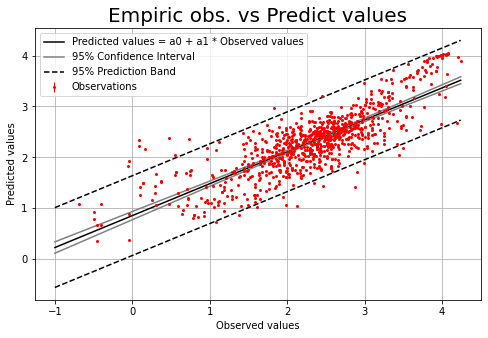

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.261, median - 0.263, CI - [0.237-0.284]

SHAP-values for: DBH_cm: mean - 0.195, median - 0.193, CI - [0.167-0.218]

SHAP-values for: H_m: mean - 0.113, median - 0.115, CI - [0.097-0.128]

SHAP-values for: Origin_ID: mean - 0.028, median - 0.027, CI - [0.022-0.033]

SHAP-values for: Species_ID: mean - 0.225, median - 0.226, CI - [0.211-0.239]



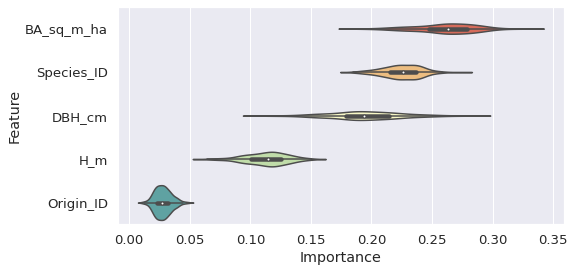

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'Species_ID', 'DBH_cm', 'H_m', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [29]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 113.435, median: 110.5,
 pred. interval (P(0.025)-P(0.975)): 36.975-194.025, 
 conf. interval (p-value=0.95): 67.821-164.82 
***
Aggregate bias statistic: 
 mean: -0.01, median: -0.008,
 pred. interval (P(0.025)-P(0.975)): -0.083-0.073, 
 conf. interval (p-value=0.95): -0.046-0.024 
***
Aggregate RMSE statistic: 
 mean: 0.503, median: 0.502, pred. interval (P(0.025)-P(0.975)): 0.422-0.605, 
 conf. interval (p-value=0.95): 0.459-0.542 
***
Aggregate MSE statistic: 
 mean: 0.255, median: 0.252, pred. interval (P(0.025)-P(0.975)): 0.178-0.366, 
 conf. interval (p-value=0.95): 0.211-0.294 
***
Aggregate R^2 statistic: 
 mean: 0.626, median: 0.624, pred. interval (P(0.025)-P(0.975)): 0.507-0.72, 
 conf. interval (p-value=0.95): 0.578-0.673 
***
Aggregate bias(%) statistic: 
 mean: -0.392, median: -0.008, pred. interval (P(0.025)-P(0.975)): -3.509-3.218, 
 conf. interval (p-value=0.95): -1.917-1.051 
***
Aggregate RMSE(%) statistic: 


# ***Creating final XGBoost model using all obs. for its training***

In [30]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [31]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [32]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.78979
[1]	validation_0-rmse:1.60673
[2]	validation_0-rmse:1.44763
[3]	validation_0-rmse:1.31275
[4]	validation_0-rmse:1.18941
[5]	validation_0-rmse:1.08477
[6]	validation_0-rmse:0.99157
[7]	validation_0-rmse:0.91190
[8]	validation_0-rmse:0.84496
[9]	validation_0-rmse:0.78804
[10]	validation_0-rmse:0.74184
[11]	validation_0-rmse:0.70123
[12]	validation_0-rmse:0.66461
[13]	validation_0-rmse:0.63342


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.60735
[15]	validation_0-rmse:0.58783
[16]	validation_0-rmse:0.57140
[17]	validation_0-rmse:0.55635
[18]	validation_0-rmse:0.54401
[19]	validation_0-rmse:0.53220
[20]	validation_0-rmse:0.52181
[21]	validation_0-rmse:0.51484
[22]	validation_0-rmse:0.50798
[23]	validation_0-rmse:0.50270
[24]	validation_0-rmse:0.49855
[25]	validation_0-rmse:0.49376
[26]	validation_0-rmse:0.48932
[27]	validation_0-rmse:0.48596
[28]	validation_0-rmse:0.47919
[29]	validation_0-rmse:0.47772
[30]	validation_0-rmse:0.47505
[31]	validation_0-rmse:0.47022
[32]	validation_0-rmse:0.46824
[33]	validation_0-rmse:0.46504
[34]	validation_0-rmse:0.46232
[35]	validation_0-rmse:0.45718
[36]	validation_0-rmse:0.45127
[37]	validation_0-rmse:0.44964
[38]	validation_0-rmse:0.44564
[39]	validation_0-rmse:0.44200
[40]	validation_0-rmse:0.44069
[41]	validation_0-rmse:0.43510
[42]	validation_0-rmse:0.43335
[43]	validation_0-rmse:0.43272
[44]	validation_0-rmse:0.43015
[45]	validation_0-rmse:0.42832
[46]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [33]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 195


In [34]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

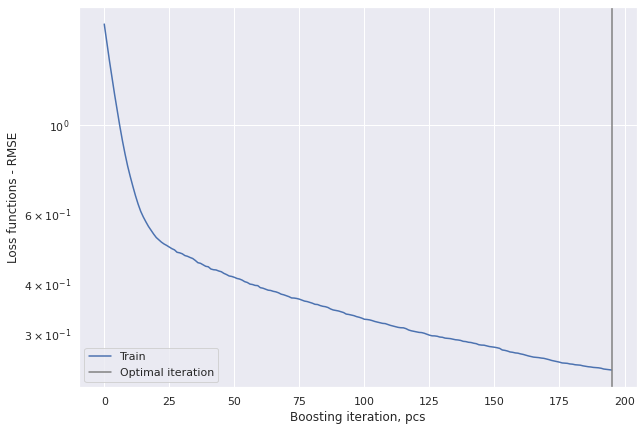

In [35]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [36]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.01
RMSE: 0.2
Relative RMSE(%):  10.476
MSE: 0.1
R square: 91.4%


In [37]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.920
Uncertainty
a0: 0.355+/-0.021
a1: 0.847+/-0.009


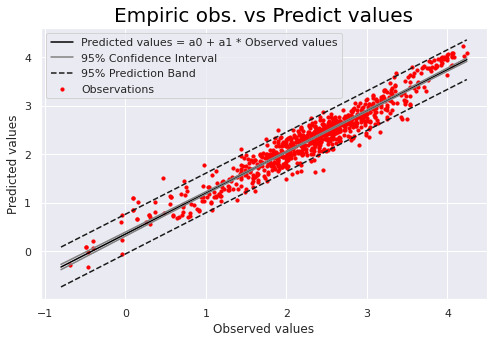

In [39]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-0.8, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

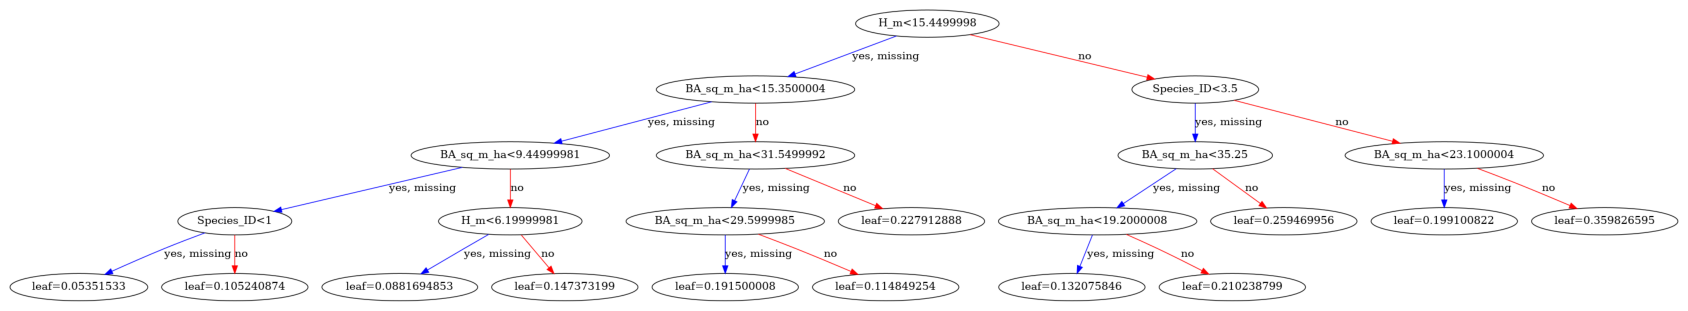

In [43]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 60]
plt.show()

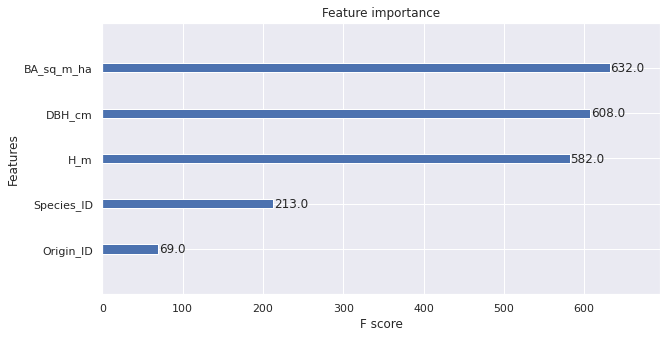

In [45]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

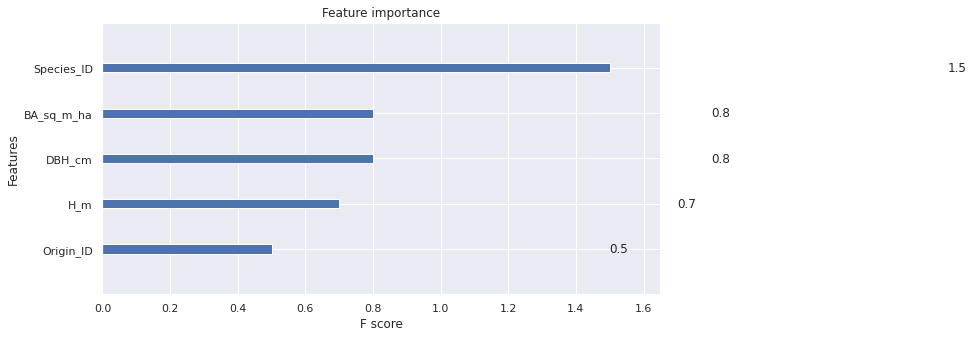

In [46]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

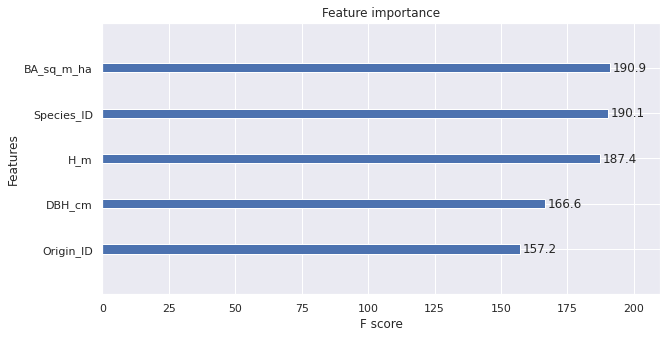

In [47]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [48]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


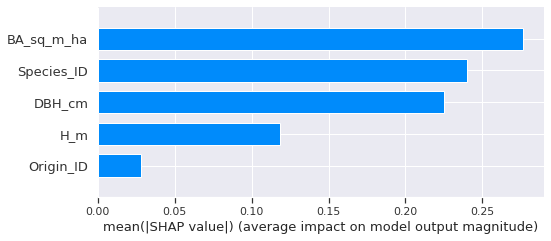

In [49]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

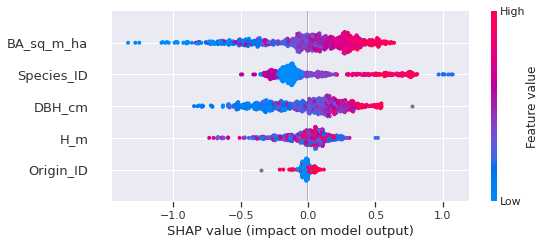

In [50]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

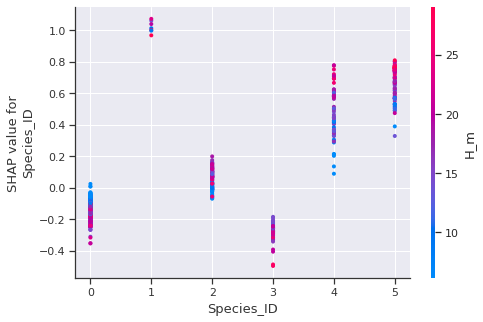

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


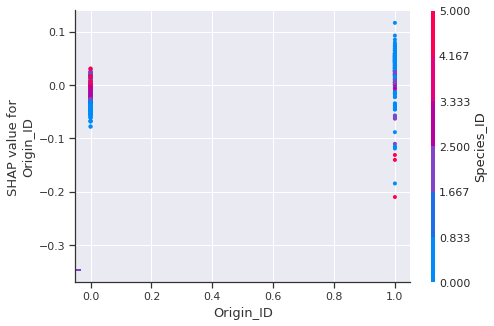

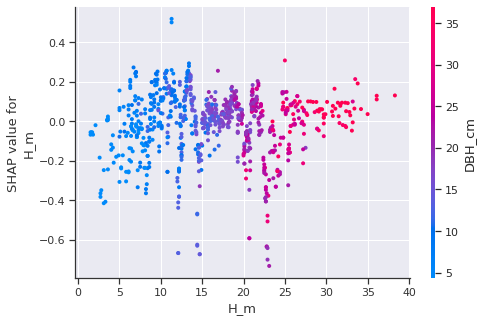

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


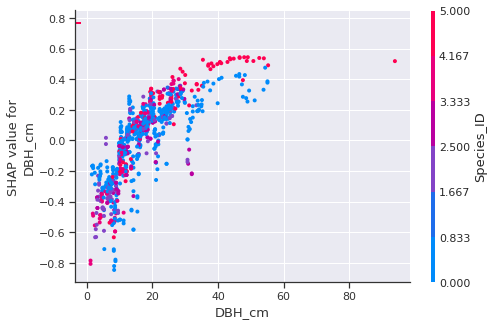

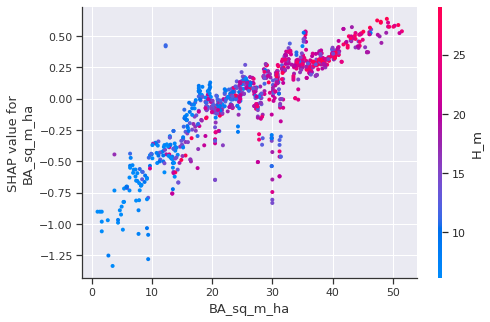

In [51]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [52]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/04_LN_M_branch_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/04_LN_M_branch_other_authors_XGB_model.txt")